In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [196]:
departements_list = [
    (1, 'Ain'), (2, 'Aisne'), (3, 'Allier'), (4, 'Alpes-de-Haute-Provence'),
    (5, 'Hautes-Alpes'), (6, 'Alpes-Maritimes'), (7, 'Ardeche'), (8, 'Ardennes'),
    (9, 'Ariege'), (10, 'Aube'), (11, 'Aude'), (12, 'Aveyron'),
    (13, 'Bouches-du-Rhone'), (14, 'Calvados'), (15, 'Cantal'), (16, 'Charente'),
    (17, 'Charente-Maritime'), (18, 'Cher'), (19, 'Correze'), (21, 'Cote-d-Or'),
    (22, 'Cotes-d-Armor'), (23, 'Creuse'), (24, 'Dordogne'), (25, 'Doubs'),
    (26, 'Drome'), (27, 'Eure'), (28, 'Eure-et-Loir'), (29, 'Finistere'),
    ('2A', 'Corse-du-Sud'), ('2B', 'Haute-Corse'), (30, 'Gard'), (31, 'Haute-Garonne'),
    (32, 'Gers'), (33, 'Gironde'), (34, 'Herault'), (35, 'Ille-et-Vilaine'),
    (36, 'Indre'), (37, 'Indre-et-Loire'), (38, 'Isere'), (39, 'Jura'),
    (40, 'Landes'), (41, 'Loir-et-Cher'), (42, 'Loire'), (43, 'Haute-Loire'),
    (44, 'Loire-Atlantique'), (45, 'Loiret'), (46, 'Lot'), (47, 'Lot-et-Garonne'),
    (48, 'Lozere'), (49, 'Maine-et-Loire'), (50, 'Manche'), (51, 'Marne'),
    (52, 'Haute-Marne'), (53, 'Mayenne'), (54, 'Meurthe-et-Moselle'), (55, 'Meuse'),
    (56, 'Morbihan'), (57, 'Moselle'), (58, 'Nievre'), (59, 'Nord'),
    (60, 'Oise'), (61, 'Orne'), (62, 'Pas-de-Calais'), (63, 'Puy-de-Dome'),
    (64, 'Pyrenees-Atlantiques'), (65, 'Hautes-Pyrenees'), (66, 'Pyrenees-Orientales'),
    (67, 'Bas-Rhin'), (68, 'Haut-Rhin'), (69, 'Rhone'), (70, 'Haute-Saone'),
    (71, 'Saone-et-Loire'), (72, 'Sarthe'), (73, 'Savoie'), (74, 'Haute-Savoie'),
    (75, 'Paris'), (76, 'Seine-Maritime'), (77, 'Seine-et-Marne'), (78, 'Yvelines'),
    (79, 'Deux-Sevres'), (80, 'Somme'), (81, 'Tarn'), (82, 'Tarn-et-Garonne'),
    (83, 'Var'), (84, 'Vaucluse'), (85, 'Vendee'), (86, 'Vienne'),
    (87, 'Haute-Vienne'), (88, 'Vosges'), (89, 'Yonne'), (90, 'Territoire de Belfort'),
    (91, 'Essonne'), (92, 'Hauts-de-Seine'), (93, 'Seine-Saint-Denis'), (94, 'Val-de-Marne'),
    (95, 'Val-d-Oise'), (971, 'Guadeloupe'), (972, 'Martinique'), (973, 'Guyane'),
    (974, 'La Reunion'), (976, 'Mayotte')
]

# Laurent steack

int2str = {code: name.lower().replace("'", "-") for code, name in departements_list}
int2strMaj = {code: name for code, name in departements_list}
int2name = {code: f"departement-{str(code).zfill(2)}-{name.lower().replace(' ', '-')}" for code, name in departements_list}

str2int = {name.lower().replace("'", "-"): code for code, name in departements_list}
str2intMaj = {name: code for code, name in departements_list}
str2name = {name: f"departement-{str(code).zfill(2)}-{name.lower().replace(' ', '-')}" for code, name in departements_list}

name2str = {f"departement-{str(code).zfill(2)}-{name.lower().replace(' ', '-')}": name for code, name in departements_list}
name2int = {f"departement-{str(code).zfill(2)}-{name.lower().replace(' ', '-')}": code for code, name in departements_list}
name2strlow = {f"departement-{str(code).zfill(2)}-{name.lower().replace(' ', '-')}": name.lower() for code, name in departements_list}
name2intstr = {
    f"departement-{str(code).zfill(2)}-{name.lower().replace(' ', '-')}": (f'0{code}' if code not in ['2A', '2B'] and int(code) < 10 else str(code))
    for code, name in departements_list
}

In [197]:
MLFLOW = False

In [198]:
import pandas as pd
from pathlib import Path

def load_all_metrics_files(path):
    """
    Parcourt tous les sous-dossiers de `path`, charge les fichiers `df_metrics.csv`,
    et les combine en un seul DataFrame global.

    Parameters:
    - path (Path): Le chemin du dossier racine à parcourir.

    Returns:
    - pd.DataFrame: Le DataFrame global combinant tous les fichiers `df_metrics.csv`.
    """
    path = Path(path)
    all_metrics = []  # Liste pour stocker tous les DataFrames

    # Parcourir tous les sous-dossiers et rechercher les fichiers df_metrics.csv
    for file in path.rglob('df_metrics*.csv'):
        try:
            # Charger le fichier CSV dans un DataFrame
            df = pd.read_csv(file)

            # Ajouter une colonne pour identifier la source du fichier
            df['source'] = str(file.parent)  # Ajouter le chemin du dossier parent

            # Ajouter le DataFrame à la liste
            all_metrics.append(df) 
        except Exception as e:
            print(f"Erreur lors du chargement de {file}: {e}")

    # Combiner tous les DataFrames en un seul DataFrame global
    if all_metrics:
        df_global = pd.concat(all_metrics, ignore_index=True)
    else:
        df_global = pd.DataFrame()  # Si aucun fichier trouvé, retourne un DataFrame vide

    return df_global

def load_all_metrics_files_dataset(base_path, datasets, experiments):
    """
    Charge plusieurs datasets pour une expérience donnée.
    
    :param base_path: Chemin de base vers les fichiers de métriques.
    :param datasets: Liste des datasets à charger.
    :param experiment: Nom de l'expérience à charger.
    :return: DataFrame concaténé de toutes les données.
    """
    all_dfs = []
    for i, dataset in enumerate(datasets):
        for expe in experiments: 
            path = Path(base_path) / dataset / 'firepoint' / '2x2' / 'test' / expe
            df = load_all_metrics_files(path)  # Assurez-vous que cette fonction est définie ailleurs
            df['Dataset'] = dataset  # Ajouter une colonne pour identifier le dataset
            df['exp'] = expe  # Ajouter une colonne pour identifier le dataset
            all_dfs.append(df)
    
    return pd.concat(all_dfs, ignore_index=True)

if not MLFLOW:
    # Utilisation de la fonction
    path = Path('../GNN/bdiff_small/firepoint/2x2/test/occurence_bdiff_small')
    df = load_all_metrics_files_dataset(Path('../GNN/'), ['bdiff_small'], ['occurence_exp2'])

/tmp/ipykernel_78907/601263766.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Dataset'] = dataset  # Ajouter une colonne pour identifier le dataset
/tmp/ipykernel_78907/601263766.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['exp'] = expe  # Ajouter une colonne pour identifier le dataset


In [199]:
df.Run.sort_values()

22    all_catboost_search_full_one_nbsinister-kmeans...
10    all_catboost_search_full_one_nbsinister-kmeans...
2     all_catboost_search_one_nbsinister-kmeans-5-Cl...
35    all_catboost_search_one_nbsinister-kmeans-5-Cl...
44    all_catboost_search_one_nbsinister-kmeans-5-Cl...
21    all_catboost_search_smote_one_nbsinister-kmean...
9     all_catboost_search_smote_one_nbsinister-kmean...
24    all_xgboost_search_full_one_nbsinister-kmeans-...
12    all_xgboost_search_full_one_nbsinister-kmeans-...
1     all_xgboost_search_one_nbsinister-kmeans-5-Cla...
34    all_xgboost_search_one_nbsinister-kmeans-5-Cla...
43    all_xgboost_search_one_nbsinister-kmeans-5-Cla...
0     all_xgboost_search_one_nbsinister-kmeans-5-Cla...
33    all_xgboost_search_one_nbsinister-kmeans-5-Cla...
42    all_xgboost_search_one_nbsinister-kmeans-5-Cla...
23    all_xgboost_search_smote_one_nbsinister-kmeans...
11    all_xgboost_search_smote_one_nbsinister-kmeans...
26    departement-13-bouches-du-rhone_catboost_s

In [200]:
df.to_csv('try.csv')

In [201]:
if MLFLOW:
    metric = 'bad_prediction_modified_nbsinister_max_1'
    df = pd.read_csv(f'{metric}.csv')

    metric = 'wildfire_over_predicted_modified_nbsinister_max_1'
    df1 = pd.read_csv(f'{metric}.csv')

    metric = 'iou_modified_nbsinister_max_1'
    df2 = pd.read_csv(f'{metric}.csv')

    metric = 'apr_nbsinister_max_1'
    df3 = pd.read_csv(f'{metric}.csv')

    metric = 'r2_nbsninster_max_1'
    df4 = pd.read_csv(f'{metric}.csv')

    df = df.set_index('Run').join(df1.set_index('Run')['wildfire_over_predicted_modified_nbsinister_max_1']).reset_index()
    df = df.set_index('Run').join(df2.set_index('Run')['iou_modified_nbsinister_max_1']).reset_index()
    df = df3.set_index('Run').join(df2.set_index('Run')['apr_nbsinister_max_1']).reset_index()
    df = df4.set_index('Run').join(df2.set_index('Run')['r2_nbsninster_max_1']).reset_index()

    #df.dropna(subset=['temporal_spearman', 'temporal_mae', 'temporal_binary_f1', 'temporal_kendall'], inplace=True)
    df.drop_duplicates(inplace=True, keep='first')
    df.reset_index(drop=True, inplace=True)

In [202]:
df.Run[0]

'all_xgboost_search_one_nbsinister-kmeans-5-Class-Dept-cubic-5_classification_softmax_full_0_all_6_0_risk-size-watershed_node'

In [203]:
df.loc[0, 'Run']

'all_xgboost_search_one_nbsinister-kmeans-5-Class-Dept-cubic-5_classification_softmax_full_0_all_6_0_risk-size-watershed_node'

In [204]:
def parse_run_name(x):
    dico = {}
    vec = x.split('_')
    dico['Department'] = vec[0]
    dico['Model'] = vec[1]
    i = 2
    if dico['Model'] == 'fwi':
        i += 1
        dico['Target'] = 'indice'
    else:
        dico['under_sampling'] = vec[i]
        i += 1
        dico['over_sampling'] = vec[i]
        i += 1
        dico['weight'] = vec[i]
        i += 1
        dico['Target'] = vec[i]
        i += 1

    if dico['Model'] != 'fwi':
        dico['Task_type'] = vec[i]
        i += 1
        dico['loss'] = vec[i]
        i += 1
    else:
        dico['loss'] = None
        dico['Task_type'] = 'Indice'

    i += 1
    dico['kdays'] = vec[i]
    i += 1
    dico['Number_of_features'] = vec[i]
    i += 1
    dico['Scale'] = vec[i]
    i += 1
    dico['Days_in_futur'] = vec[i]
    i += 1
    dico['Base'] = vec[i]
    i += 1
    dico['Method'] = vec[i]
    i += 1
    if i == len(vec):
        return dico
    if vec[i] == 'kmeans':
        i += 1
        dico['kmeans_shift'] = vec[i]
        i += 1
        dico['kmeans_thresh'] = vec[i]
        i += 1
    return dico

# Initialisation des colonnes avec des valeurs None
df['Department'] = None
df['Model'] = None
df['Target'] = None
df['Task_type'] = None
df['Drop'] = None
df['Loss_function'] = None
df['under_sampling'] = None
df['over_sampling'] = None
df['kdays'] = None
df['Number_of_features'] = None
df['Scale'] = None
df['Base'] = None
df['Method'] = None
df['Days_in_futur'] = None
df['weight'] = None
df['kmeans_thresh'] = None
df['kmeans_shift'] = None

# Boucle pour remplir les colonnes avec les valeurs de dico_parse
for index, row in df.iterrows():
    dico_parse = parse_run_name(row['Run'])
    # Mise à jour de chaque colonne avec les valeurs du dictionnaire dico_parse
    df.loc[index, 'Department'] = dico_parse.get('Department')
    df.loc[index, 'Drop'] = dico_parse.get('Drop')
    df.loc[index, 'Model'] = dico_parse.get('Model')
    df.loc[index, 'Target'] = dico_parse.get('Target')
    df.loc[index, 'Task_type'] = dico_parse.get('Task_type')
    df.loc[index, 'Loss_function'] = dico_parse.get('loss')
    df.loc[index, 'under_sampling'] = dico_parse.get('under_sampling')
    df.loc[index, 'over_sampling'] = dico_parse.get('over_sampling')
    df.loc[index, 'kdays'] = dico_parse.get('kdays')
    df.loc[index, 'Number_of_features'] = dico_parse.get('Number_of_features')
    df.loc[index, 'Scale'] = dico_parse.get('Scale')
    df.loc[index, 'Base'] = dico_parse.get('Base')
    df.loc[index, 'Method'] = dico_parse.get('Method')
    df.loc[index, 'Days_in_futur'] = dico_parse.get('Days_in_futur')

    df.loc[index, 'weight'] = dico_parse.get('weight')
    df.loc[index, 'kmeans_thresh'] = dico_parse.get('kmeans_thresh', 0)
    df.loc[index, 'kmeans_shift'] = dico_parse.get('kmeans_shift', 0)

/tmp/ipykernel_78907/1885793084.py:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Department'] = None
/tmp/ipykernel_78907/1885793084.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Model'] = None
/tmp/ipykernel_78907/1885793084.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[

IndexError: list index out of range

In [159]:
dico_parse

{'Department': 'departement-78-yvelines',
 'Model': 'xgboost',
 'under_sampling': 'search',
 'over_sampling': 'full',
 'weight': 'one',
 'Target': 'nbsinister-kmeans-5-Class-Dept',
 'Task_type': 'classification',
 'loss': 'softmax',
 'kdays': '0',
 'Number_of_features': 'all',
 'Scale': 'departement',
 'Days_in_futur': '0',
 'Base': 'None',
 'Method': 'node'}

In [160]:
titles = {'departement-01-ain': 'Ain',
          'departement-25-doubs': 'Doubs',
           'departement-78-yvelines': 'Yvelines'}

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

def compare_models2(dff, depts, dept_markers, metrics, col_to_analyse, scale_col, dir_output, suffix):
    """
    Compare models using metrics for multiple departments and scales.

    Parameters:
    - dff: DataFrame containing the data.
    - depts: List of departments to analyze.
    - dept_markers: Dictionary of markers associated with each department.
    - metrics: List of metrics to analyze.
    - col_to_analyse: Column used to group and analyze the data (e.g., model names).
    - scale_col: Column specifying the scale (e.g., granularity).
    - dir_output: Directory to save the output plots.
    - suffix: Suffix for the output plot filename.
    """
    df = dff.copy(deep=True)
    task_types = df[col_to_analyse].unique()
    scales = sorted(df[scale_col].unique())  # Ensure consistent order of scales

    # Set a consistent color palette
    np.random.seed(42)
    colors = sns.color_palette("husl", len(task_types))
    task_colors = dict(zip(task_types, colors))  # Map task types to colors

    # Create a new figure for all departments
    fig, axs = plt.subplots(len(depts), len(metrics), figsize=(20, 4 * len(depts)), sharey='row')

    # Loop through each department
    for dept_index, dept in enumerate(depts):
        # Filtering the DataFrame for a specific department
        df_filtered = df[df['Department'] == dept].reset_index()

        # Loop through each metric to create a subplot for each metric
        for metric_index, metric in enumerate(metrics):
            ax = axs[dept_index, metric_index] if len(depts) > 1 else axs[metric_index]

            for scale in scales:
                scale_subset = df_filtered[df_filtered[scale_col] == scale]

                for method in task_types:
                    subset = scale_subset[scale_subset[col_to_analyse] == method]

                    if len(subset) == 0:
                        continue

                    # Add label only for the first occurrence of each method
                    label = f"{method} (Scale {scale})" if dept_index == 0 else None

                    ax.plot(
                        subset[col_to_analyse].values,
                        subset[metric].values,
                        marker=dept_markers[scale],  # Marker based on department
                        linestyle='-',  # Use solid lines for scales
                        color=task_colors[method]
                    )  # Use task type color

            # Configuration for each subplot
            ax.set_ylim(0, 1)
            ax.set_xlabel(col_to_analyse)
            if dept_index == 0:  # Only set the title for the first row
                ax.set_title(f'{metric}', fontsize=12)
            ax.grid(True)

        axs[dept_index, 0].set_ylabel('Metric Value')

    # Create a custom legend for task types and departments
    task_handles = [plt.Line2D([0], [0], color=task_colors[method], label=method) for method in task_types]
    scale_handles = [plt.Line2D([0], [0], marker=marker, linestyle='None', color='black', label=f'Scale {dept}') for dept, marker in dept_markers.items()]
    #scale_handles = [plt.Line2D([0], [0], linestyle='-', color='gray', label=f'Scale {scale}') for scale in scales]

    # Combine both legends
    fig.legend(
        handles=task_handles + scale_handles,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.05),
        ncol=len(scales),
        title="Scales"
    )

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
    #plt.savefig(dir_output / f'{col_to_analyse}_{scale_col}_{suffix}.png')
    #plt.show()

In [162]:
def compare_models3(dff, depts, dept_markers, metrics, col_to_analyse, scale_col, dir_output, suffix):
    """
    Compare models using metrics for multiple scales and departments, and connect points by scale.

    Parameters:
    - dff: DataFrame containing the data.
    - depts: List of departments to analyze.
    - dept_markers: Dictionary of markers associated with each scale.
    - metrics: List of metrics to analyze.
    - col_to_analyse: Column used for the X-axis (e.g., 'graph').
    - scale_col: Column specifying the scale (e.g., 'Scale').
    - dir_output: Directory to save the output plots.
    - suffix: Suffix for the output plot filename.
    """
    df = dff.copy(deep=True)
    scales = sorted(df[scale_col].unique())  # Ensure consistent order of scales

    # Set a consistent color palette
    np.random.seed(42)
    colors = sns.color_palette("husl", len(scales))
    scale_colors = dict(zip(scales, colors))  # Map scales to colors

    # Define figure and subplots
    fig, axs = plt.subplots(len(depts), len(metrics), figsize=(20, 4 * len(depts)), sharey='row')

    # Loop through each department to create a plot for each department
    for dept_index, dept in enumerate(depts):
        df_filtered = df[df['Department'] == dept]

        # Ensure axs is always iterable
        if len(metrics) == 1:
            axs = [axs]

        # Loop through each metric to create a subplot
        for metric_index, metric in enumerate(metrics):
            ax = axs[dept_index, metric_index] if len(depts) > 1 else axs[metric_index]

            # Loop through each scale to plot data for the current department
            for scale in scales:
                scale_subset = df_filtered[df_filtered[scale_col] == scale]

                if scale_subset.empty:
                    continue

                # Sort the data by the graph value to ensure the points are connected in the correct order
                scale_subset = scale_subset.sort_values(by=col_to_analyse).reset_index(drop=True)

                # Plot data points and connect them with a line
                ax.plot(
                    scale_subset[col_to_analyse].values,  # X-axis (e.g., 'graph')
                    scale_subset[metric].values,          # Y-axis (metric value)
                    marker=dept_markers.get(scale, 'o'),  # Marker style
                    linestyle='-',                        # Connect points with a line
                    label=f"Scale {scale}",               # Legend label
                    color=scale_colors[scale]             # Color based on scale
                )

            if dept_index == 0:
                ax.set_title(f'{metric}', fontsize=12)
            if dept_index == len(depts) - 1:
                ax.set_xlabel(col_to_analyse)
            ax.grid(True)
        
        axs[dept_index, 0].set_ylabel('Metric Value')

    # Create a custom legend for scales
    scale_handles = [plt.Line2D([0], [0], marker=dept_markers.get(scale, 'o'),
                                    linestyle='-', color=scale_colors[scale],
                                    label=f'Scale {scale}') for scale in scales]

    fig.legend(
        handles=scale_handles,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.05),
        ncol=len(scales),
        title="Scales"
    )

    # Adjust layout to make room for titles and legend
    plt.tight_layout(rect=[0, 0.0, 1, 0.90])  # Adjust layout to include more space for department titles
    
    for dept_index, dept in enumerate(depts):
        # Dynamically calculate the title position based on subplot positions
        if len(metrics) > 1:
            title_x = 0
        else:
            title_x = (axs[dept_index].get_position().x0 + axs[dept_index].get_position().x1) / 2

        # Increase the padding to avoid overlapping titles
        #padding = 0.07 + (len(depts))  # Dynamically adjust padding based on number of rows
        title_y = axs[dept_index, dept_index].get_position().y1 + 0.01

        # Add a title for the group of plots corresponding to the department
        fig.text(title_x, title_y, f'{titles[dept]}', ha='center', va='bottom', fontsize=16)


In [163]:
df.Model.unique()

array(['catboost', 'xgboost'], dtype=object)

In [164]:
df.Model.unique()

array(['catboost', 'xgboost'], dtype=object)

In [165]:
df.replace('departement', '10', inplace=True)

In [166]:
df['Scale'] = df['Scale'].astype(int)

In [167]:
df.Scale.unique()

array([ 7, 10])

In [168]:
departement_list = ['departement-01-ain', 'departement-25-doubs', 'departement-78-yvelines']

### DICO

In [169]:
#df_1 = df[(df['Model'] == 'xgboost') & (df['weight'] == 'one')].reset_index(drop=True)
#df_1 = df_1[df_1['Target'].isin(['nbsinister-kmeans-5-Class-Dept', 'nbsinister-kmeans-5-Class-Dept-laplace+mean-Specialized'])]

In [170]:
df.Dataset.unique()

array(['firemen'], dtype=object)

In [171]:
df['Model'] = df['Model'] + ' ' + df['Target'] + ' ' + df['exp'] +  ' ' + df['Loss_function']

In [172]:
import pandas as pd
import xgboost

def compute_metrics(df, filters, metrics, group_by_cols):
    """
    Compute the mean of specified metrics after applying filters on the DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        filters (dict): A dictionary where keys are column names and values are the corresponding filter values.
                        Example: {'Loss_function': 'softmax', 'Base': 'risk-size-watershed'}
        metrics (list): A list of metric column names to compute the mean for.
        group_by_cols (list): List of columns to group results by (e.g., ['Scale', 'Target']).

    Returns:
        dict: A nested dictionary with group_by_cols as keys and mean metrics as values.
    """
    # Define exclusions based on metrics
    exclusions = {
        'iou_1_class_hard': [('departement-78-yvelines', [6, 7]), ('departement-13-bouches-du-rhone', [7])],
        'bad_prediction_local_1_class_hard': [('departement-78-yvelines', [6, 7]), ('departement-13-bouches-du-rhone', [7])],
        'iou_wildfire_detected_1_class_hard': [('departement-78-yvelines', [6, 7]), ('departement-13-bouches-du-rhone', [7])],
        'iou_2_class_hard': [('departement-78-yvelines', [4, 5, 6, 7]), ('departement-01-ain', [7]), ('departement-25-doubs', [7]), ('departement-13-bouches-du-rhone', [5, 6, 7]), ('departement-34-herault', [7])],
        'bad_prediction_local_2_class_hard': [('departement-78-yvelines', [4, 5, 6, 7]), ('departement-01-ain', [7]), ('departement-25-doubs', [7]), ('departement-13-bouches-du-rhone', [5, 6, 7]), ('departement-34-herault', [7])],
        'iou_wildfire_detected_2_class_hard': [('departement-78-yvelines', [4, 5, 6, 7]), ('departement-01-ain', [7]), ('departement-25-doubs', [7]),  ('departement-13-bouches-du-rhone', [5, 6, 7]), ('departement-34-herault', [7])]
    }

    # Apply filters to the DataFrame
    filtered_df = df.copy()
    for col, value in filters.items():
        if isinstance(value, list):
            filtered_df = filtered_df[filtered_df[col].isin(value)]
        else:
            filtered_df = filtered_df[filtered_df[col] == value]

    # Initialize results dictionary
    results = {}

    # Group by specified columns and calculate metrics
    grouped = filtered_df.groupby(group_by_cols)
    for group_keys, group_data in grouped:
        # Create a nested dictionary structure for the results
        current_level = results
        if not isinstance(group_keys, tuple):
            group_keys = (group_keys,)
        for key in group_keys:
            if key not in current_level:
                current_level[key] = {}
            current_level = current_level[key]

        # Calculate mean for each metric
        for metric in metrics:
            # Without exclusions
            mean_without_filter = round(group_data[metric].mean(), 2) if not group_data[metric].empty else None

            # Apply exclusions if the metric is in the exclusions dictionary and Base = 'risk-size-watershed'
            if metric in exclusions and 'Base' in filters:
                excluded_group = group_data.copy()
                for dept, scales in exclusions[metric]:
                    excluded_group = excluded_group[~((excluded_group['Department'] == dept) & (excluded_group['Scale'].isin(scales)) & (excluded_group['Base'] == 'risk-size-watershed'))]
                mean_with_filter = round(excluded_group[metric].mean(), 2) if not excluded_group[metric].empty else None
                current_level[metric] = (mean_without_filter, mean_with_filter)
            else:
               current_level[metric] =  mean_with_filter = mean_without_filter

            # Store results as a tuple (without_filter, with_filter)

    return results

# Exemple d'appel
metrics = [
    'iou_class_hard',
    'bad_prediction_class_hard',
    'iou_wildfire_detected_class_hard',
    'f1',
    'accuracy'
]

filters = {
    #'Loss_function' : 'softmax',
    'Base': ['None'],
    'Target': ['nbsinister-kmeans-5-Class-Dept'],
    'Scale' : [10],
    'Model': ['xgboost', 'catboost', 'graphCast', 'LSTM', 'NetMLP', 'NetGCN', 'DSTGCN'],
    'Dataset' : ['firemen'],
    #'Department' : ['all']
        #'nbsinister-kmeans-5-Class-Dept-laplace+mean-Specialized-Past-shift-5']
}

group_by_cols = ['Department', 'Model', 'kdays']
# Appeler la fonction avec les paramètres
results = compute_metrics(df, filters, metrics, group_by_cols)
results

{}

In [173]:
df.Model.unique()

array(['catboost nbsinister-kmeans-5-Class-Dept occurence_exp2 softmax',
       'xgboost nbsinister-kmeans-5-Class-Dept occurence_exp2 softmax'],
      dtype=object)

In [174]:
df.Department.unique()

array(['all', 'departement-01-ain', 'departement-25-doubs',
       'departement-78-yvelines'], dtype=object)

In [175]:
df['nbsinister'].unique()

array([653., 277., 176., 200.])

In [176]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

def plot_result(dff, metric, dataset, top='all'):
    """
    Affiche un graphique par Scale, avec les départements sur l'axe des X triés selon 'nbsinister'.
    Chaque courbe représente un modèle.

    :param dff: DataFrame contenant les colonnes ['Department', 'Scale', 'Model', 'nbsinister', metric]
    :param metric: Nom de la colonne contenant la métrique à afficher
    :param dataset: Nom du dataset à filtrer
    :param top: Nombre de départements à afficher (ou 'all' pour afficher tous les départements)
    """

    df = dff[dff['Department'] != 'all']
    df = df[df['Dataset'] == dataset].copy(deep=True)
    
    # Trier les départements par 'nbsinister' décroissant
    df_sorted = df.sort_values(by='nbsinister', ascending=False)
    df_sorted['Department'] = df_sorted['Department'].apply(lambda x: name2str[x])

    # Sélectionner les "top" départements si nécessaire
    if top != 'all':
        top = int(top)
        top_departments = df_sorted['Department'].unique()[:top]
        df_sorted = df_sorted[df_sorted['Department'].isin(top_departments)]

    #df_sorted['namex'] = df_sorted.apply(lambda x: f"{x['Department']}  {x['nbsinister']}", axis=1)

    # Assurer que tous les modèles ont les mêmes départements en X
    all_departments = df_sorted['Department'].unique()

    # Récupérer les échelles uniques
    scales = df_sorted['Scale'].unique()
    num_scales = len(scales)

    # Définir la disposition de la grille
    if num_scales > 3:
        cols = 3
        rows = math.ceil(num_scales / cols)
    else:
        cols = 1
        rows = num_scales

    fig, axes = plt.subplots(rows, cols, figsize=(25, 7 * rows), squeeze=False)
    axes = axes.flatten()

    for i, scale in enumerate(scales):
        ax = axes[i]
        df_scale = df_sorted[df_sorted['Scale'] == scale].copy()
        df_scale.drop_duplicates(subset=['Department', 'Model'], inplace=True)

        # Créer un pivot pour assurer l'alignement des départements sur X
        pivot_df = df_scale.pivot(index='Department', columns='Model', values=metric)
        pivot_df = pivot_df.reindex(all_departments)  # S'assurer que l'ordre des départements est respecté

        # Tracer les courbes par modèle
        sns.lineplot(
            data=pivot_df,
            markers=True,
            #palette='tab10',
            ax=ax
        )

        ax.set_xticks(range(len(all_departments)))
        ax.set_xticklabels(all_departments, rotation=90, ha='right')
        ax.set_title(f"Metric {metric} - Scale: {scale}")
        ax.set_xlabel("Department")
        ax.set_ylabel(metric)
        ax.legend(title="Model")
        ax.grid(True, linestyle='--', alpha=0.5)

    # Supprimer les axes inutilisés
    for i in range(num_scales, rows * cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()


def plot_column_comparison(df, metric, col):
    """
    Affiche un graphique par département, avec les datasets sur l'axe des X.
    Chaque courbe représente un modèle. Seuls les départements et scales communs sont affichés.
    
    :param df: DataFrame contenant les colonnes ['Department', 'Scale', 'Dataset', 'Model', metric]
    :param metric: Nom de la colonne contenant la métrique à afficher
    """
    # Trouver les départements communs à tous les datasets
    common_departments = df.groupby('Department')[col].nunique()
    common_departments = common_departments[common_departments == df[col].nunique()].index
    
    # Trouver les scales communes à tous les datasets
    common_scales = df.groupby('Scale')[col].nunique()
    common_scales = common_scales[common_scales == df[col].nunique()].index
    
    df_filtered = df[(df['Department'].isin(common_departments)) & (df['Scale'].isin(common_scales))]
    
    # Récupérer les départements uniques
    departments = sorted(common_departments)
    num_departments = len(departments)
    
    # Définir la disposition de la grille
    cols = 3 if num_departments > 3 else 1
    rows = math.ceil(num_departments / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(25, 7 * rows), squeeze=False)
    axes = axes.flatten()
    
    for i, department in enumerate(departments):
        ax = axes[i]
        df_department = df_filtered[df_filtered['Department'] == department]
        
        # Tracer les courbes par modèle
        sns.lineplot(
            data=df_department, 
            x=col, 
            y=metric, 
            hue='Model', 
            marker='o',
            palette='tab10',
            ax=ax
        )
        
        ax.set_title(f"Metric {metric} - Department: {department}")
        ax.set_xlabel("Dataset")
        ax.set_ylabel(metric)
        ax.legend(title="Model")
        ax.grid(True, linestyle='--', alpha=0.5)
    
    # Supprimer les axes inutilisés
    for i in range(num_departments, rows * cols):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

def plot_column_comparison_bar(df, metric, col):
    """
    Affiche un bar plot par département, avec les datasets sur l'axe des X.
    Chaque groupe de barres représente un modèle. Seuls les départements communs sont affichés.

    :param df: DataFrame contenant les colonnes ['Department', 'Scale', 'Dataset', 'Model', metric]
    :param metric: Nom de la colonne contenant la métrique à afficher
    :param col: Colonne à utiliser pour l'axe X (ex: 'Dataset')
    """
    # Trouver les départements communs à tous les datasets
    common_departments = df.groupby('Department')[col].nunique()
    common_departments = common_departments[common_departments == df[col].nunique()].index

    df_filtered = df[df['Department'].isin(common_departments)]

    # Récupérer les départements uniques
    departments = sorted(common_departments)
    num_departments = len(departments)

    # Définir la disposition de la grille
    cols = 3 if num_departments > 3 else 1
    rows = math.ceil(num_departments / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(25, 7 * rows), squeeze=False)
    axes = axes.flatten()

    # Initialisation des handles et labels pour la légende globale
    handles, labels = None, None  

    for i, department in enumerate(departments):
        ax = axes[i]
        df_department = df_filtered[df_filtered['Department'] == department]

        # Tracer le bar plot
        barplot = sns.barplot(
            data=df_department,
            x=col,
            y=metric,
            hue='Model',
            palette='tab20',
            ax=ax
        )

        ax.set_title(f"Metric {metric} - Department: {department}")
        ax.set_xlabel(col)
        ax.set_ylabel(metric)
        ax.grid(True, linestyle='--', alpha=0.5)

        # Récupérer la légende UNIQUEMENT lors du premier plot
        if handles is None or labels is None:
            handles, labels = ax.get_legend_handles_labels()

        # Supprimer la légende individuelle du subplot
        ax.get_legend().remove()

    # Supprimer les axes inutilisés
    for i in range(num_departments, rows * cols):
        fig.delaxes(axes[i])

    # Ajouter une légende globale
    if handles and labels:
        fig.legend(handles, labels, title="Model", loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=4)

    plt.tight_layout()
    plt.show()


In [177]:
df.Scale.unique()

array([ 7, 10])

In [190]:
df['sampling'] = df['under_sampling'] + ' ' + df['over_sampling']
df['Model'] +=  ' ' + df['sampling']

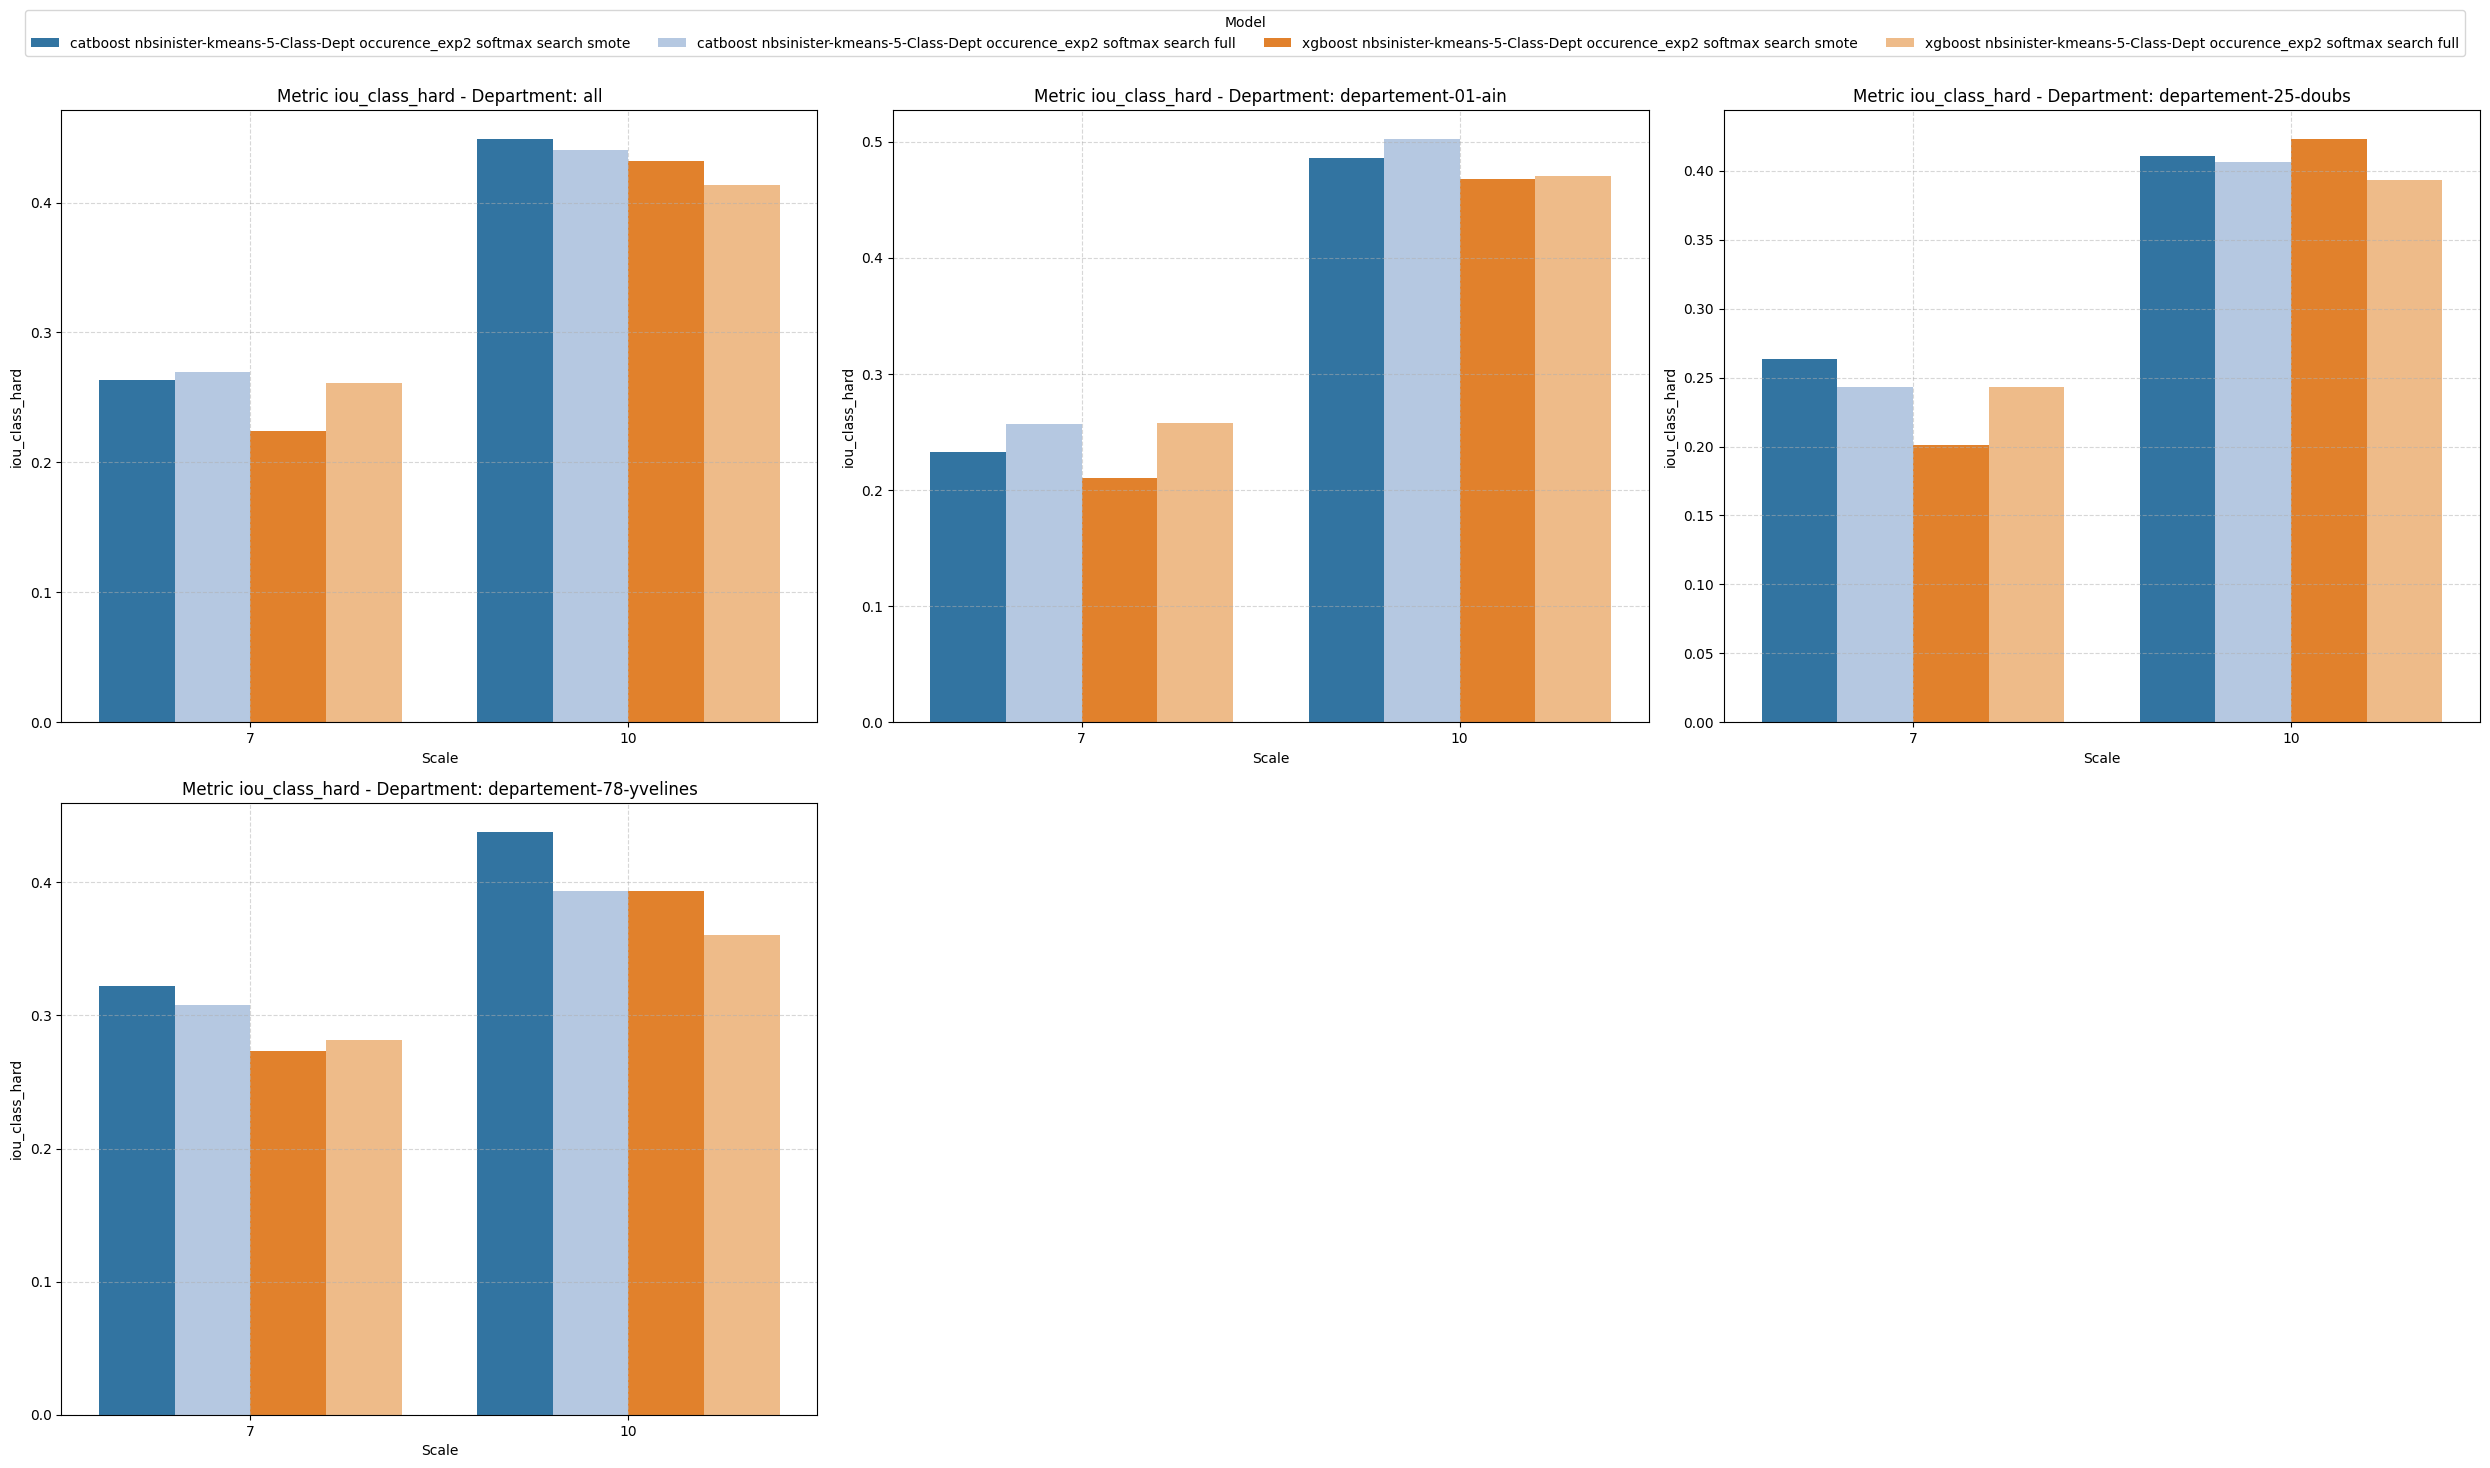

In [192]:
plot_column_comparison_bar(df, 'iou_class_hard', 'Scale')

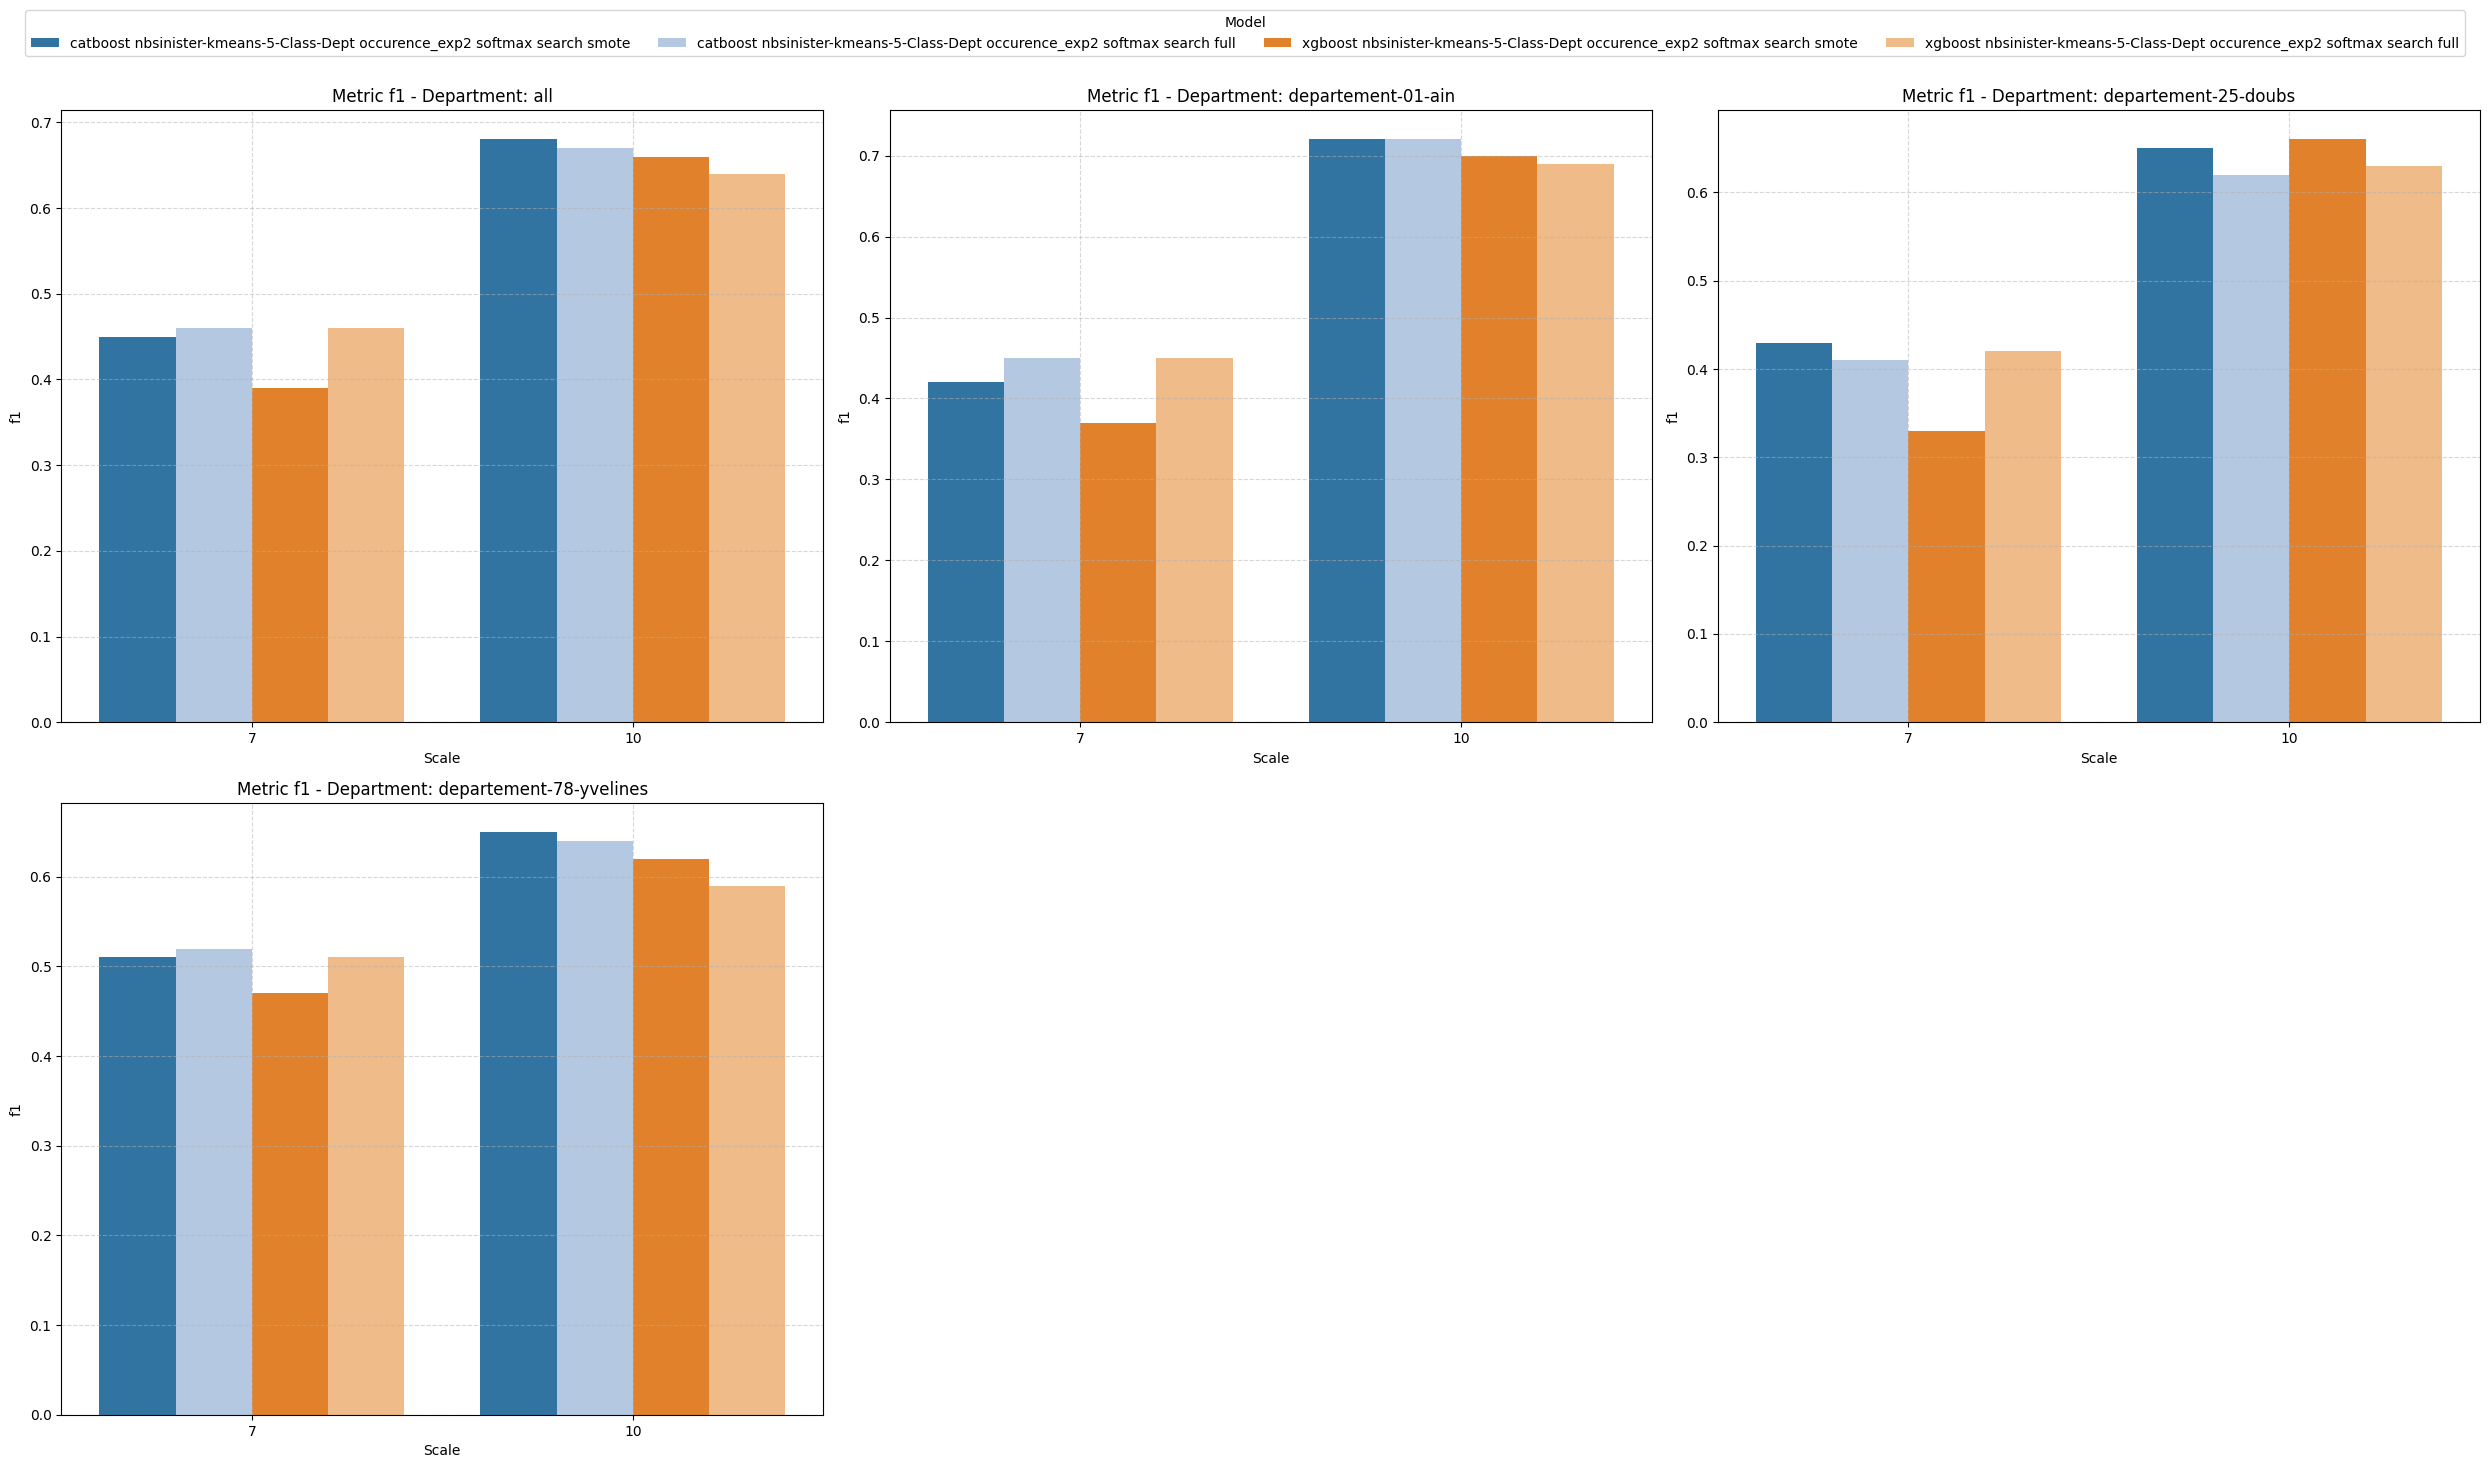

In [194]:
plot_column_comparison_bar(df, 'f1', 'Scale')

In [181]:
#df = df[df['Department'] == 'departement-13-bouches-du-rhone']

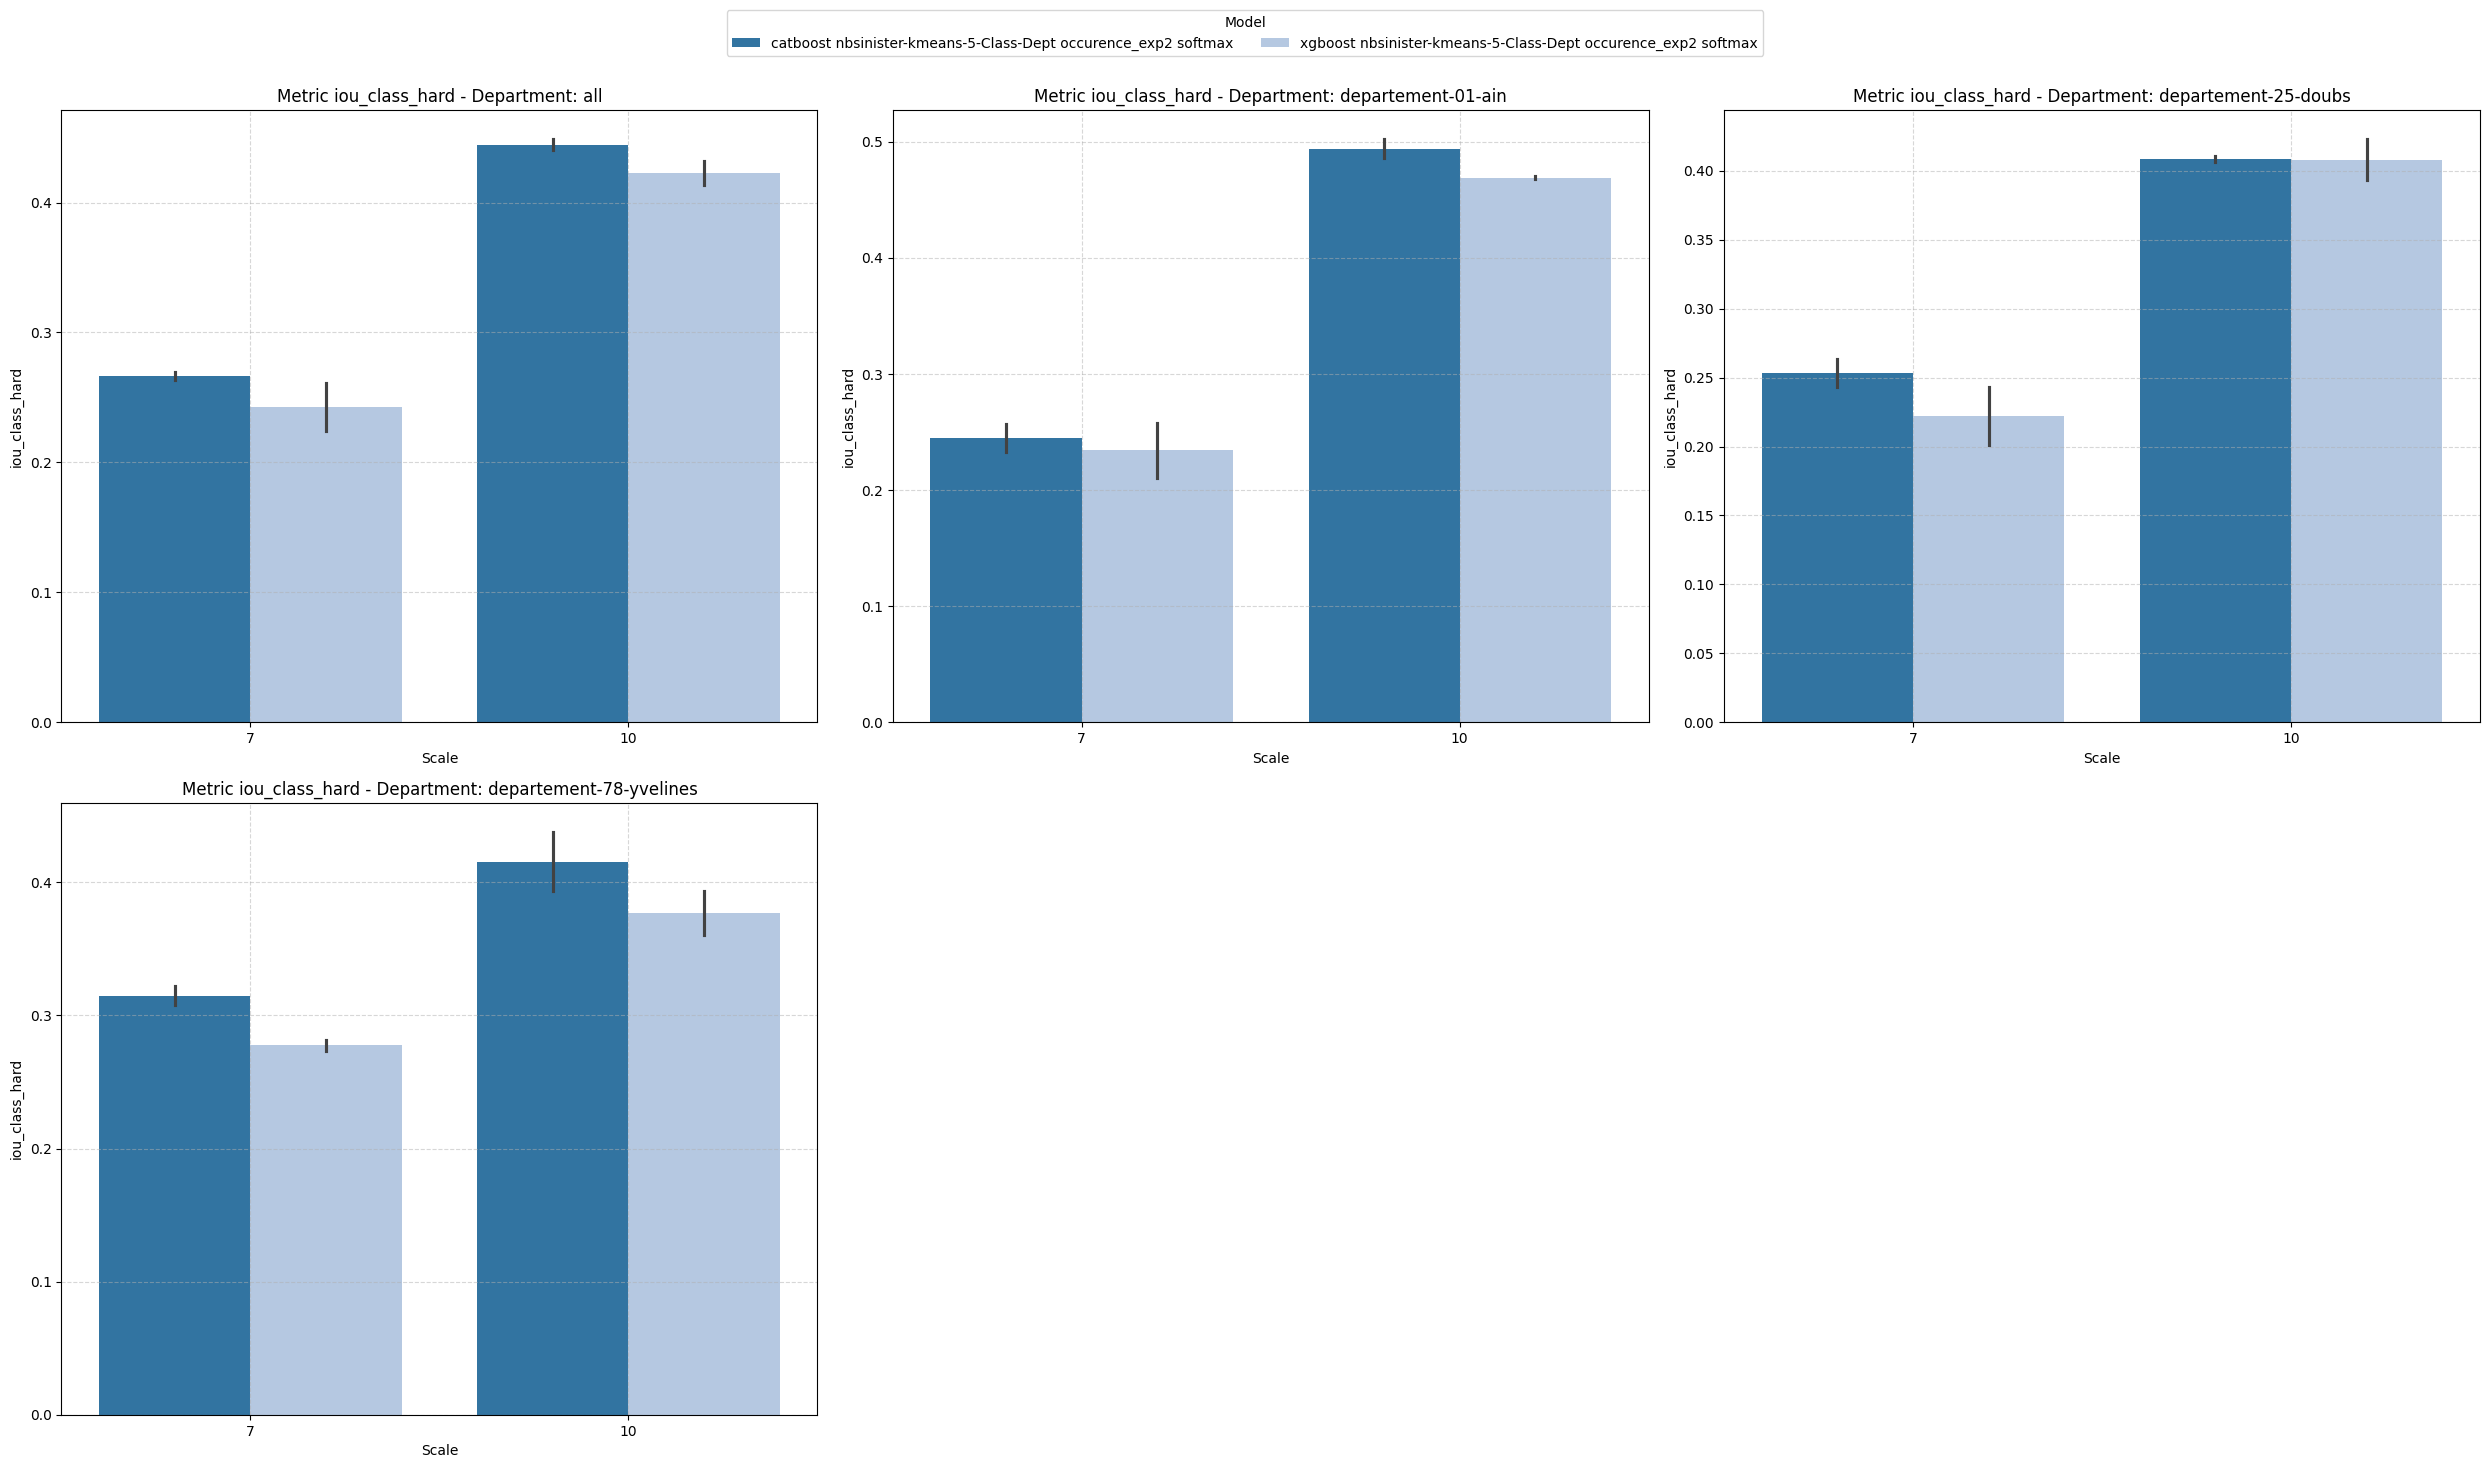

In [182]:
plot_column_comparison_bar(df[(df['Base'] == 'risk-size-watershed') | (df['Base'] == 'None')], 'iou_class_hard', 'Scale')

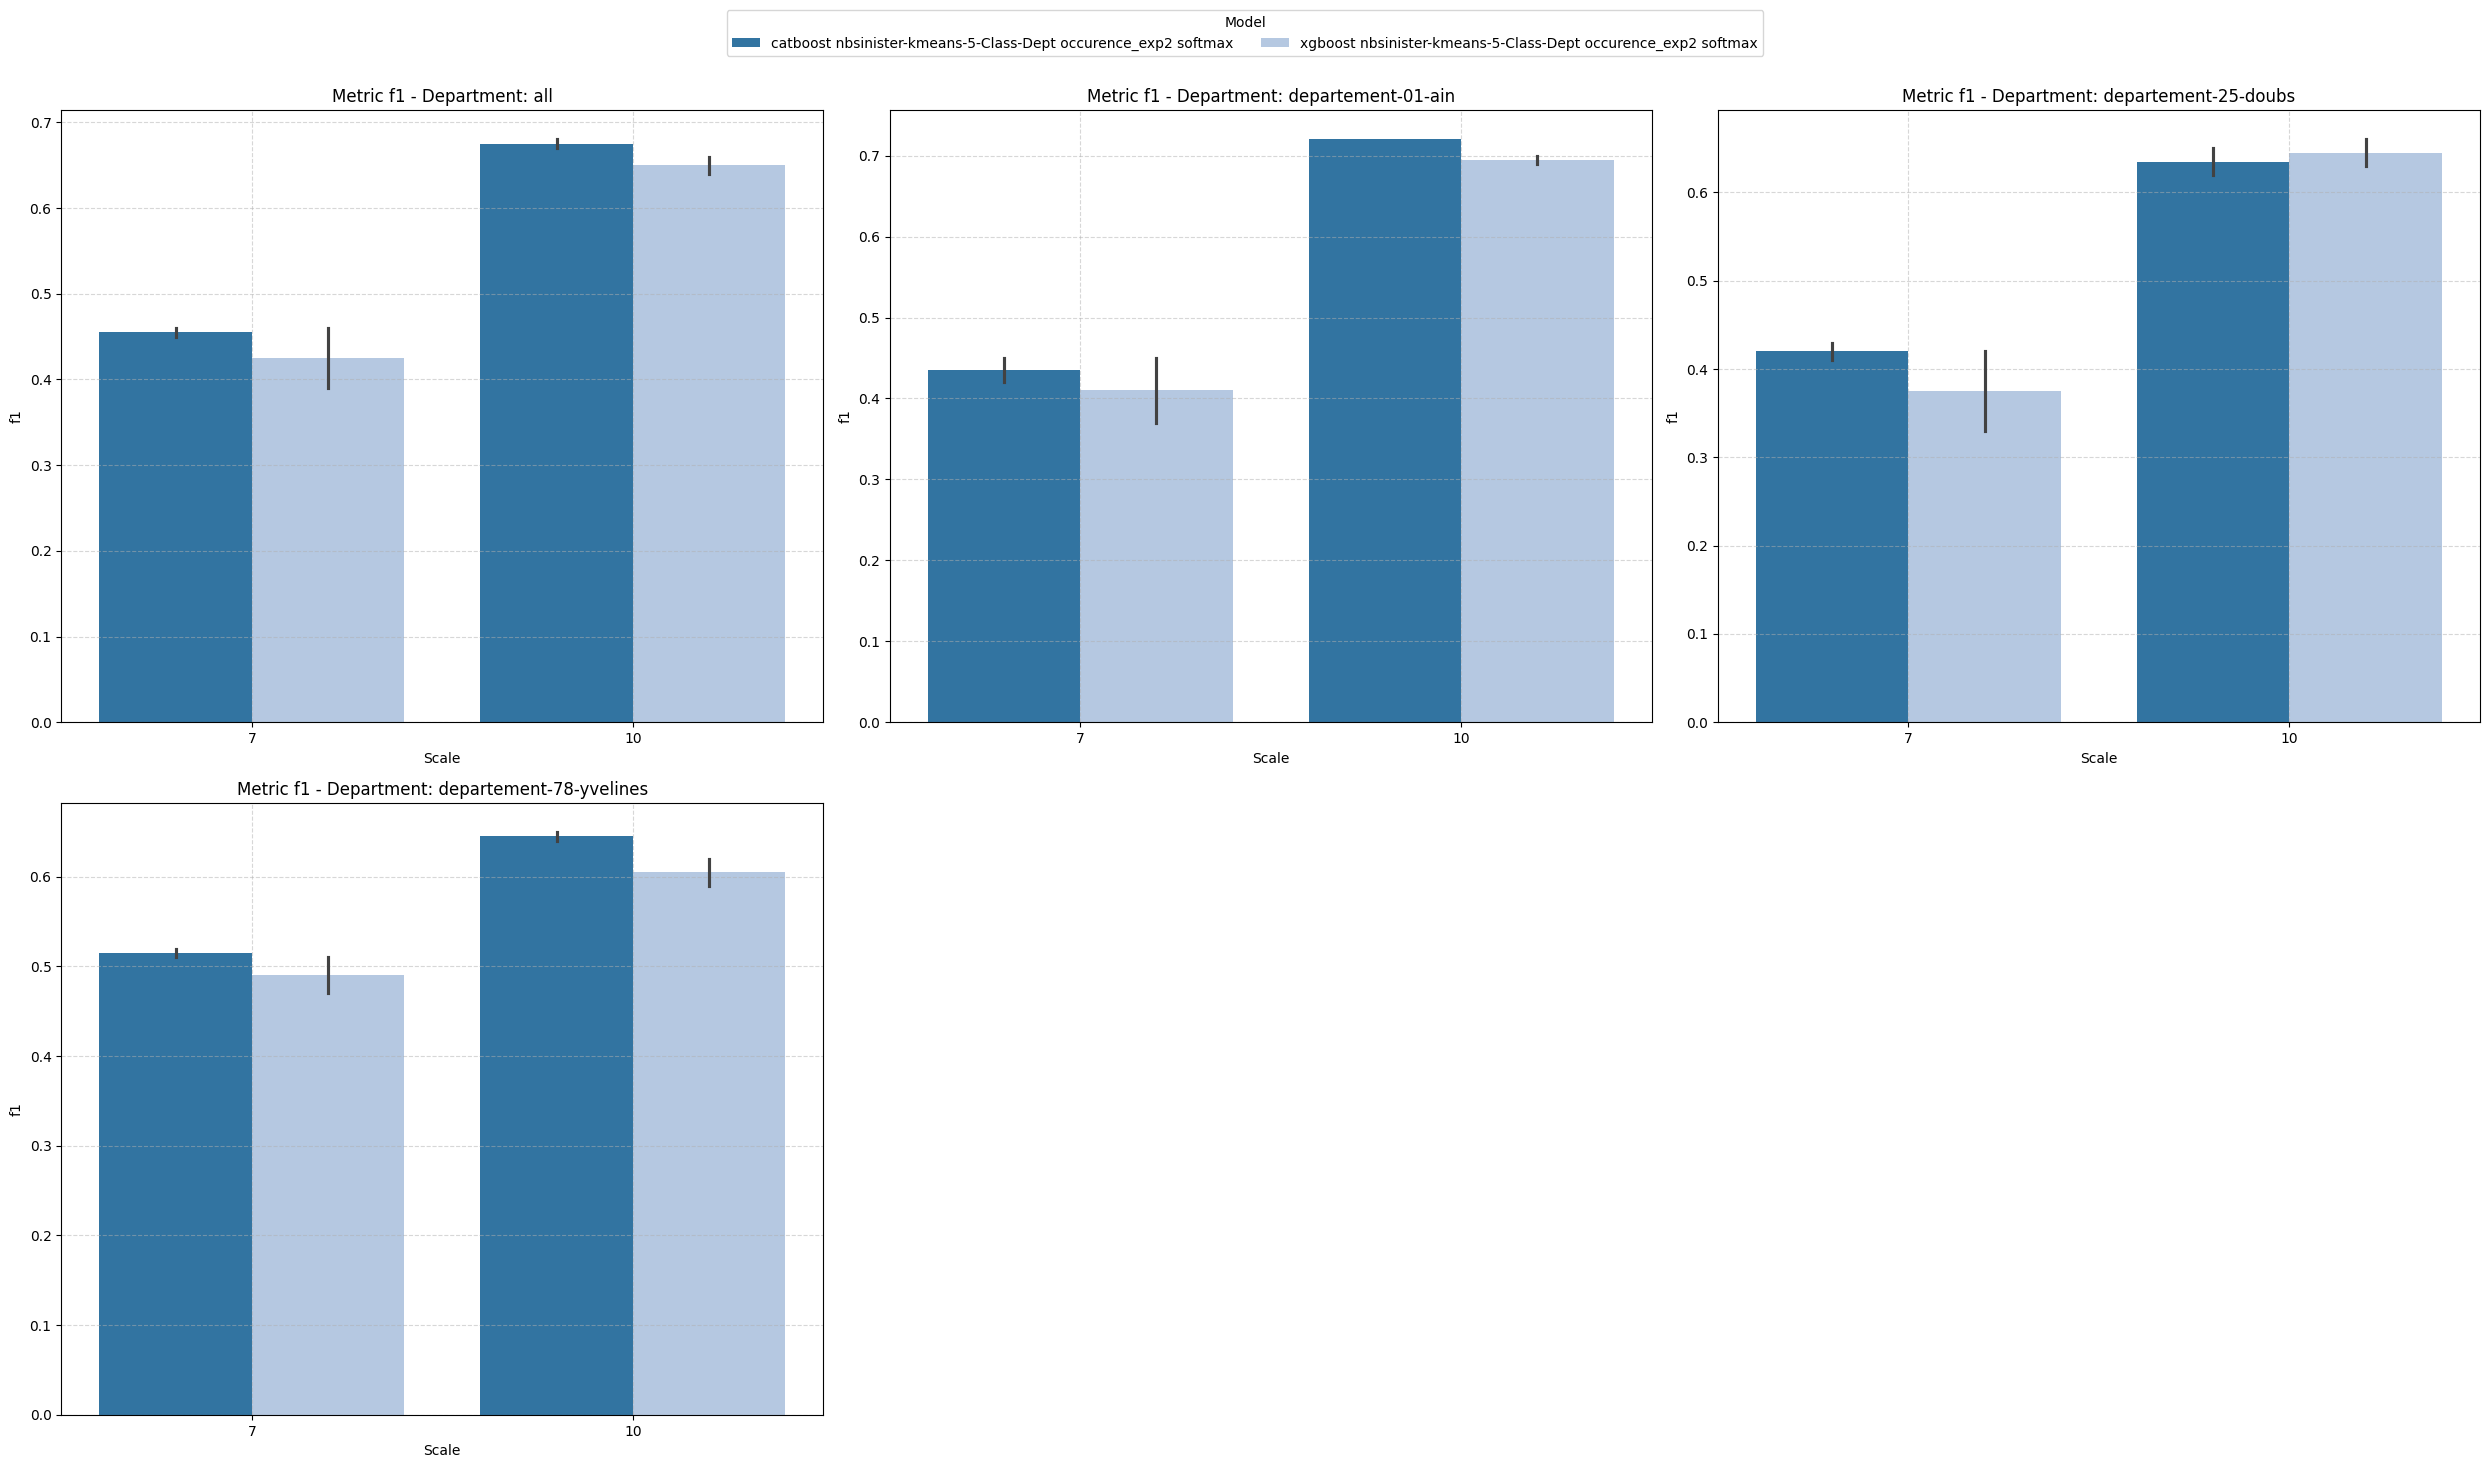

In [183]:
plot_column_comparison_bar(df[(df['Base'] == 'risk-size-watershed') |  (df['Base'] == 'None')], 'f1', 'Scale')

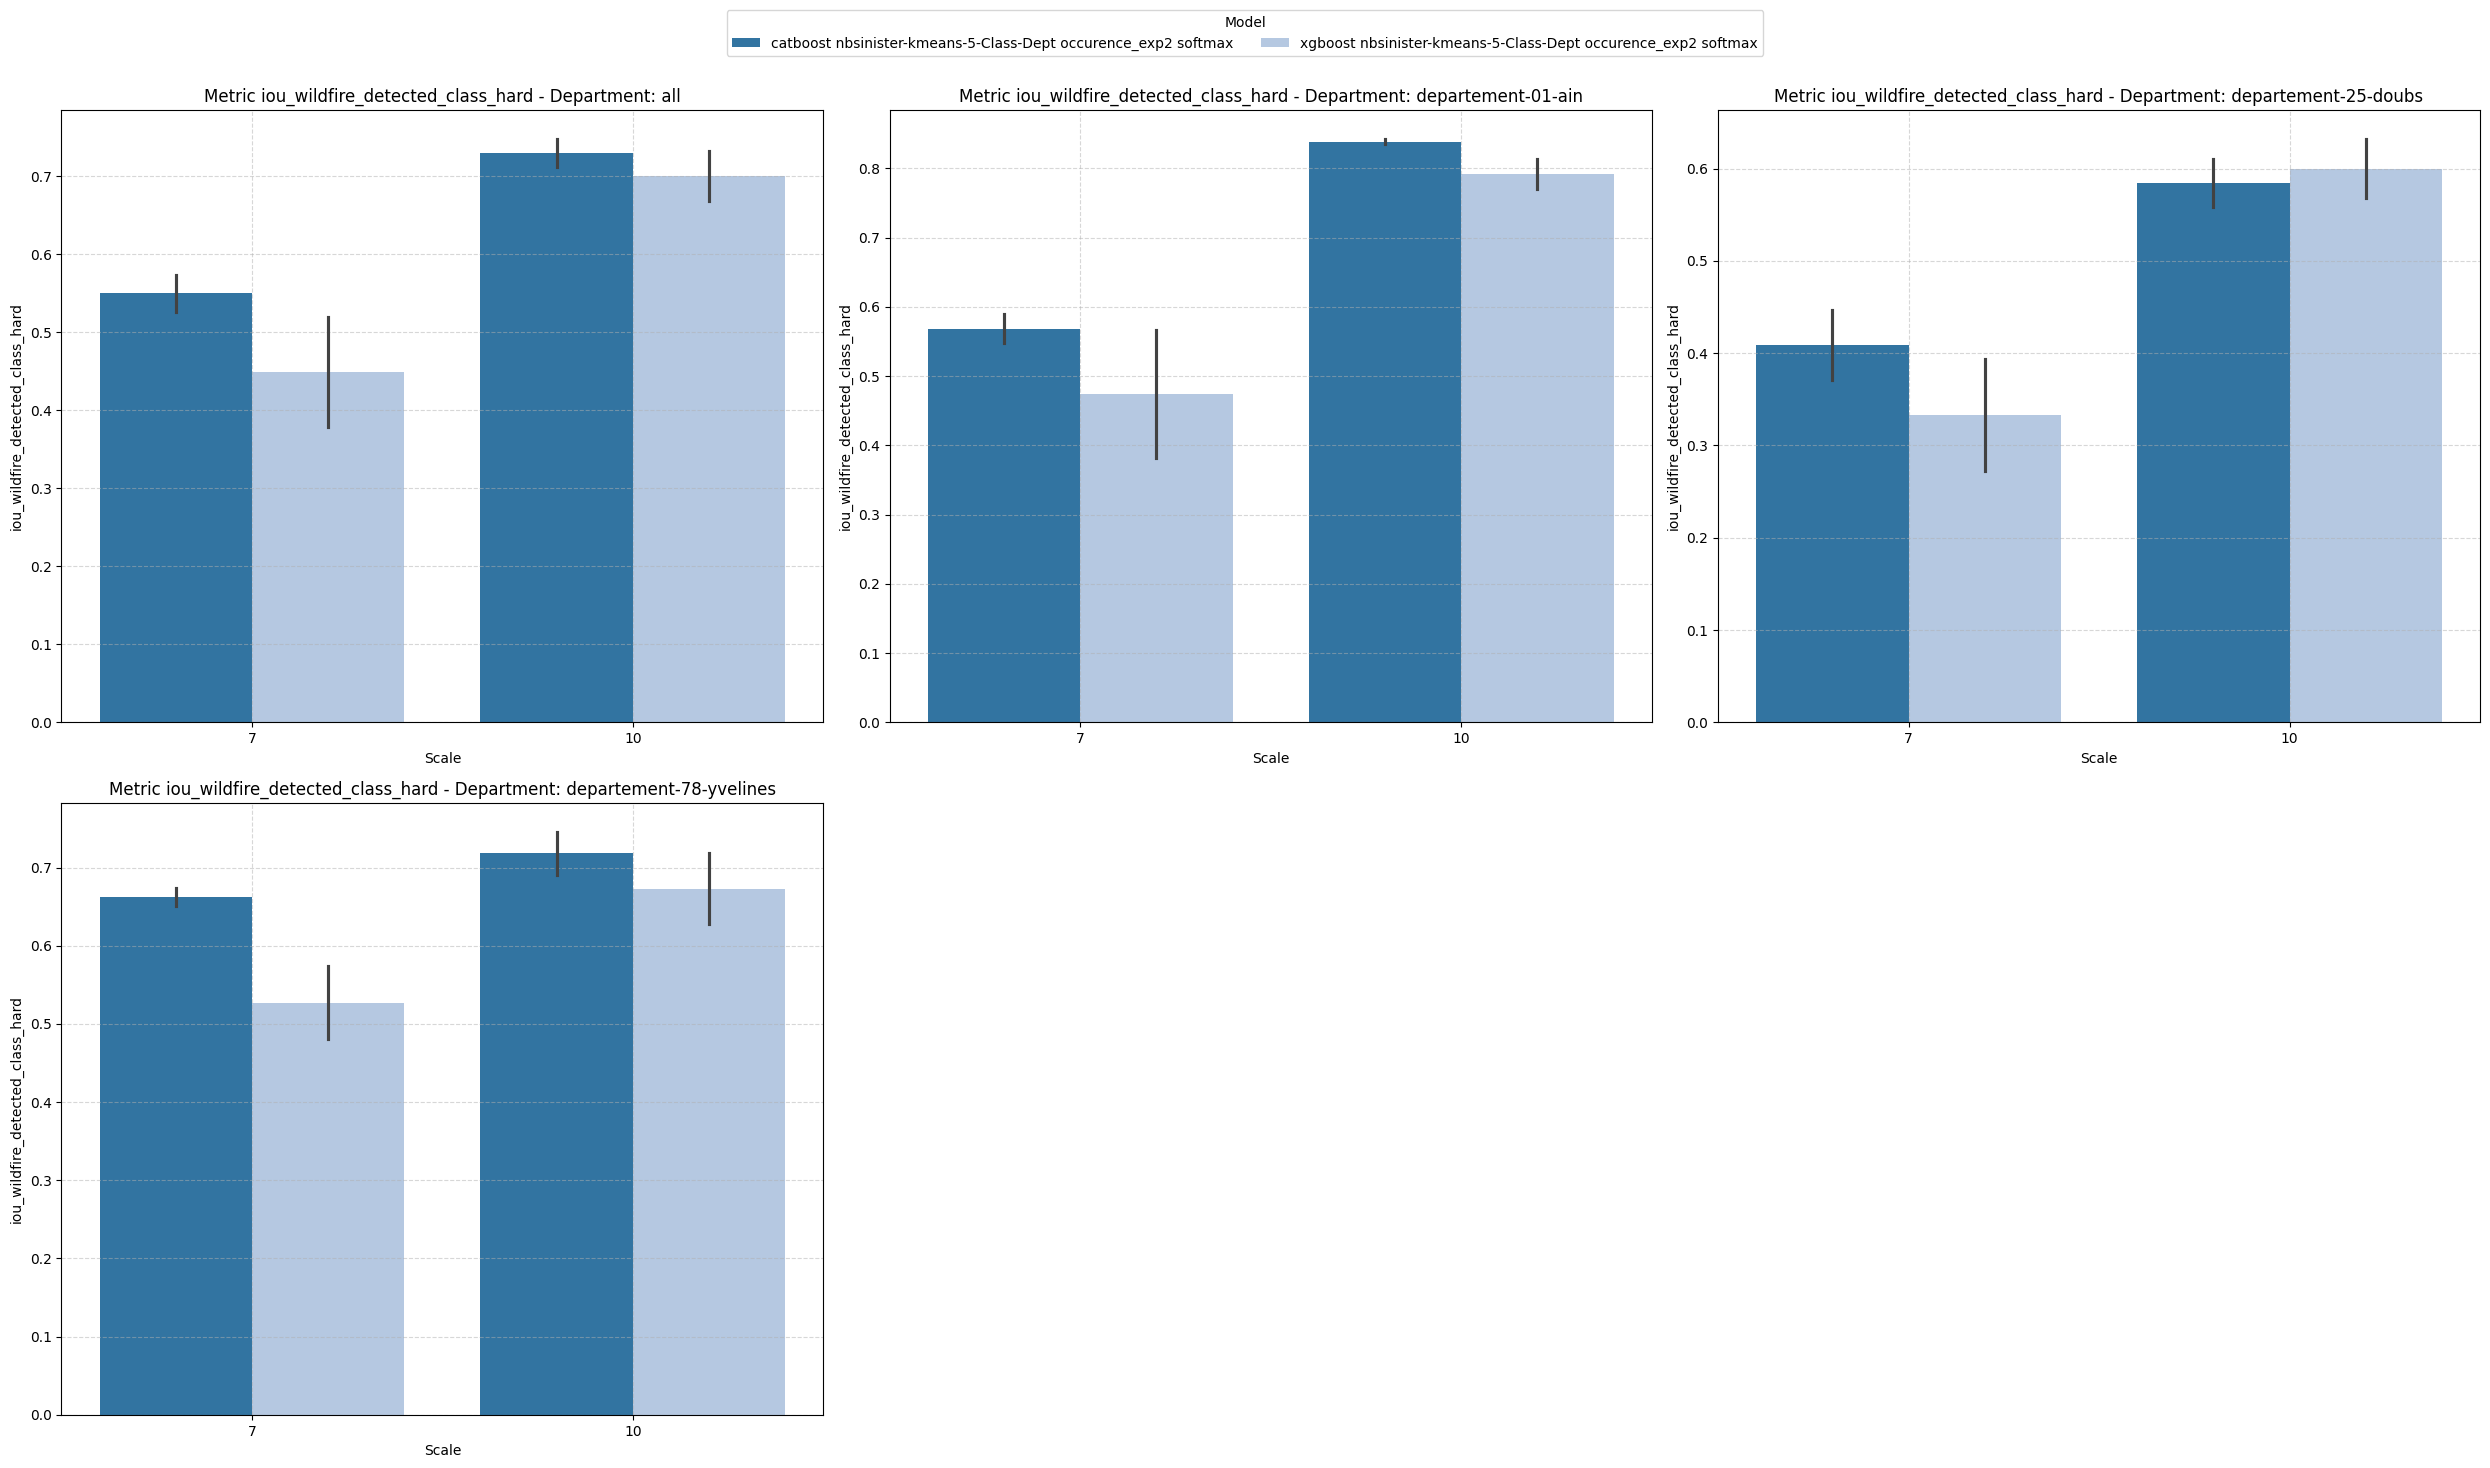

In [184]:
plot_column_comparison_bar(df[(df['Base'] == 'risk-size-watershed') | (df['Base'] == 'None')], 'iou_wildfire_detected_class_hard', 'Scale')

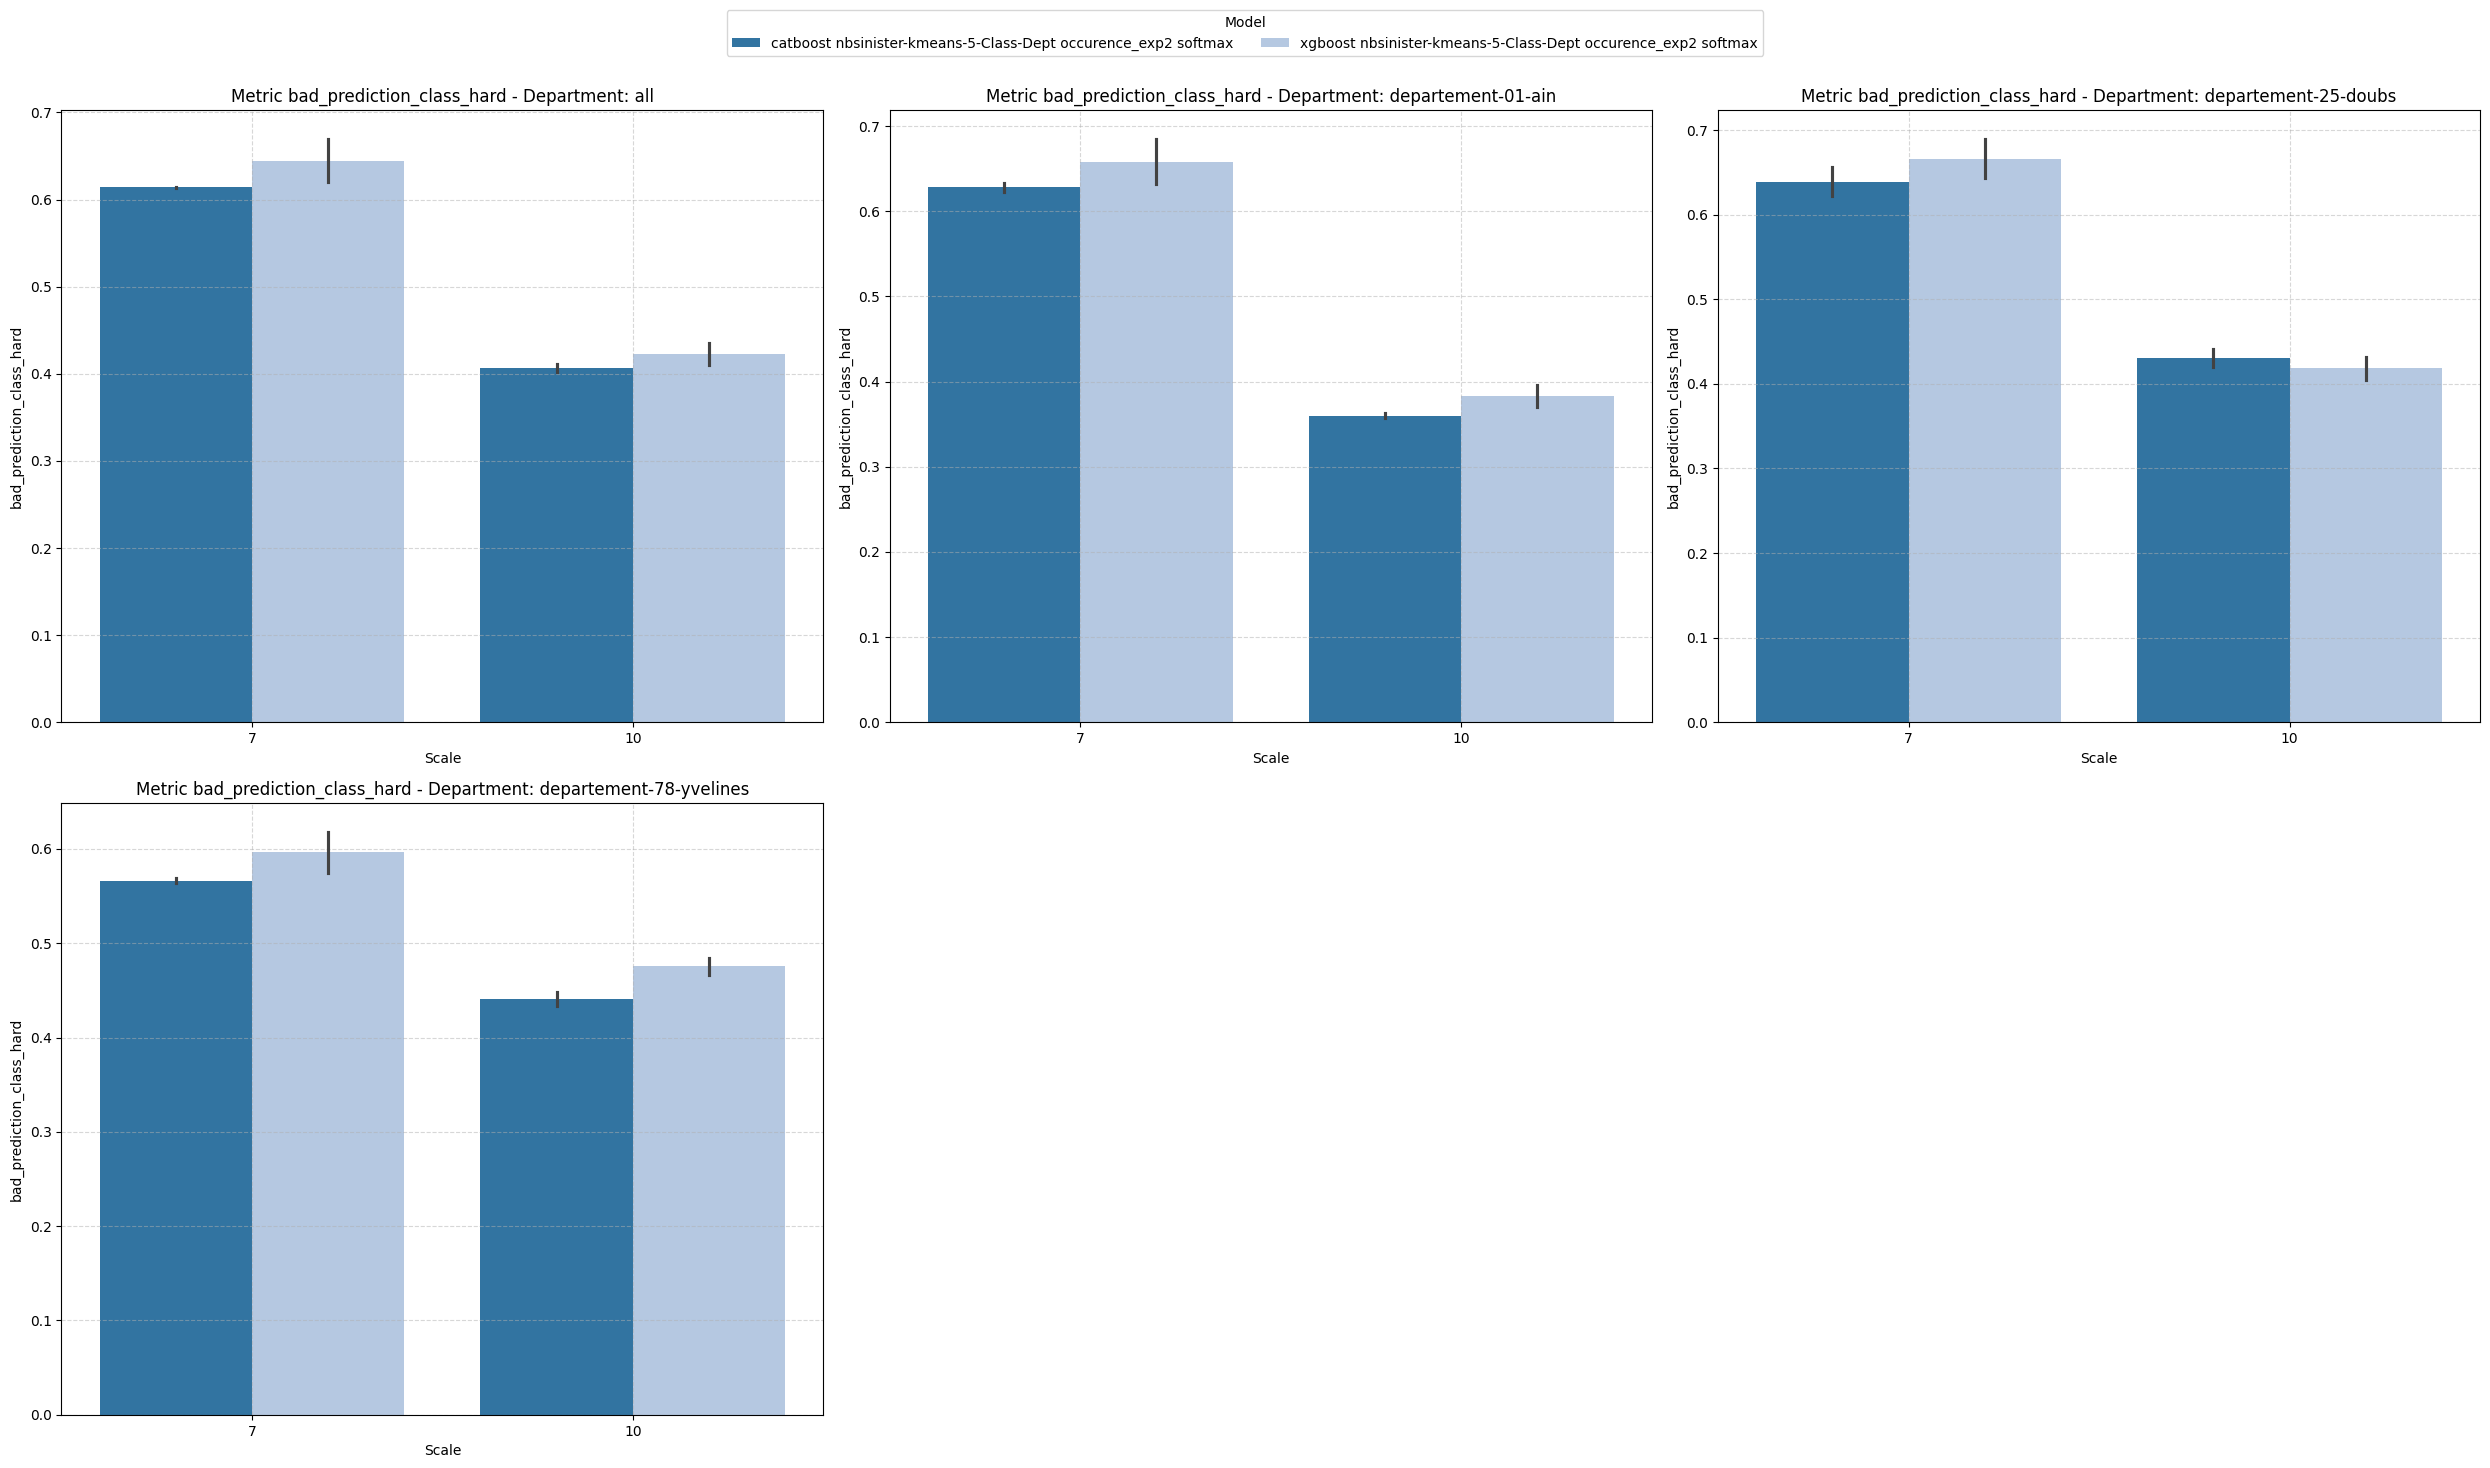

In [185]:
plot_column_comparison_bar(df[(df['Base'] == 'risk-size-watershed') | (df['Base'] == 'None')], 'bad_prediction_class_hard', 'Scale')

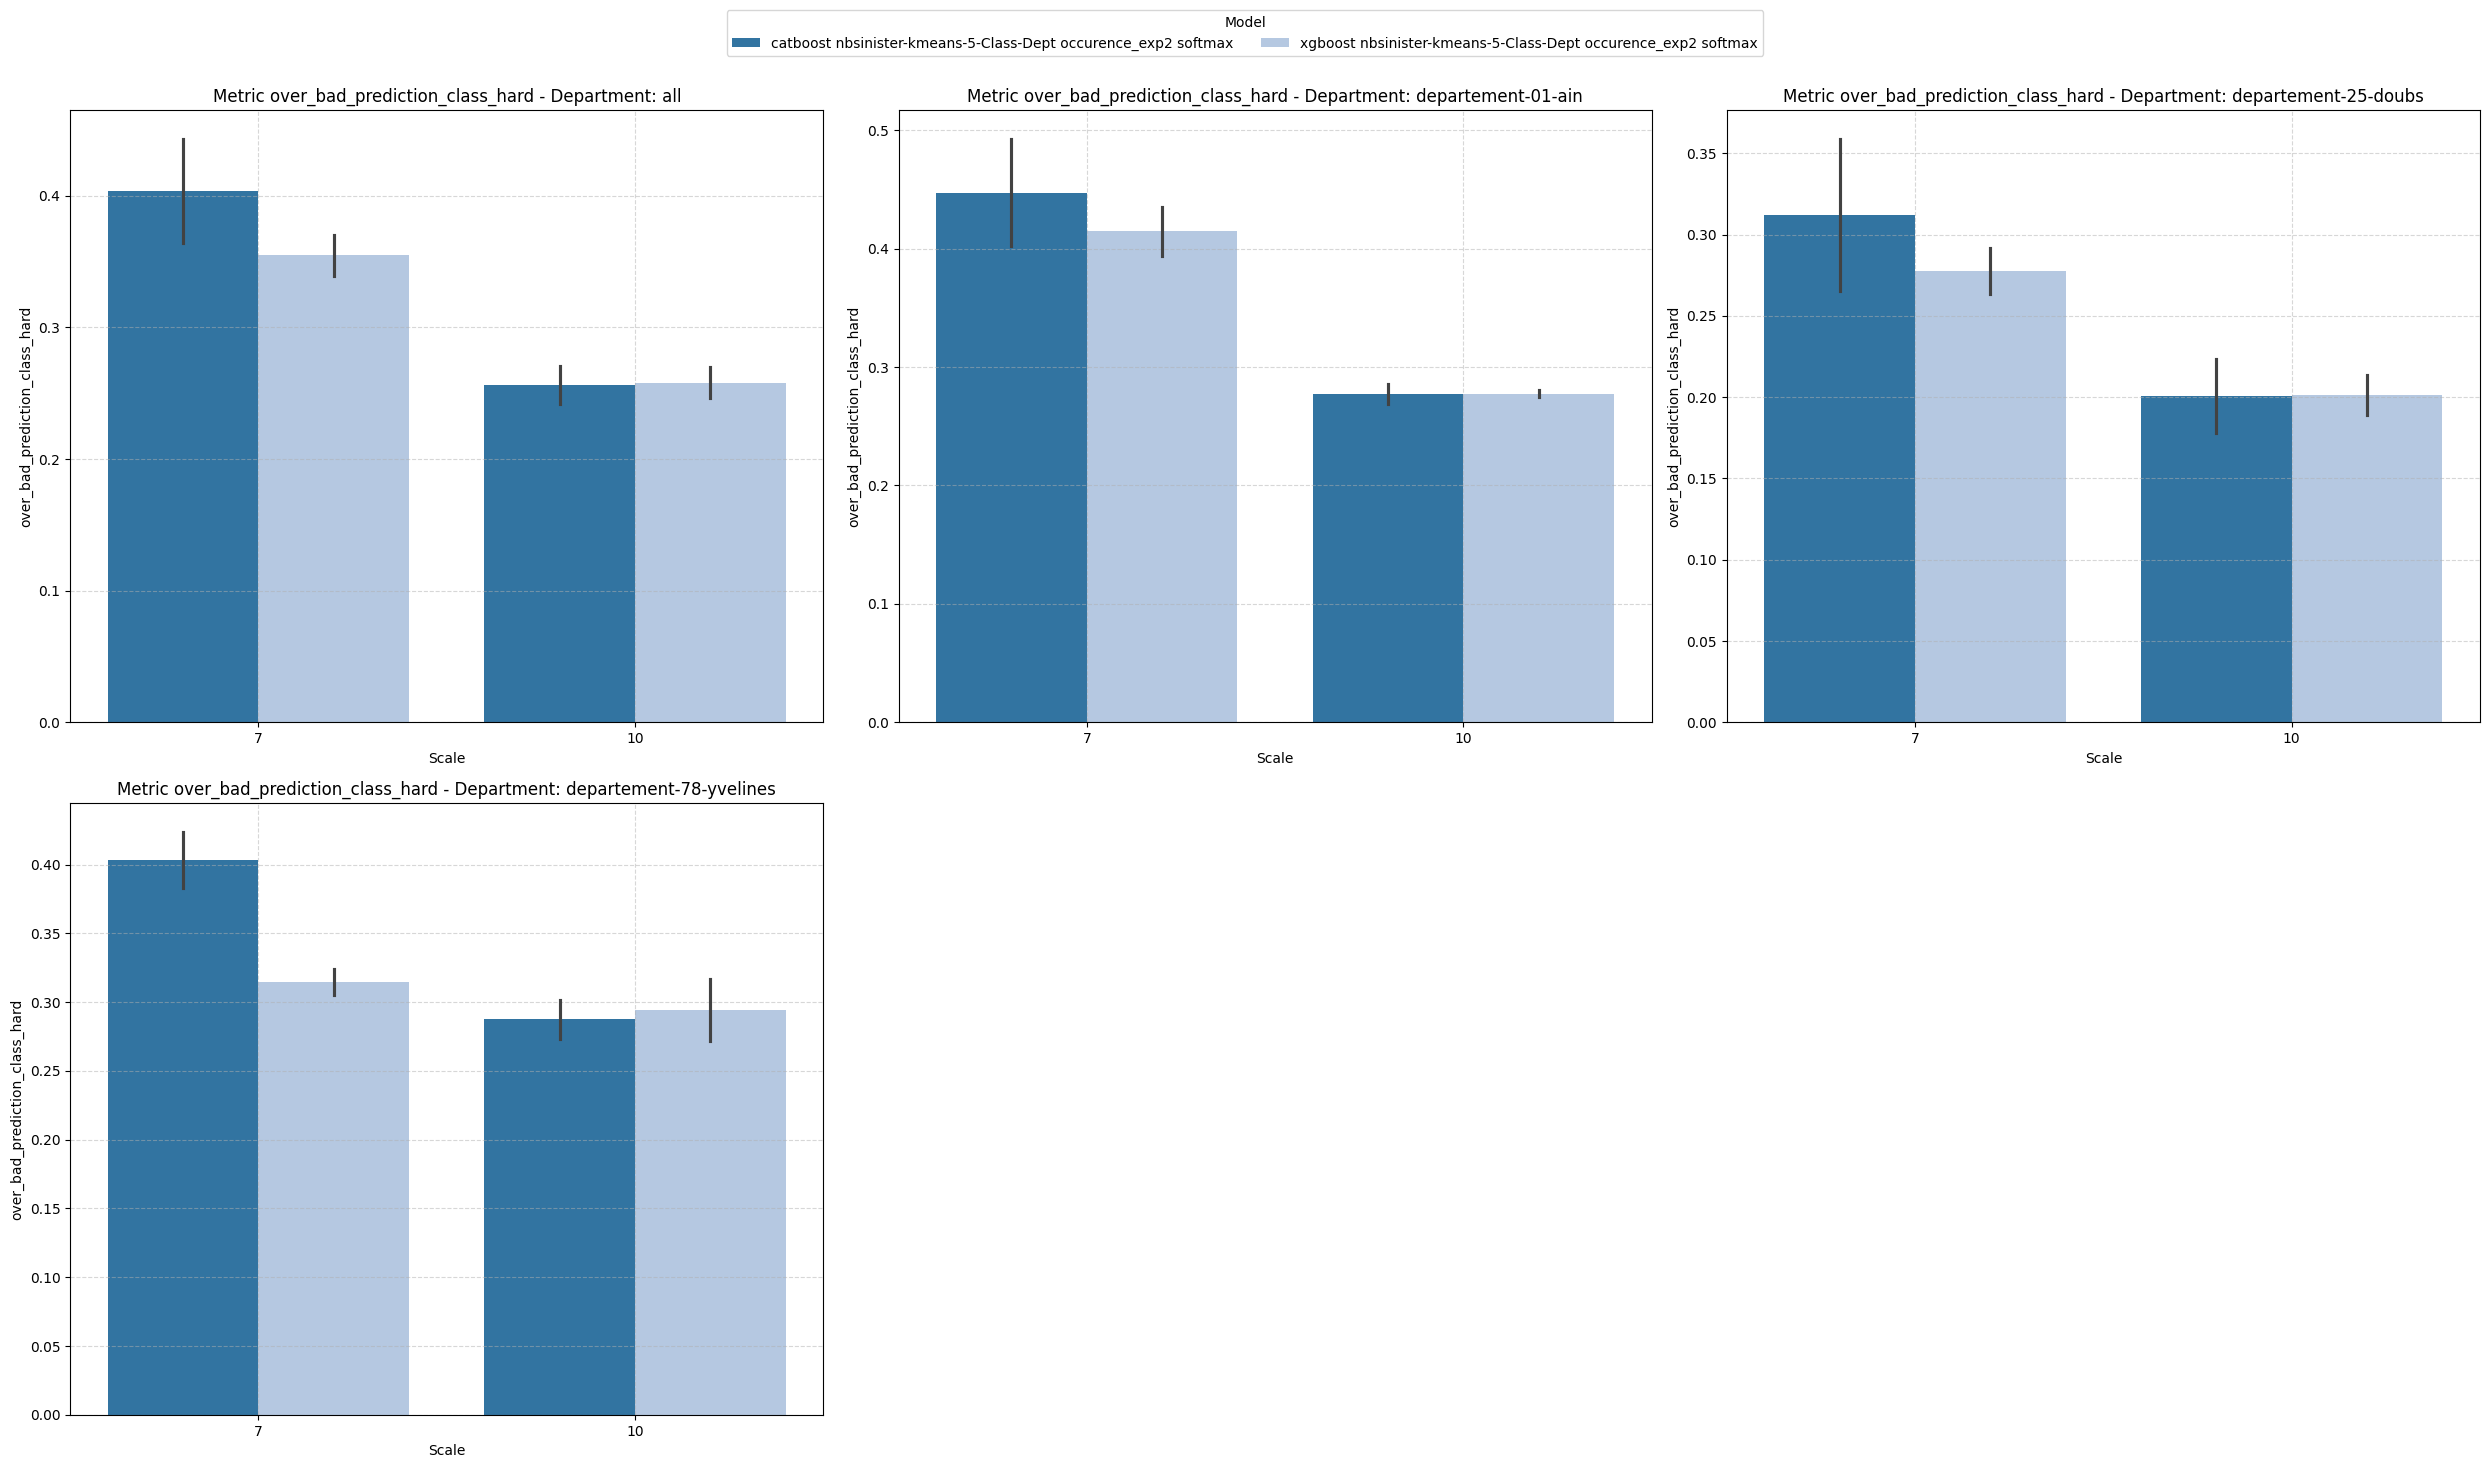

In [186]:
plot_column_comparison_bar(df[(df['Base'] == 'risk-size-watershed') | (df['Base'] == 'None')], 'over_bad_prediction_class_hard', 'Scale')

In [187]:
df.Model.unique()

array(['catboost nbsinister-kmeans-5-Class-Dept occurence_exp2 softmax',
       'xgboost nbsinister-kmeans-5-Class-Dept occurence_exp2 softmax'],
      dtype=object)

In [188]:
plot_result(df[df['Model'].isin(['filter-catboost-soft-weight-all', 'catboost', 'filter-xgboost-soft-weight-1'])], 'iou_class_hard', 'bdiff', '10')

ValueError: Number of rows must be a positive integer, not 0

<Figure size 2500x0 with 0 Axes>

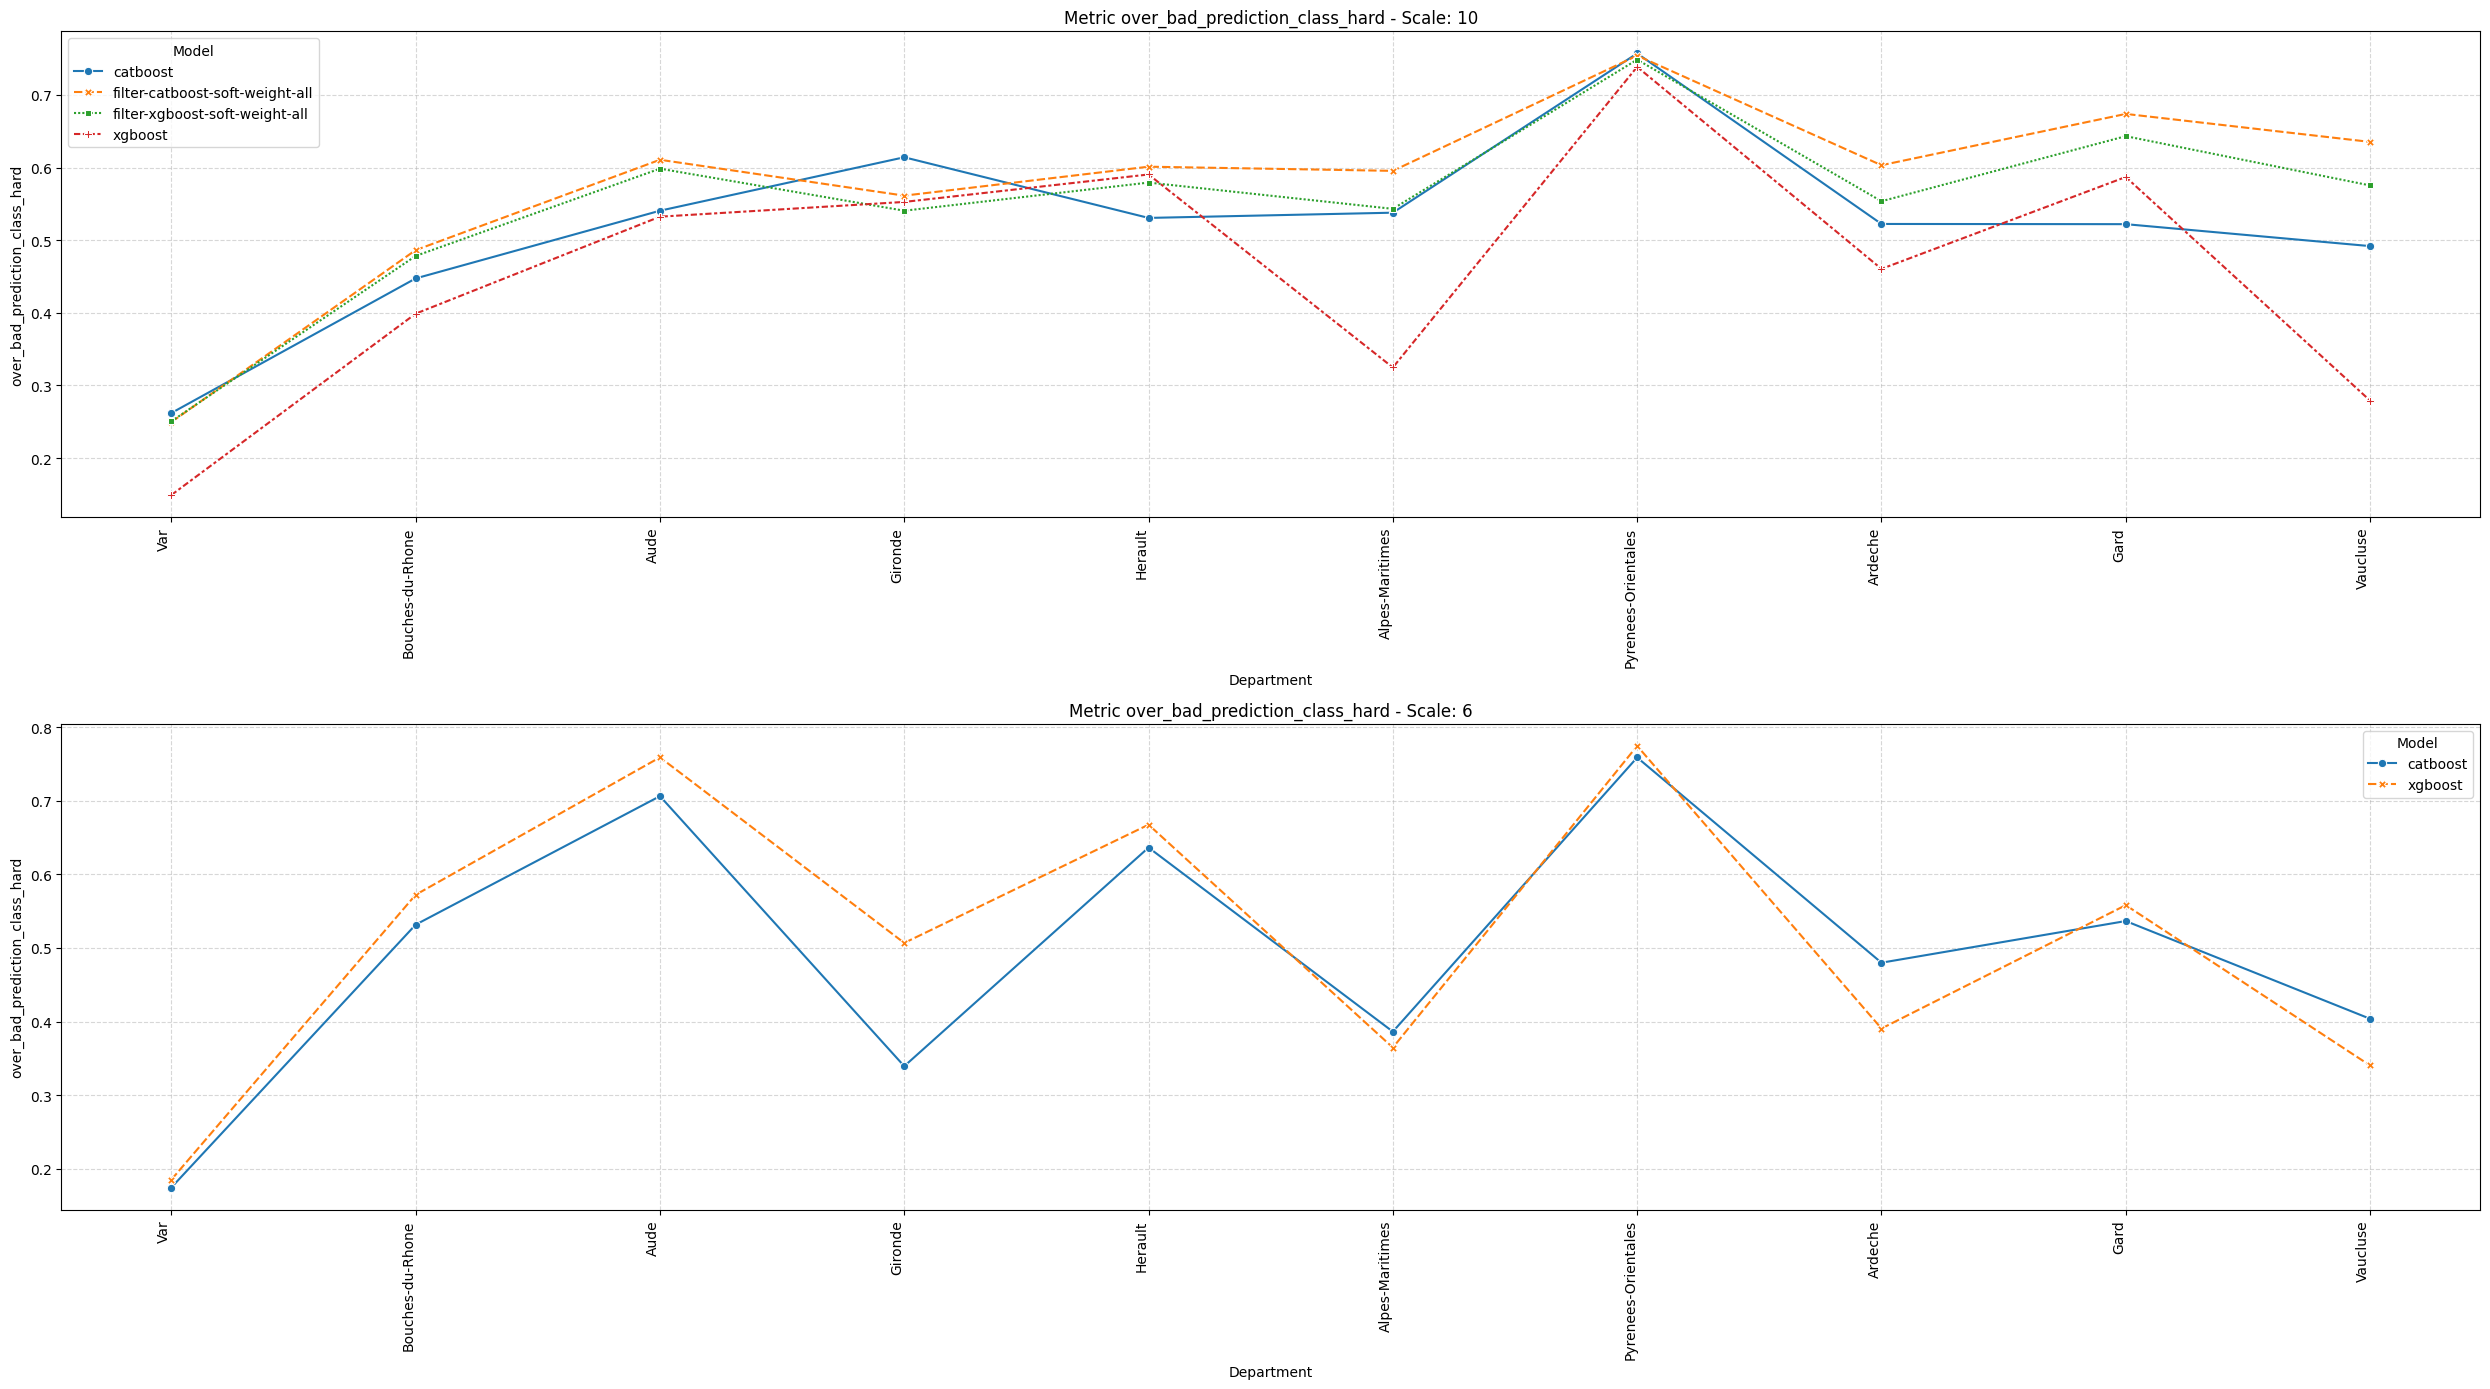

In [92]:
plot_result(df[df['Model'].isin(['xgboost', 'filter-xgboost-soft-weight-all', 'catboost', 'filter-catboost-soft-weight-all'])], 'over_bad_prediction_class_hard', 'bdiff', 10)

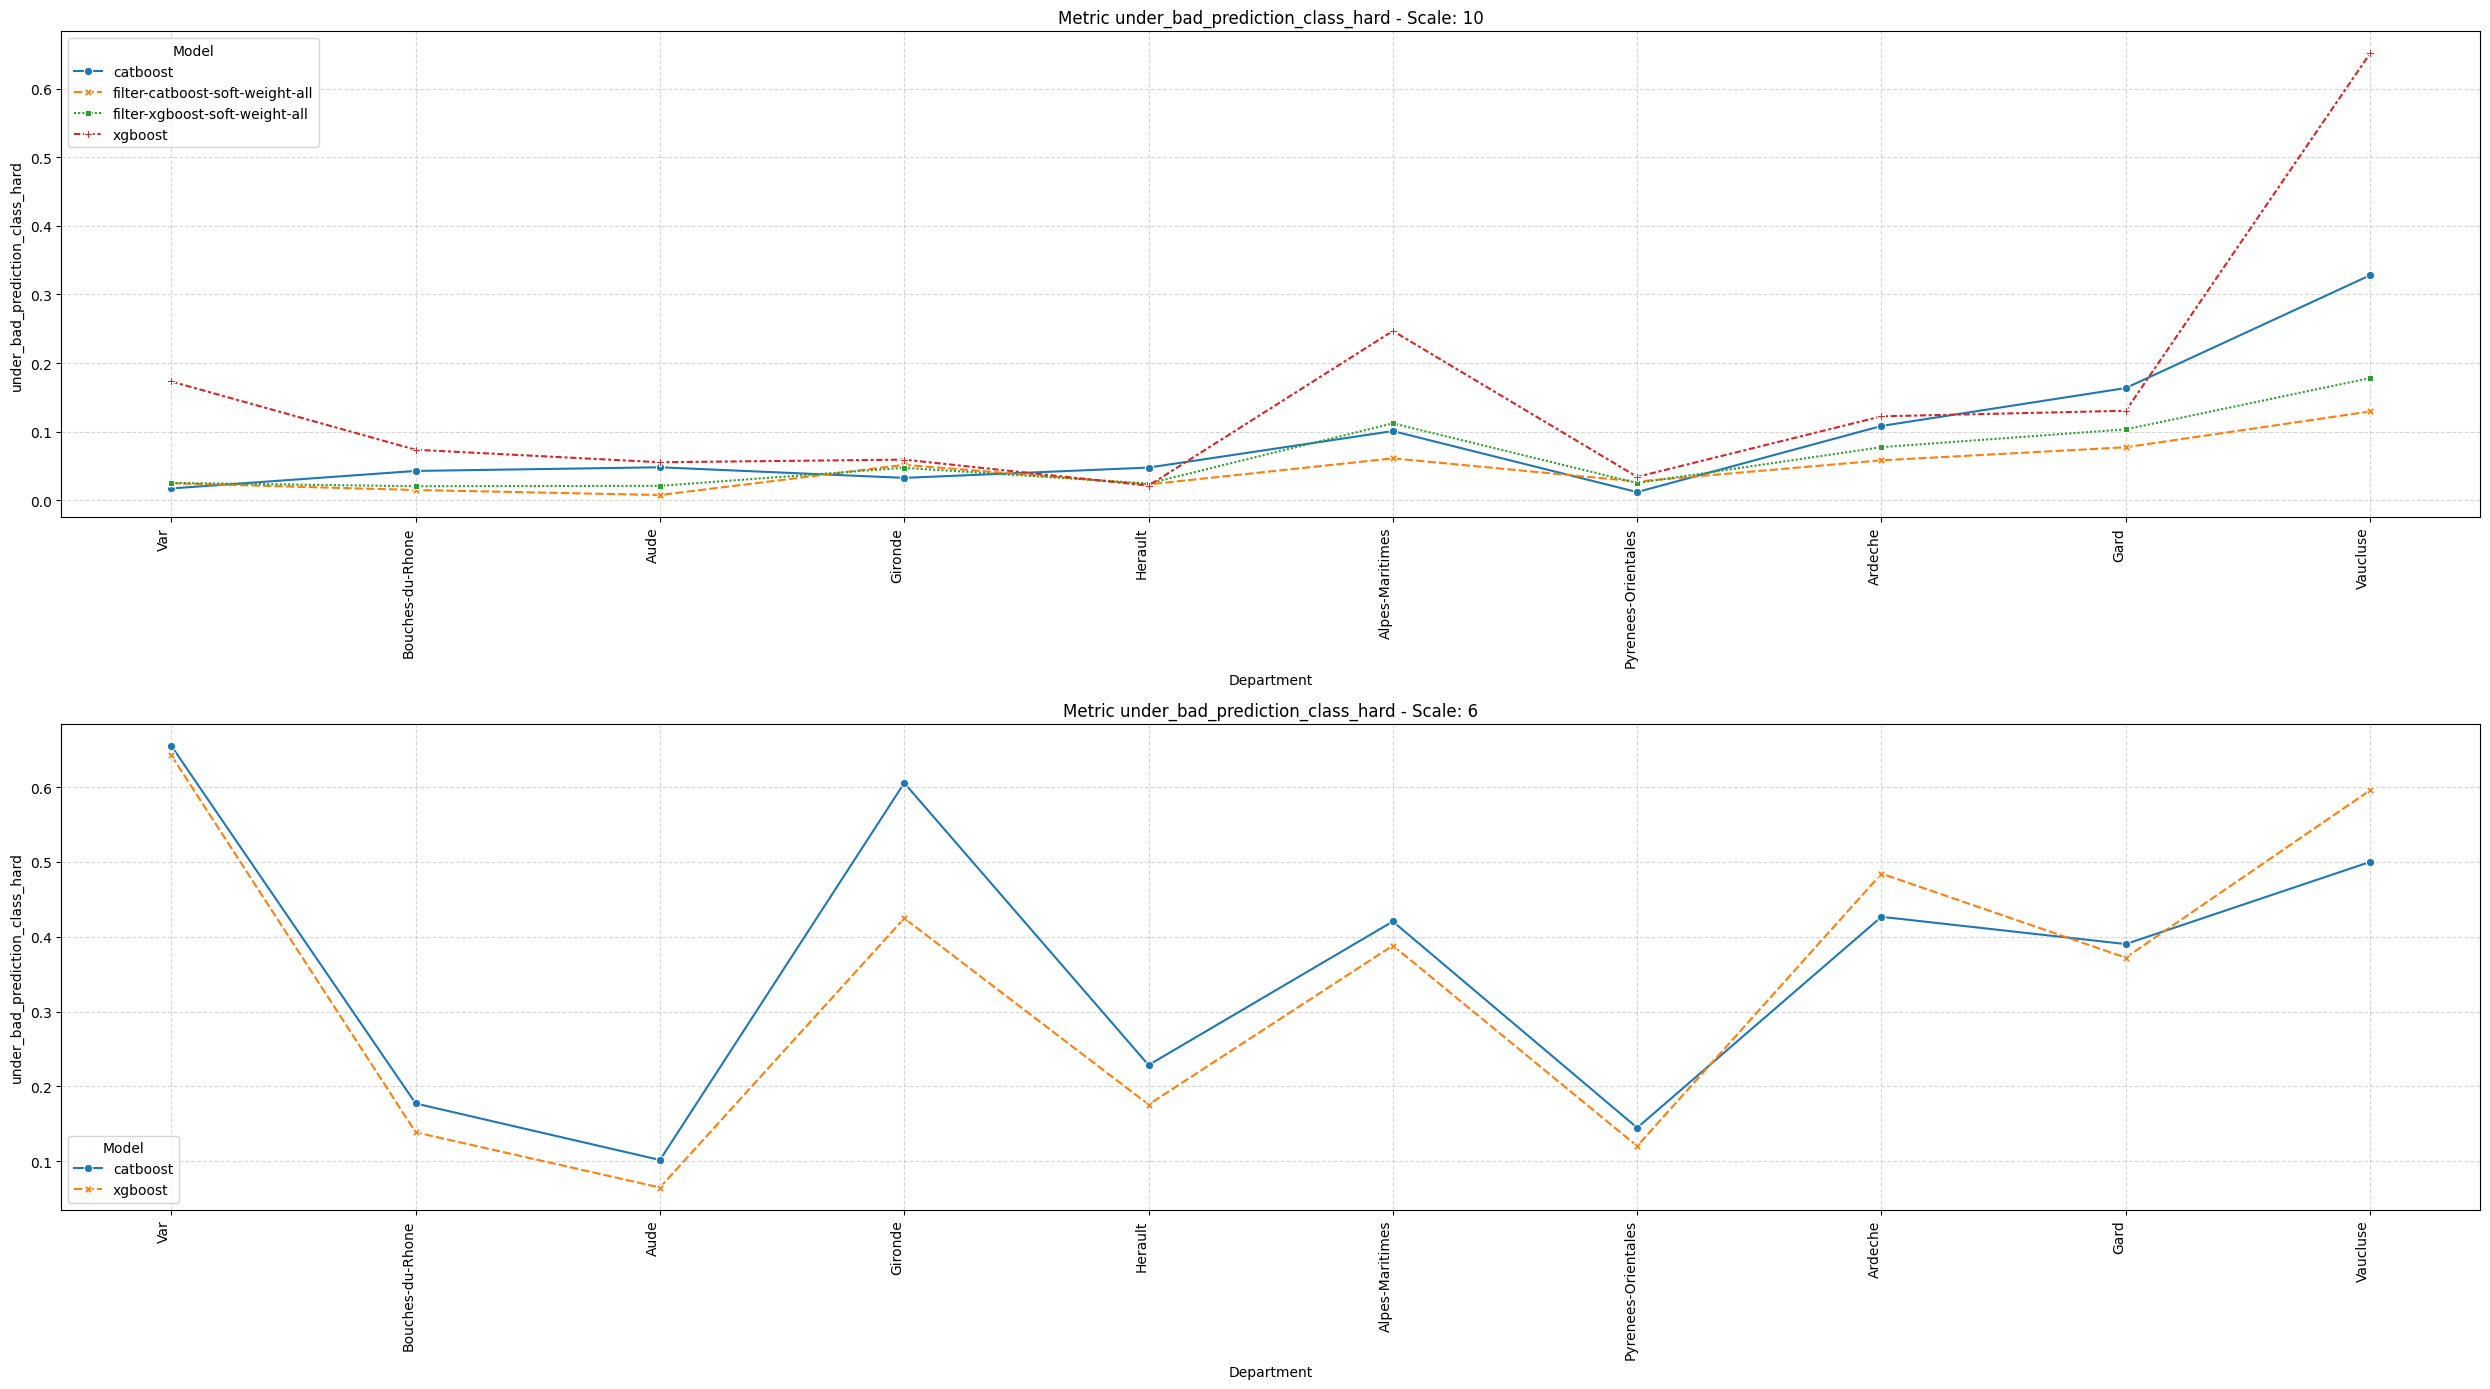

In [93]:
plot_result(df[df['Model'].isin(['xgboost', 'filter-xgboost-soft-weight-all', 'catboost', 'filter-catboost-soft-weight-all'])], 'under_bad_prediction_class_hard', 'bdiff', 10)

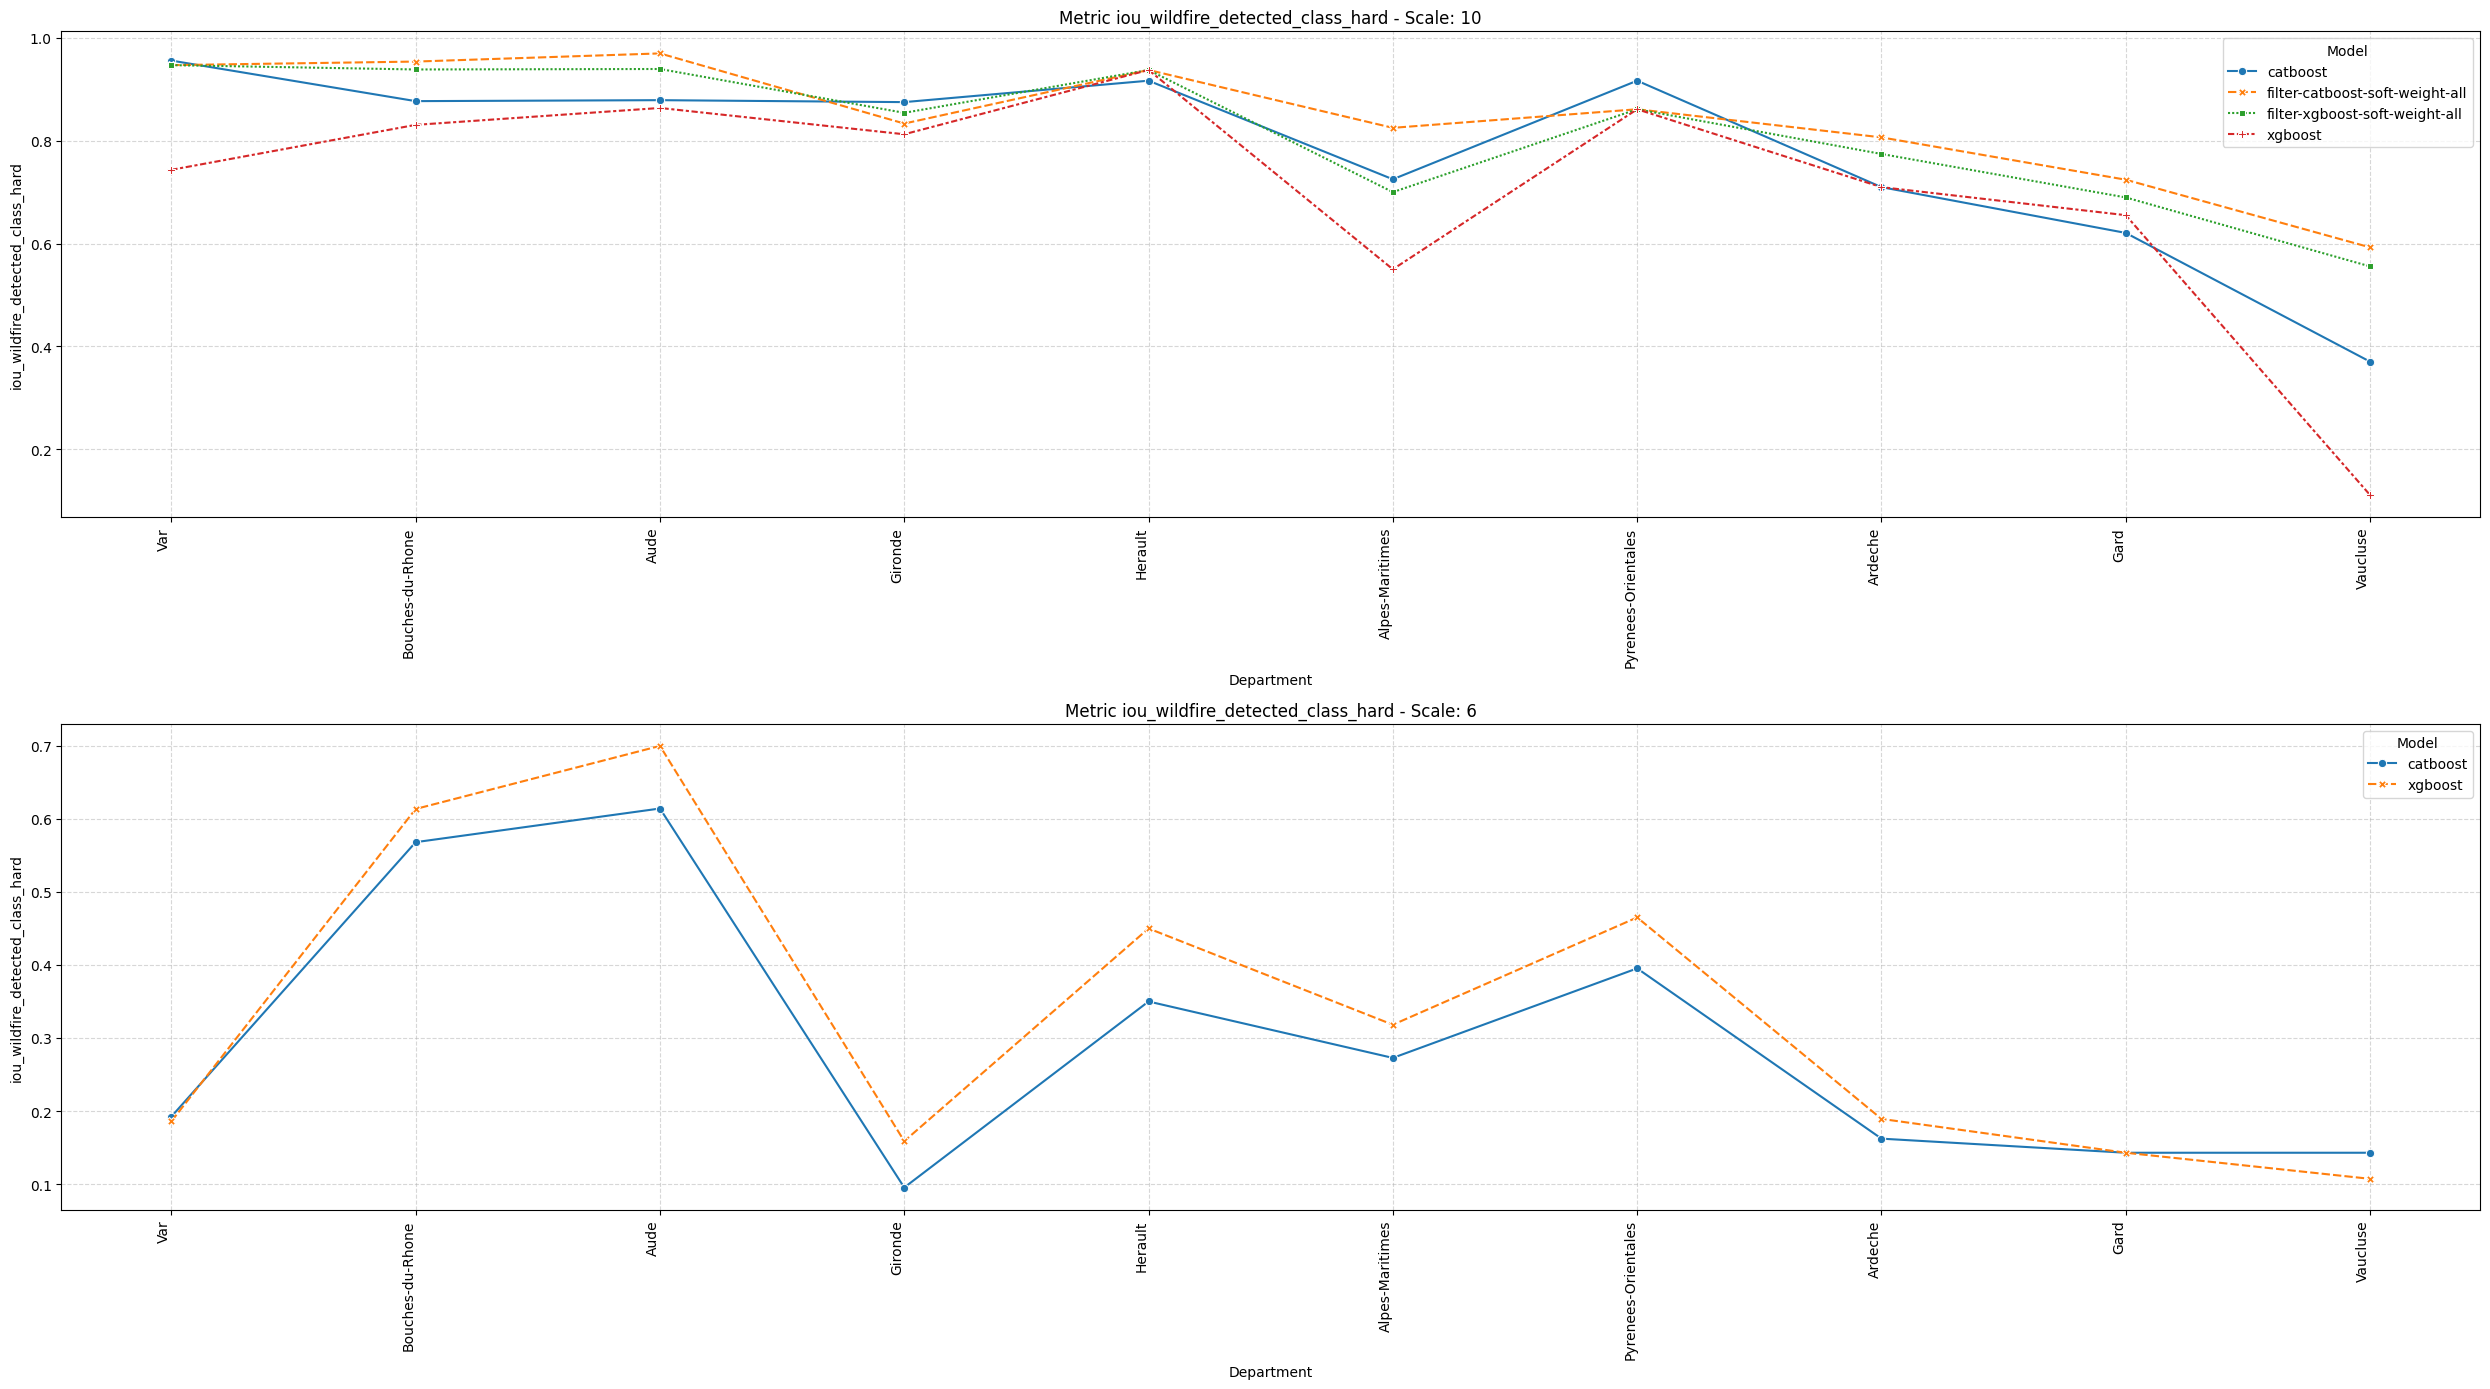

In [94]:
plot_result(df[df['Model'].isin(['xgboost', 'filter-xgboost-soft-weight-all', 'catboost', 'filter-catboost-soft-weight-all'])], 'iou_wildfire_detected_class_hard', 'bdiff', 10)

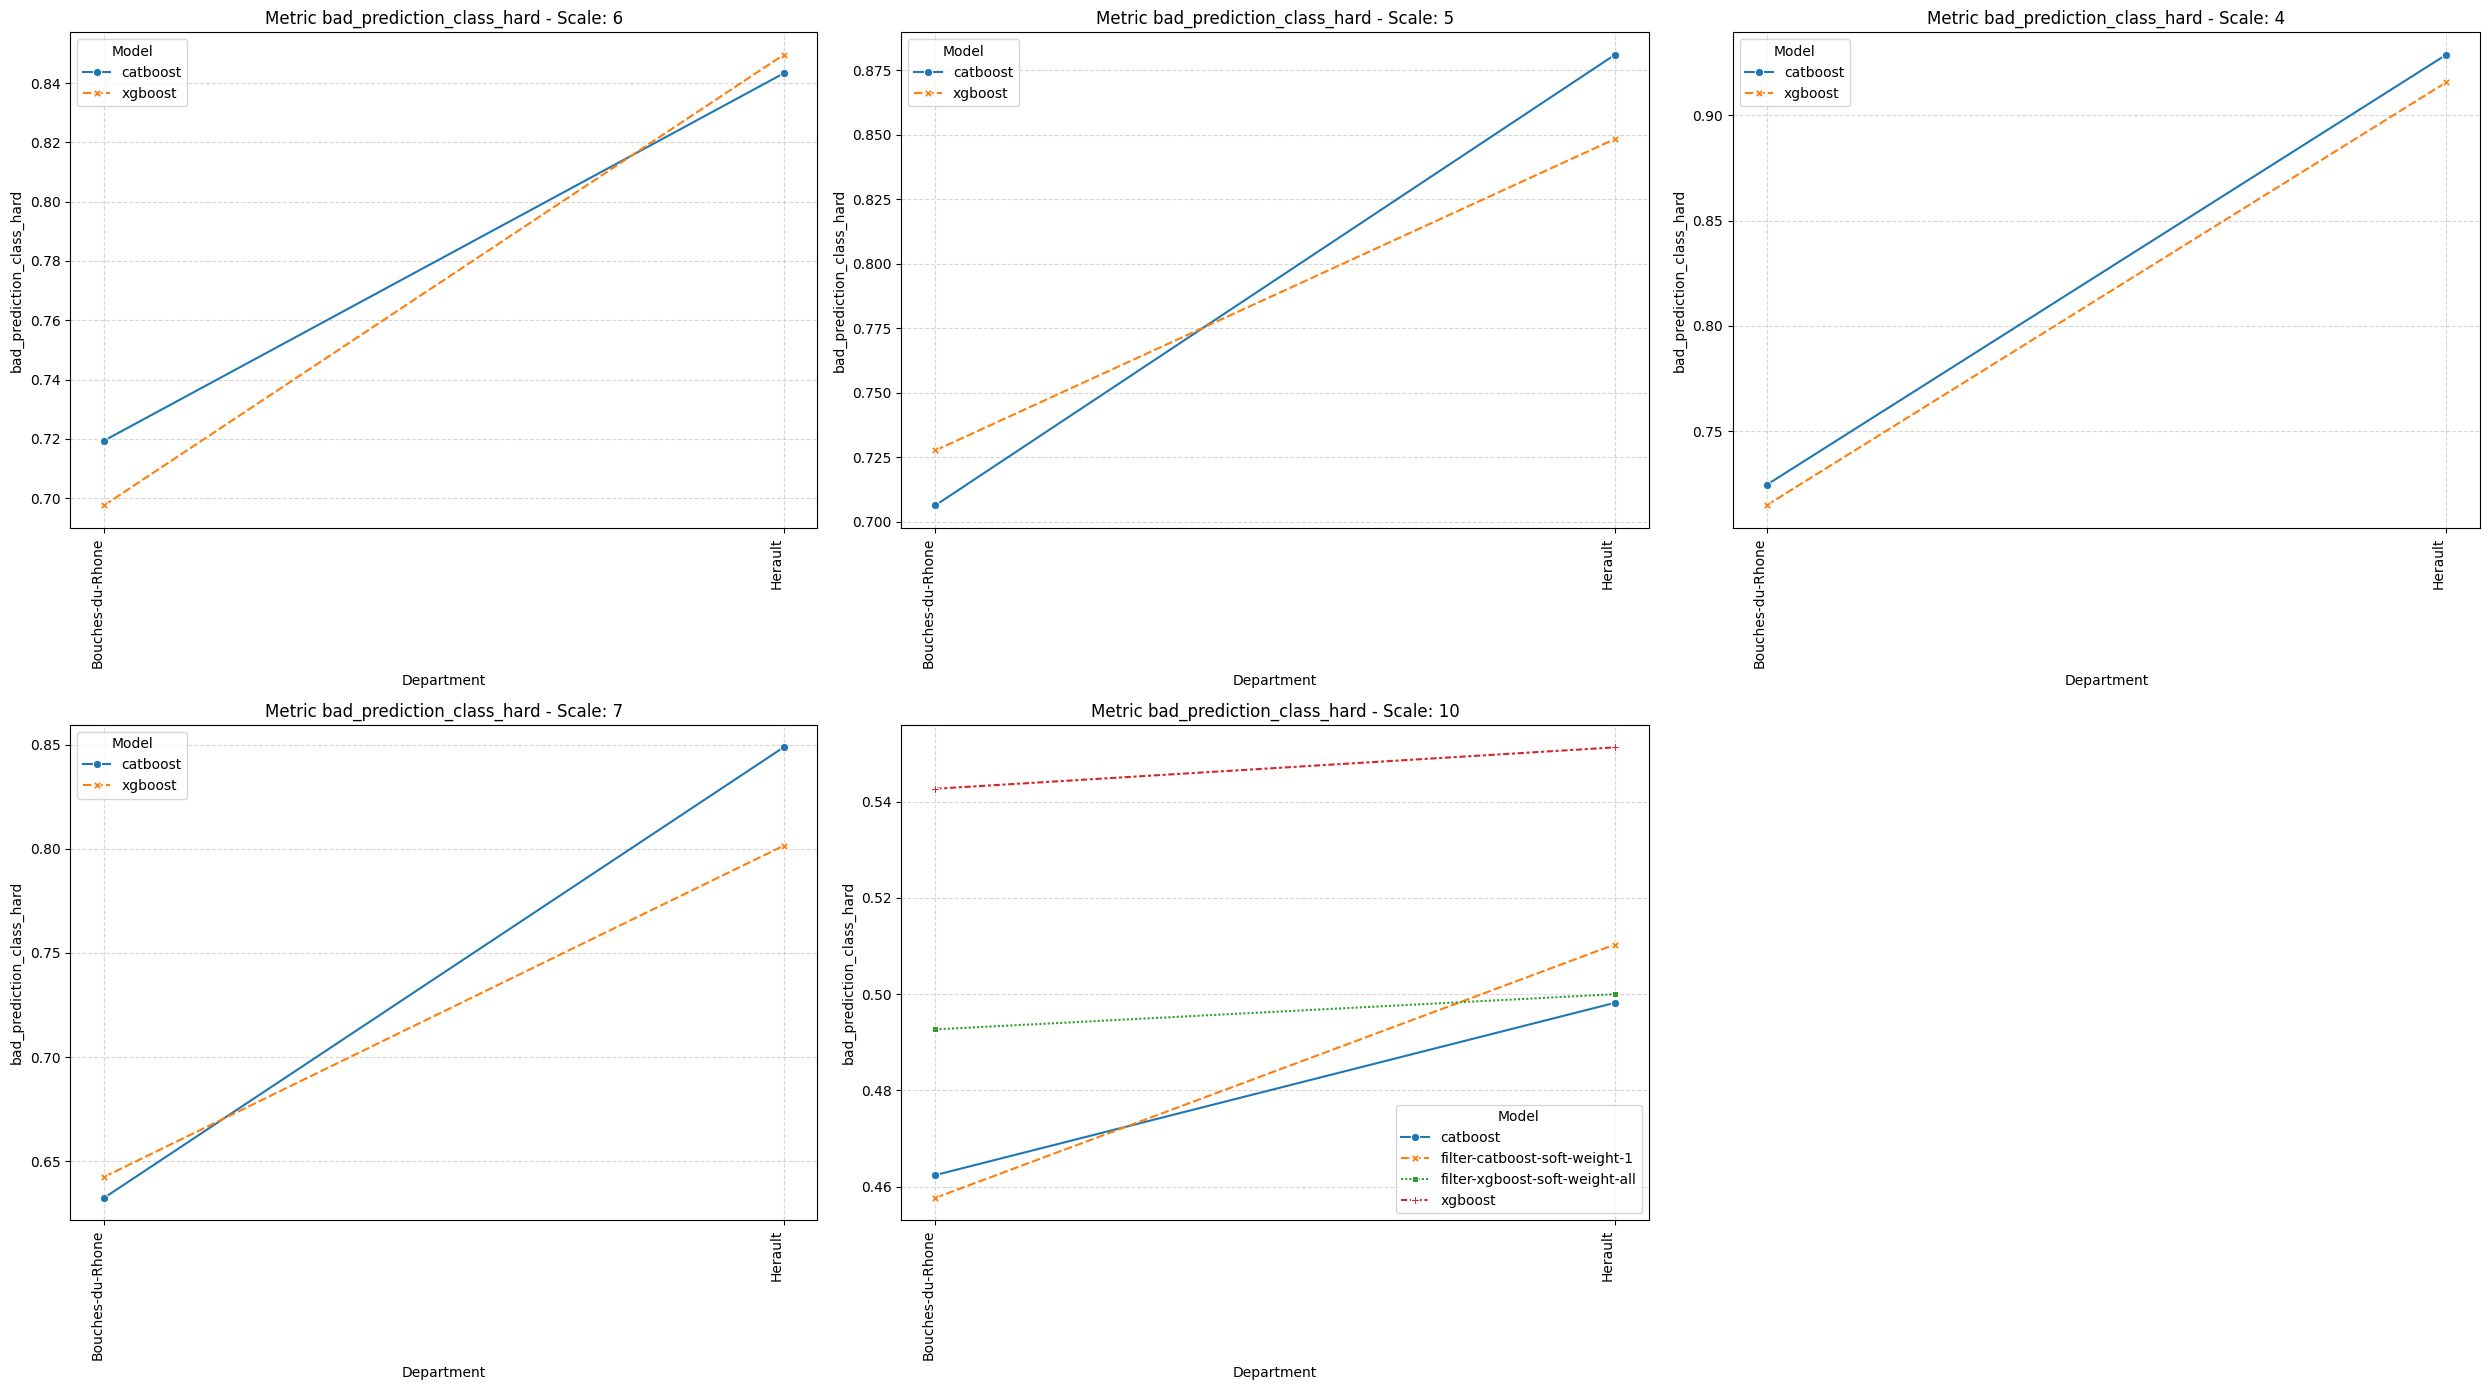

In [95]:
plot_result(df[df['Model'].isin(['catboost', 'xgboost', 'filter-catboost-soft-weight-1', 'filter-xgboost-soft-weight-all'])], 'bad_prediction_class_hard', 'bdiff_small')

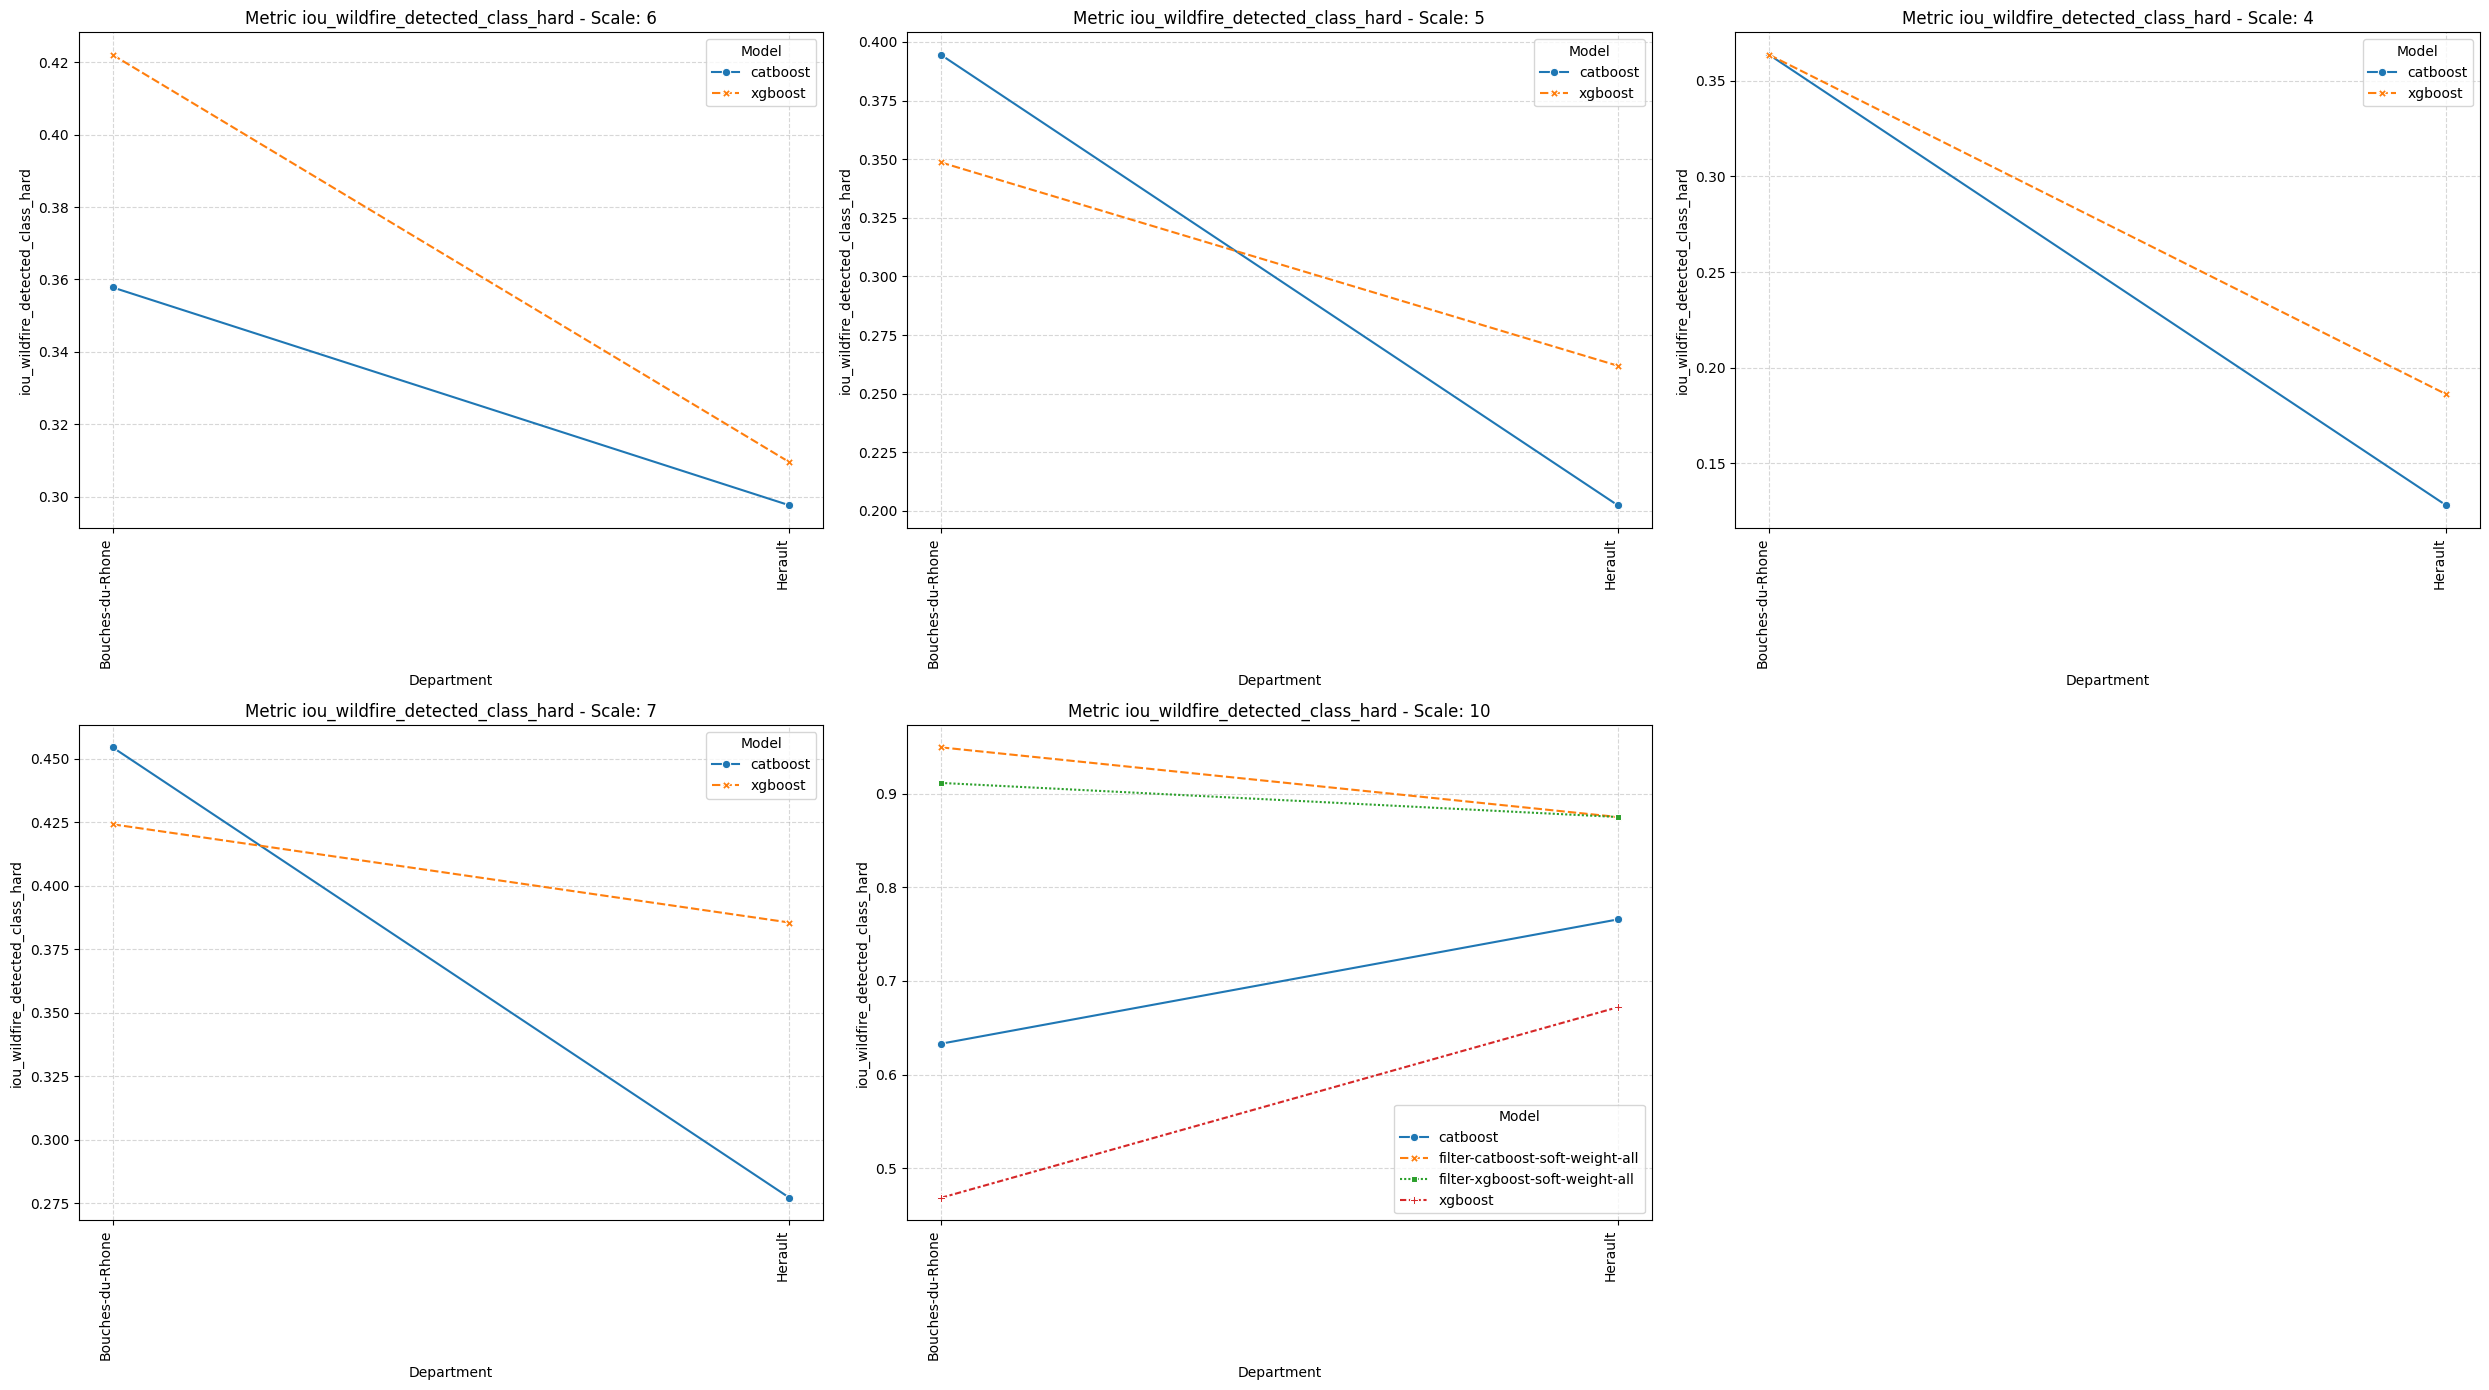

In [96]:
plot_result(df[df['Model'].isin(['catboost', 'xgboost', 'filter-catboost-soft-weight-all', 'filter-xgboost-soft-weight-all'])], 'iou_wildfire_detected_class_hard', 'bdiff_small')

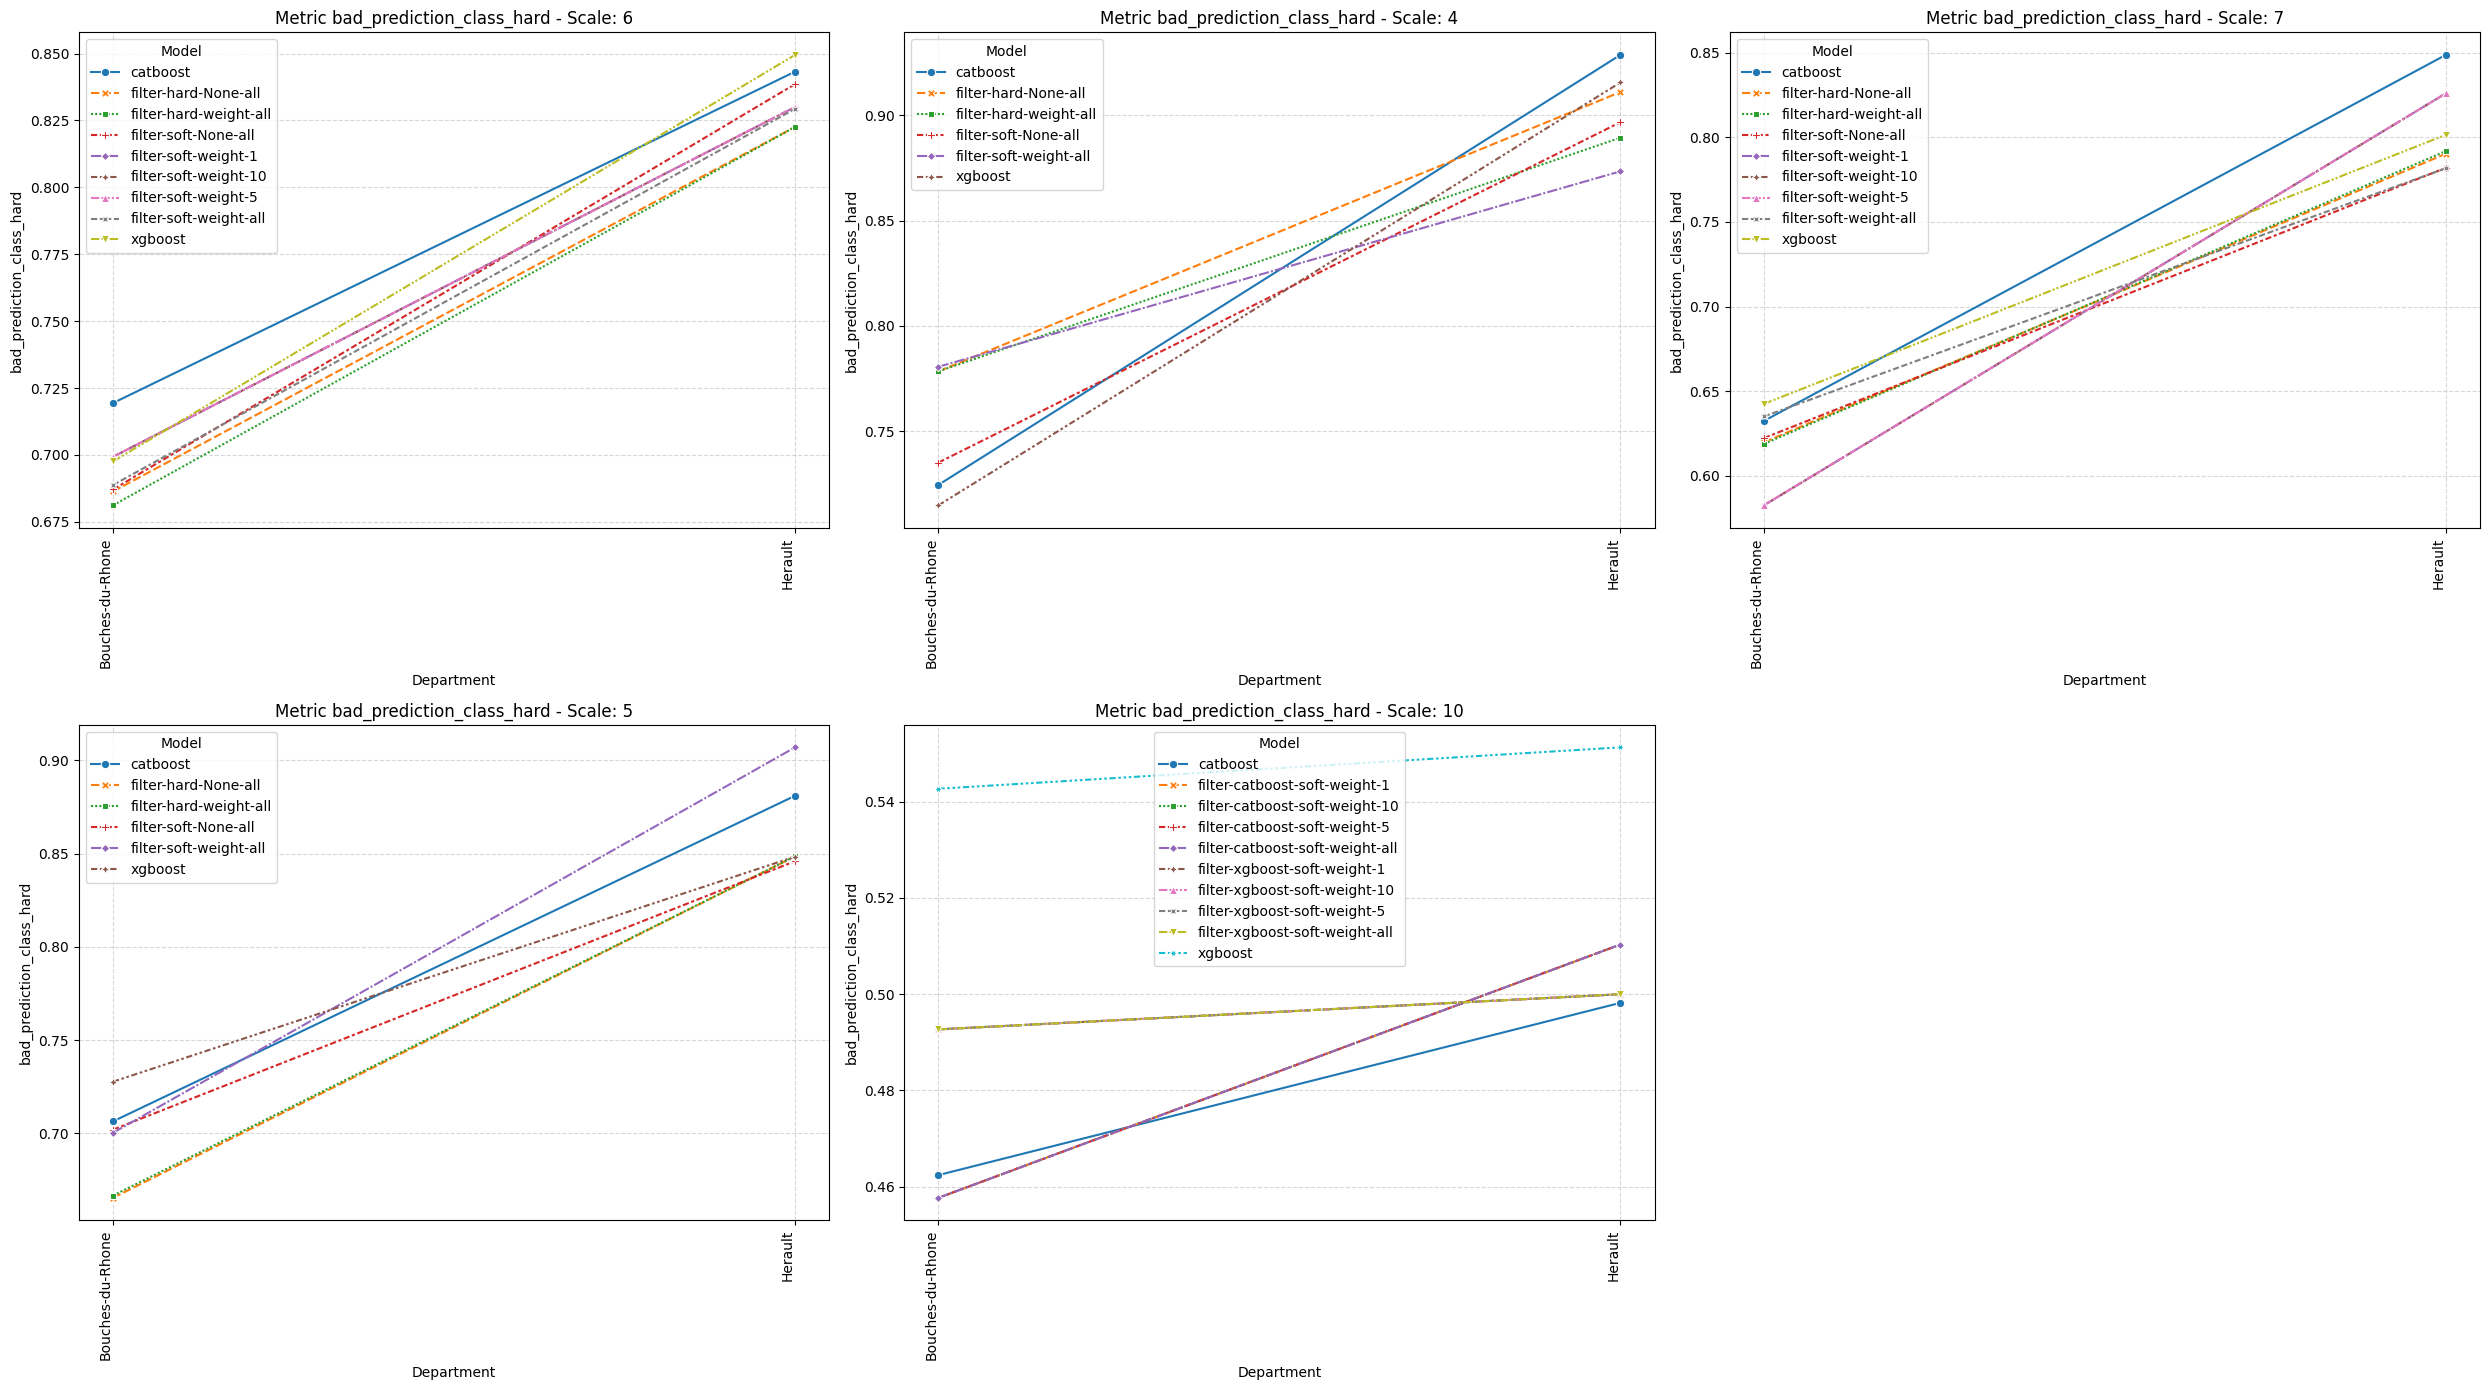

In [97]:
plot_result(df, 'bad_prediction_class_hard', 'bdiff_small')

In [98]:
import time

def prediction_kill():
    print("Prediction du nombre de kill de quentin")
    time.sleep(5)
    print("....")
    time.sleep(5)
    print("Found error no player name quentin, found la salope du jeu. Moyenne de kill : 2")

# Exécuter la fonction
prediction_kill()


Prediction du nombre de kill de quentin
....
Found error no player name quentin, found la salope du jeu. Moyenne de kill : 2


In [99]:
df.Model

0                             catboost
1                              xgboost
2                             catboost
3                              xgboost
4                             catboost
                     ...              
1744    filter-xgboost-soft-weight-all
1745      filter-xgboost-soft-weight-5
1746      filter-xgboost-soft-weight-1
1747                           xgboost
1748                          catboost
Name: Model, Length: 1749, dtype: object

In [100]:
df[df['Scale'] == 10].Model

32                             catboost
33                              xgboost
34                             catboost
35                              xgboost
100     filter-catboost-soft-weight-all
                     ...               
1744     filter-xgboost-soft-weight-all
1745       filter-xgboost-soft-weight-5
1746       filter-xgboost-soft-weight-1
1747                            xgboost
1748                           catboost
Name: Model, Length: 1231, dtype: object

In [101]:
df.Scale.unique()

array([ 6,  5,  4,  7, 10])

In [102]:
df[df['Scale'] == 7].iou_wildfire_detected_0_class_hard.unique()

array([0.54237288, 0.55932203, 0.51515152, 0.57575758, 0.62318841,
       0.44927536, 0.28571429, 0.81355932, 0.84745763, 0.72727273,
       0.75757576, 0.7826087 , 0.45714286, 0.94915254, 1.        ,
       0.97101449, 0.97142857, 0.82608696, 0.88405797, 0.84057971,
       0.54285714, 0.6       , 0.57142857,        nan, 0.81818182,
       0.96551724, 0.8       , 0.97619048, 0.96363636, 0.8125    ,
       0.        , 0.9375    , 0.96      , 0.58333333, 0.5       ,
       0.75      , 0.96721311, 0.71428571])

In [103]:
len(df), len(df.drop_duplicates()), df.Model.unique()

(1749,
 1749,
 array(['catboost', 'xgboost', 'filter-hard-None-all',
        'filter-soft-None-all', 'filter-hard-weight-all',
        'filter-soft-weight-all', 'filter-soft-weight-1',
        'filter-soft-weight-5', 'filter-soft-weight-10',
        'filter-catboost-soft-weight-all', 'filter-catboost-soft-weight-1',
        'filter-catboost-soft-weight-5', 'filter-catboost-soft-weight-10',
        'filter-xgboost-soft-weight-all', 'filter-xgboost-soft-weight-1',
        'filter-xgboost-soft-weight-5', 'filter-xgboost-soft-weight-10',
        'fwi-mean-[5, 10.5, 21.5, 34.5]-5',
        'filter-catboost-soft-departement-all',
        'filter-catboost-soft-graphid-all'], dtype=object))

In [104]:
df.Base.unique()

array(['risk-size-watershed', 'risk-regular', 'None'], dtype=object)

In [105]:
df.Scale.unique()

array([ 6,  5,  4,  7, 10])

In [106]:
# Exemple d'appel
metrics = [
    'iou_0_class_ez',
    #'bad_prediction_class_ez',
    'bad_prediction_local_0_class_ez',
    'iou_wildfire_detected_0_class_hard',
]

filters = {
    #'Loss_function': 'softmax',
    'Base': ['risk-size-watershed'],
    'Target': 'nbsinister-kmeans-5-Class-Dept',
    'Model': ['filter-soft-None-all']
}

group_by_cols = ['Base', 'Department', 'Scale']

df1 = df[(df['Scale'] == 10)]

# Appeler la fonction avec les paramètres
results = compute_metrics(df1, filters, metrics, group_by_cols)
results

{}

In [107]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score


def calculate_signal_scores(y_pred, y_true, y_fire, graph_id, saison):
    """
    Calcule les scores (aire commune, union, sous-prédiction, sur-prédiction) entre deux signaux.

    Args:
        t (np.array): Tableau de temps ou indices (axe x).
        y_pred (np.array): Signal prédiction (rouge).
        y_true (np.array): Signal vérité terrain (bleu).

    Returns:
        dict: Dictionnaire contenant les scores calculés.
    """

    y_true_fire = np.copy(y_true)

    ###################################### I. For the all signal ####################################
    # Calcul des différentes aires
    intersection = np.trapz(np.minimum(y_pred, y_true))  # Aire commune
    union = np.trapz(np.maximum(y_pred, y_true))         # Aire d'union

    over_prediction_zeros = np.trapz(np.maximum(0, y_pred[y_true == 0]))
    under_prediction_zeros = np.trapz(np.maximum(0, y_true[y_pred == 0]))

    mask_fire = (y_pred > 0) | (y_true_fire > 0)
    intersection_fire = np.trapz(np.minimum(y_pred[mask_fire], y_true_fire[mask_fire]))
    union_fire = np.trapz(np.maximum(y_pred[mask_fire], y_true_fire[mask_fire]))
    iou_wildfire_or_pred = intersection_fire / union_fire if union_fire > 0 else np.nan

    mask_fire = (y_pred > 0) & (y_true_fire > 0)
    intersection_fire = np.trapz(np.minimum(y_pred[mask_fire], y_true_fire[mask_fire]))
    union_fire = np.trapz(np.maximum(y_pred[mask_fire], y_true_fire[mask_fire]))
    iou_wildfire_and_pred = intersection_fire / union_fire if union_fire > 0 else np.nan

    # Limitation des signaux à un maximum de 1
    y_pred_clipped = np.clip(y_pred, 0, 1)  # Limiter y_pred à 1
    y_true_fire_clipped = np.clip(y_true_fire, 0, 1)  # Limiter y_true_fire à 1

    iou_wildfire_detected = recall_score(y_true_fire_clipped, y_pred_clipped)
    prec = precision_score(y_true_fire_clipped, y_pred_clipped)
    f1 = f1_score(y_true_fire_clipped, y_pred_clipped)
    acc = accuracy_score(y_true_fire_clipped, y_pred_clipped)

    y_pred_clipped_ytrue = np.copy(y_pred)
    y_pred_clipped_ytrue[(y_pred > 0) & (y_true > 0)] = np.minimum(y_true[(y_pred > 0) & (y_true > 0)], y_pred[(y_pred > 0) & (y_true > 0)])
    intersection_clipped = np.trapz(np.minimum(y_pred_clipped_ytrue, y_true))  # Aire commune
    union_clipped = np.trapz(np.maximum(y_pred_clipped_ytrue, y_true))         # Aire d'union
    iou_no_overestimation = intersection_clipped / union_clipped if union_clipped > 0 else np.nan

    dice_coefficient = 2 * intersection / (union + intersection) if union + intersection > 0 else np.nan

    # Enregistrement dans un dictionnaire
    scores = {
        "iou": intersection / union if union > 0 else np.nan,  # To avoid division by zero
        "iou_wildfire_or_pred": iou_wildfire_or_pred,
        "iou_wildfire_and_pred": iou_wildfire_and_pred,
        "iou_wildfire_detected": iou_wildfire_detected,
        "iou_no_overestimation" : iou_no_overestimation,
        'prec': prec,
        'f1': f1,
        'acc': acc,
        
        "over_bad_prediction" : over_prediction_zeros / union if union > 0 else np.nan,
        "under_bad_prediction" : under_prediction_zeros / union if union > 0 else np.nan,
        "bad_prediction" : (over_prediction_zeros + under_prediction_zeros) / union if union > 0 else np.nan,
        
        # Ajout du Dice coefficient
        "dice_coefficient": dice_coefficient
    }

    ###################################### I. For each graph_id ####################################
    unique_graph_ids = np.unique(graph_id)

    # Trier les graph_id en fonction de la somme de event_col
    graph_sums = {g_id: y_true[graph_id == g_id].sum() for g_id in unique_graph_ids}
    sorted_graph_ids = sorted(graph_sums, key=graph_sums.get, reverse=True)

    # Parcourir les graph_id triés
    for i, g_id in enumerate(sorted_graph_ids):
        mask = graph_id == g_id

        y_pred_graph = y_pred[mask]
        y_true_graph = y_true[mask]
        y_true_fire_graph = y_true_fire[mask]

        mask_fire_graph = (y_pred_graph > 0) | (y_true_fire_graph > 0)
        intersection_fire_graph = np.trapz(np.minimum(y_pred_graph[mask_fire_graph], y_true_fire_graph[mask_fire_graph]))
        union_fire_graph = np.trapz(np.maximum(y_pred_graph[mask_fire_graph], y_true_fire_graph[mask_fire_graph]))
        iou_wildfire_or_pred_graph = intersection_fire_graph / union_fire_graph if union_fire_graph > 0 else np.nan

        mask_fire_graph = (y_pred_graph > 0) & (y_true_fire_graph > 0)
        intersection_fire_graph = np.trapz(np.minimum(y_pred_graph[mask_fire_graph], y_true_fire_graph[mask_fire_graph]))
        union_fire_graph = np.trapz(np.maximum(y_pred_graph[mask_fire_graph], y_true_fire_graph[mask_fire_graph]))
        iou_wildfire_and_pred_graph = intersection_fire_graph / union_fire_graph if union_fire_graph > 0 else np.nan

        # Limitation des signaux à un maximum de 1
        y_pred_clipped = np.clip(y_pred[mask], 0, 1)  # Limiter y_pred à 1
        y_true_fire_clipped = np.clip(y_true_fire[mask], 0, 1)  # Limiter y_true_fire à 1

        iou_wildfire_detected = recall_score(y_true_fire_clipped, y_pred_clipped, zero_division=np.nan)
        prec = precision_score(y_true_fire_clipped, y_pred_clipped, zero_division=np.nan)

        y_pred_clipped_ytrue = np.copy(y_pred_graph)
        y_pred_clipped_ytrue[(y_pred_graph > 0) & (y_true_graph > 0)] = np.minimum(y_true_graph[(y_pred_graph > 0) & (y_true_graph > 0)], y_pred_graph[(y_pred_graph > 0) & (y_true_graph > 0)])
        intersection_clipped = np.trapz(np.minimum(y_pred_clipped_ytrue, y_true_graph))  # Aire commune
        union_clipped = np.trapz(np.maximum(y_pred_clipped_ytrue, y_true_graph))         # Aire d'union
        iou_no_overestimation = intersection_clipped / union_clipped if union_clipped > 0 else np.nan

        intersection_graph = np.trapz(np.minimum(y_pred_graph, y_true_graph))  # Aire commune
        union_graph = np.trapz(np.maximum(y_pred_graph, y_true_graph))         # Aire d'union

        under_prediction_graph = np.trapz(np.maximum(0, y_true_graph - y_pred_graph))
        over_prediction_graph = np.trapz(np.maximum(0, y_pred_graph - y_true_graph))

        over_prediction_zeros_graph = np.trapz(np.maximum(0, y_pred_graph[y_true_graph == 0]))
        under_prediction_zeros_graph = np.trapz(np.maximum(0, y_true_graph[y_pred_graph == 0]))

        under_prediction_fire_graph = np.trapz(np.maximum(0, y_true_graph[y_true_graph > 0] - y_pred_graph[y_true_graph > 0]))
        over_prediction_fire_graph = np.trapz(np.maximum(0, y_pred_graph[y_true_graph > 0] - y_true_graph[y_true_graph > 0]))

        only_true_value = np.trapz(y_true_graph)  # Aire sous la courbe des valeurs réelles
        only_pred_value = np.trapz(y_pred_graph)  # Aire sous la courbe des prédictions

        # Stocker les scores avec des clés utilisant uniquement l'indice
        graph_scores = {
            f"iou_wildfire_or_pred_{i}": iou_wildfire_or_pred_graph,
            f"iou_wildfire_and_pred_{i}": iou_wildfire_and_pred_graph,
            f"iou_no_overestimation_{i}": iou_no_overestimation,
            f"iou_{i}": intersection_graph / union_graph if union_graph > 0 else np.nan,  # Pour éviter la division par zéro
            f"iou_wildfire_detected_{i}": iou_wildfire_detected,

            # Ajout du Dice coefficient pour chaque itération
            f"dice_coefficient_{i}": 2 * intersection_graph / (union_graph + intersection_graph) if (union_graph + intersection_graph) > 0 else np.nan,

            f"over_bad_prediction_local_{i}": over_prediction_zeros_graph / union_graph if union_graph > 0 else np.nan,
            f"under_bad_prediction_local_{i}": under_prediction_zeros_graph / union_graph if union_graph > 0 else np.nan,
            f"bad_prediction_local_{i}": (over_prediction_zeros_graph + under_prediction_zeros_graph) / union_graph if union_graph > 0 else np.nan,

            f"over_bad_prediction_global_{i}": over_prediction_zeros_graph / union if union_graph > 0 else np.nan,
            f"under_bad_prediction_global_{i}": under_prediction_zeros_graph / union if union_graph > 0 else np.nan,
            f"bad_prediction_global_{i}": (over_prediction_zeros_graph + under_prediction_zeros_graph) / union if union_graph > 0 else np.nan,
        }

        scores.update(graph_scores)

    unique_seasons = np.unique(saison)

    # Trier les saisons en fonction de la somme de y_true
    season_sums = {s: y_true[saison == s].sum() for s in unique_seasons}
    sorted_seasons = sorted(season_sums, key=season_sums.get, reverse=True)

    # Parcourir les saisons triées
    for i, s in enumerate(sorted_seasons):
        mask = saison == s

        y_pred_season = y_pred[mask]
        y_true_season = y_true[mask]
        y_true_fire_season = y_true_fire[mask]

        mask_fire_season = (y_pred_season > 0) | (y_true_fire_season > 0)
        intersection_fire_season = np.trapz(np.minimum(y_pred_season[mask_fire_season], y_true_fire_season[mask_fire_season]))
        union_fire_season = np.trapz(np.maximum(y_pred_season[mask_fire_season], y_true_fire_season[mask_fire_season]))
        iou_wildfire_or_pred_season = intersection_fire_season / union_fire_season if union_fire_season > 0 else np.nan

        mask_fire_season = (y_pred_season > 0) & (y_true_fire_season > 0)
        intersection_fire_season = np.trapz(np.minimum(y_pred_season[mask_fire_season], y_true_fire_season[mask_fire_season]))
        union_fire_season = np.trapz(np.maximum(y_pred_season[mask_fire_season], y_true_fire_season[mask_fire_season]))
        iou_wildfire_and_pred_season = intersection_fire_season / union_fire_season if union_fire_season > 0 else np.nan

        # Limitation des signaux à un maximum de 1
        y_pred_clipped = np.clip(y_pred[mask], 0, 1)  # Limiter y_pred à 1
        y_true_fire_clipped = np.clip(y_true_fire[mask], 0, 1)  # Limiter y_true_fire à 1

        iou_wildfire_detected = recall_score(y_true_fire_clipped, y_pred_clipped, zero_division=np.nan)

        y_pred_clipped_ytrue = np.copy(y_pred_season)
        y_pred_clipped_ytrue[(y_pred_season > 0) & (y_true_season > 0)] = np.minimum(y_true_season[(y_pred_season > 0) & (y_true_season > 0)], y_pred_season[(y_pred_season > 0) & (y_true_season > 0)])
        intersection_clipped = np.trapz(np.minimum(y_pred_clipped_ytrue, y_true_season))  # Aire commune
        union_clipped = np.trapz(np.maximum(y_pred_clipped_ytrue, y_true_season))         # Aire d'union
        iou_no_overestimation = intersection_clipped / union_clipped if union_clipped > 0 else np.nan

        intersection_season = np.trapz(np.minimum(y_pred_season, y_true_season))  # Aire commune
        union_season = np.trapz(np.maximum(y_pred_season, y_true_season))         # Aire d'union

        over_prediction_zeros_season = np.trapz(np.maximum(0, y_pred_season[y_true_season == 0]))
        under_prediction_zeros_season = np.trapz(np.maximum(0, y_true_season[y_pred_season == 0]))

        # Stocker les scores avec des clés utilisant uniquement l'indice
        season_scores = {
            f"iou_wildfire_or_pred_{s}": iou_wildfire_or_pred_season,
            f"iou_wildfire_and_pred_{s}": iou_wildfire_and_pred_season,
            f"iou_no_overestimation_{s}": iou_no_overestimation,
            f"iou_{s}": intersection_season / union_season if union_season > 0 else np.nan,  # Pour éviter la division par zéro
            f"iou_wildfire_detected_{s}": iou_wildfire_detected,

            f"over_bad_prediction_local_{s}": over_prediction_zeros_season / union_season if union_season > 0 else np.nan,
            f"under_bad_prediction_local_{s}": under_prediction_zeros_season / union_season if union_season > 0 else np.nan,
            f"bad_prediction_local_{s}": (over_prediction_zeros_season + under_prediction_zeros_season) / union_season if union_season > 0 else np.nan,
            
            f"dice_coefficient_{s}": 2 * intersection_season / (union_season + intersection_season) if (union_season + intersection_season) > 0 else np.nan,

            f"over_bad_prediction_global_{s}": over_prediction_zeros_season / union if union_season > 0 else np.nan,
            f"under_bad_prediction_global_{s}": under_prediction_zeros_season / union if union_season > 0 else np.nan,
            f"bad_prediction_global_{s}": (over_prediction_zeros_season + under_prediction_zeros_season) / union if union_season > 0 else np.nan,
        }
        scores.update(season_scores)

    ###################################### For each graph_id in each season ####################################
    # Get unique seasons
    unique_seasons = np.unique(saison)

    # Iterate over seasons
    for season in unique_seasons:
        # Mask for the current season
        season_mask = saison == season

        # Iterate over graphs in this season
        for i, g_id in enumerate(sorted_graph_ids):
            # Mask for the current graph in the current season
            mask = (graph_id == g_id) & season_mask

            y_pred_graph_season = y_pred[mask]
            y_true_graph_season = y_true[mask]
            y_true_fire_graph_season = y_true_fire[mask]

            mask_fire_graph_season = (y_pred_graph_season > 0) | (y_true_fire_graph_season > 0)
            intersection_fire_graph_season = np.trapz(np.minimum(y_pred_graph_season[mask_fire_graph_season], y_true_fire_graph_season[mask_fire_graph_season]))
            union_fire_graph_season = np.trapz(np.maximum(y_pred_graph_season[mask_fire_graph_season], y_true_fire_graph_season[mask_fire_graph_season]))
            iou_wildfire_or_pred_graph_season = intersection_fire_graph_season / union_fire_graph_season if union_fire_graph_season > 0 else np.nan

            mask_fire_graph_season = (y_pred_graph_season > 0) & (y_true_fire_graph_season > 0)
            intersection_fire_graph_season = np.trapz(np.minimum(y_pred_graph_season[mask_fire_graph_season], y_true_fire_graph_season[mask_fire_graph_season]))
            union_fire_graph_season = np.trapz(np.maximum(y_pred_graph_season[mask_fire_graph_season], y_true_fire_graph_season[mask_fire_graph_season]))
            iou_wildfire_and_pred_graph_season = intersection_fire_graph_season / union_fire_graph_season if union_fire_graph_season > 0 else np.nan

            # Limitation des signaux à un maximum de 1
            y_pred_clipped = np.clip(y_pred[mask], 0, 1)  # Limiter y_pred à 1
            y_true_fire_clipped = np.clip(y_true_fire[mask], 0, 1)  # Limiter y_true_fire à 1

            iou_wildfire_detected = recall_score(y_true_fire_clipped, y_pred_clipped, zero_division=np.nan)

            y_pred_clipped_ytrue = np.copy(y_pred_graph_season)
            y_pred_clipped_ytrue[(y_pred_graph_season > 0) & (y_true_graph_season > 0)] = np.minimum(y_true_graph_season[(y_pred_graph_season > 0) & (y_true_graph_season > 0)], y_pred_graph_season[(y_pred_graph_season > 0) & (y_true_graph_season > 0)])
            intersection_clipped = np.trapz(np.minimum(y_pred_clipped_ytrue, y_true_graph_season))  # Aire commune
            union_clipped = np.trapz(np.maximum(y_pred_clipped_ytrue, y_true_graph_season))         # Aire d'union
            iou_no_overestimation = intersection_clipped / union_clipped if union_clipped > 0 else np.nan

            intersection_graph_season = np.trapz(np.minimum(y_pred_graph_season, y_true_graph_season))  # Common area
            union_graph_season = np.trapz(np.maximum(y_pred_graph_season, y_true_graph_season))         # Union area

            over_prediction_zeros_graph_season = np.trapz(np.maximum(0, y_pred_graph_season[y_true_graph_season == 0]))
            under_prediction_zeros_graph_season = np.trapz(np.maximum(0, y_true_graph_season[y_pred_graph_season == 0]))

            # Compute scores for the graph in this season
            graph_season_scores = {
                f"iou_wildfire_or_pred_graph_{i}_season_{season}": iou_wildfire_or_pred_graph_season,
                f"iou_wildfire_and_pred_graph_{i}_season_{season}": iou_wildfire_and_pred_graph_season,
                f"iou_no_overestimation_graph_{i}_season_{season}": iou_no_overestimation,
                f"iou_graph_{i}_season_{season}": intersection_graph_season / union_graph_season if union_graph_season > 0 else np.nan,
                f"iou_wildfire_detected_graph_{i}_season_{season}": iou_wildfire_detected,
                
                f"dice_coefficient_graph_{i}_season_{season}": 2 * intersection_graph_season / (union_graph_season + intersection_graph_season) if (union_graph_season + intersection_graph_season) > 0 else np.nan,

                f"over_bad_prediction_local_graph_{i}_season_{season}": over_prediction_zeros_graph_season / union_graph_season if union_graph_season > 0 else np.nan,
                f"under_bad_prediction_local_graph_{i}_season_{season}": under_prediction_zeros_graph_season / union_graph_season if union_graph_season > 0 else np.nan,
                f"bad_prediction_local_graph_{i}_season_{season}": (over_prediction_zeros_graph_season + under_prediction_zeros_graph_season) / union_graph_season if union_graph_season > 0 else np.nan,
            }

            # Update global scores dictionary
            scores.update(graph_season_scores)

    # Parcourir les valeurs uniques de y_true
    for unique_value in np.unique(y_true[y_true > 0]):
        # Créer un masque pour sélectionner les éléments correspondant à la valeur unique
        mask = (y_true == unique_value) | (y_pred == unique_value)

        y_pred_sample = y_pred[mask]
        y_true_sample = y_true[mask]
        y_true_fire_sample = y_true_fire[mask]

        if y_pred_sample.shape[0] == 0:
            continue

        if y_pred_sample.shape[0] == 1:
            y_pred_sample = np.concatenate((y_pred_sample, y_pred_sample))
            y_true_sample = np.concatenate((y_true_sample, y_true_sample))
            y_true_fire_sample = np.concatenate((y_true_fire_sample, y_true_fire_sample))

        mask_fire_sample = (y_pred_sample > 0) | (y_true_fire_sample > 0)
        intersection_fire_sample = np.trapz(np.minimum(y_pred_sample[mask_fire_sample], y_true_fire_sample[mask_fire_sample]))
        union_fire_sample = np.trapz(np.maximum(y_pred_sample[mask_fire_sample], y_true_fire_sample[mask_fire_sample]))
        iou_wildfire_or_pred_sample = intersection_fire_sample / union_fire_sample if union_fire_sample > 0 else np.nan

        mask_fire_sample = (y_pred_sample > 0) & (y_true_fire_sample > 0)
        intersection_fire_sample = np.trapz(np.minimum(y_pred_sample[mask_fire_sample], y_true_fire_sample[mask_fire_sample]))
        union_fire_sample = np.trapz(np.maximum(y_pred_sample[mask_fire_sample], y_true_fire_sample[mask_fire_sample]))
        iou_wildfire_and_pred_sample = intersection_fire_sample / union_fire_sample if union_fire_sample > 0 else np.nan

        # Limitation des signaux à un maximum de 1
        y_pred_clipped = np.clip(y_pred_sample, 0, 1)  # Limiter y_pred à 1
        y_true_fire_clipped = np.clip(y_true_fire_sample, 0, 1)  # Limiter y_true_fire à 1

        # Calcul de la métrique IOU
        #iou_wildfire_detected = intersection_fire_detected / union_fire_detected if union_fire_detected > 0 else np.nan
        iou_wildfire_detected = recall_score(y_true_fire_clipped, y_pred_clipped, zero_division=np.nan)

        y_pred_clipped_ytrue = np.copy(y_pred_sample)
        y_pred_clipped_ytrue[(y_pred_sample > 0) & (y_true_sample > 0)] = np.minimum(y_true_sample[(y_pred_sample > 0) & (y_true_sample > 0)], y_pred_sample[(y_pred_sample > 0) & (y_true_sample > 0)])
        intersection_clipped = np.trapz(np.minimum(y_pred_clipped_ytrue, y_true_sample))  # Aire commune
        union_clipped = np.trapz(np.maximum(y_pred_clipped_ytrue, y_true_sample))         # Aire d'union
        iou_no_overestimation = intersection_clipped / union_clipped if union_clipped > 0 else np.nan

        # Calculer les aires
        intersection = np.trapz(np.minimum(y_pred_sample, y_true_sample))  # Aire commune
        union = np.trapz(np.maximum(y_pred_sample, y_true_sample))        # Aire d'union

        under_prediction = np.trapz(np.maximum(0, y_true_sample - y_pred_sample))
        over_prediction = np.trapz(np.maximum(0, y_pred_sample - y_true_sample))

        over_prediction_zeros = np.trapz(np.maximum(0, y_pred_sample[y_true_sample == 0]))
        under_prediction_zeros = np.trapz(np.maximum(0, y_true_sample[y_pred_sample == 0]))

        under_prediction_fire = np.trapz(
            np.maximum(0, y_true_sample[y_true_sample > 0] - y_pred_sample[y_true_sample > 0])
        )
        over_prediction_fire = np.trapz(
            np.maximum(0, y_pred_sample[y_true_sample > 0] - y_true_sample[y_true_sample > 0])
        )

        # Enregistrement dans un dictionnaire
        scores_elt = {            
            f"iou_elt_{unique_value}": intersection / union if union > 0 else np.nan,  # Éviter la division par zéro
            f"iou_wildfire_detected_elt_{unique_value}": iou_wildfire_detected,
            f"iou_wildfire_or_pred_elt_{unique_value}": iou_wildfire_or_pred_sample,
            f"iou_wildfire_and_pred_elt_{unique_value}": iou_wildfire_and_pred_sample,
            f"iou_no_overestimation_elt_{unique_value}": iou_no_overestimation,

            f"dice_coefficient_elt_{unique_value}": 2 * intersection / (union + intersection) if (union + intersection) > 0 else np.nan,

            f"over_bad_prediction_elt_{unique_value}": over_prediction_zeros / union if union > 0 else np.nan,
            f"under_bad_prediction_elt_{unique_value}": under_prediction_zeros / union if union > 0 else np.nan,
            f"bad_prediction_elt_{unique_value}": (over_prediction_zeros + under_prediction_zeros) / union if union > 0 else np.nan,
        }

        # Ajouter les scores pour cette valeur unique à la collection globale
        scores.update(scores_elt)

    return scores

departement_index = 3
id_index = 0
graph_id_index = 1
date_index = 4

import datetime as dt
def find_dates_between(start, end):
    start_date = dt.datetime.strptime(start, '%Y-%m-%d').date()
    end_date = dt.datetime.strptime(end, '%Y-%m-%d').date()

    delta = dt.timedelta(days=1)
    date = start_date
    res = []
    while date < end_date:
            res.append(date.strftime("%Y-%m-%d"))
            date += delta
    return res

allDates = find_dates_between('2017-06-12', '2024-06-29')

def iou_vis(ypred, y, band, dir_output, col_for_dict):
    dept = np.unique(y[:, departement_index])
    classes = np.unique(y[:, -3])
    colors = plt.cm.get_cmap('jet', 5)

    ytrue = y[:, band]
    for d in dept:

        mask = np.argwhere(y[:, departement_index] == d)[:, 0]
        maxi = max(np.nanmax(ypred[mask]), np.nanmax(ytrue[mask]))
        mini = min(np.nanmin(ypred[mask]), np.nanmin(ytrue[mask]))
        ids = np.unique(y[mask, graph_id_index])
        
        if ids.shape[0] == 1:
            fig, ax = plt.subplots(ids.shape[0], figsize=(20, 5))

            # Plot prediction and ground truth
            ax.plot(ypred[mask], color='red', label='Prediction')
            ax.plot(ytrue[mask], color='blue', label='Ground Truth')
            ax.fill_between(np.arange(len(mask)), np.minimum(ypred[mask], ytrue[mask]), color='purple', alpha=0.3, label='Intersection')
            ax.fill_between(np.arange(len(mask)), ytrue[mask], ypred[mask], where=(ytrue[mask] > ypred[mask]), color='blue', alpha=0.3, label='Under prediction')
            ax.fill_between(np.arange(len(mask)), ypred[mask], ytrue[mask], where=(ypred[mask] > ytrue[mask]), color='red', alpha=0.3, label='Over prediction')

            # Set x-ticks to correspond to allDates
            index_tick = np.asarray(np.arange(0, y[mask2].shape[0],30).astype(int).reshape(-1), dtype=int)
            ax.set_xticks(index_tick)
            date_ticks = [allDates[int(date)] for date in y[mask2][index_tick][:, date_index]]
            ax.set_xticklabels(date_ticks, rotation=45, ha="right")

            ax.set_ylim(ymin=mini, ymax=maxi)
            ax.set_xlabel('Date')
            ax.set_ylabel('Class')

        else:
            fig, ax = plt.subplots(ids.shape[0], figsize=(50, 50))
            for i, id in enumerate(ids):
                mask2 = np.argwhere(y[:, graph_id_index] == id)[:, 0]
                unode = np.unique(y[mask2, id_index])
                mask2 = np.argwhere(y[:, id_index] == unode[0])[:, 0]
                
                # Visualisation
                ax[i].plot(ypred[mask2], color='red', label='Prediction')
                ax[i].plot(ytrue[mask2], color='blue', label='Ground Truth')
                ax[i].fill_between(np.arange(len(mask2)), np.minimum(ypred[mask2], ytrue[mask2]), color='purple', alpha=0.3, label='Intersection')
                ax[i].fill_between(np.arange(len(mask2)), ytrue[mask2], ypred[mask2], where=(ytrue[mask2] > ypred[mask2]), color='blue', alpha=0.3, label='Under prediction')
                ax[i].fill_between(np.arange(len(mask2)), ypred[mask2], ytrue[mask2], where=(ypred[mask2] > ytrue[mask2]), color='red', alpha=0.3, label='Over prediction')

                # Set x-ticks to correspond to allDates
                index_tick = np.asarray(np.arange(0, y[mask2].shape[0],30).astype(int).reshape(-1), dtype=int)
                ax[i].set_xticks(index_tick)
                date_ticks = [allDates[int(date)] for date in y[mask2][index_tick][:, date_index]]
                ax[i].set_xticklabels(date_ticks, rotation=45, ha="right")

                ax[i].set_title(f'{id}')
                fire_mask = np.argwhere(y[mask2,-2] > 0)[:,0]
                ax[i].set_ylim(ymin=mini, ymax=maxi)

        plt.legend()
        plt.savefig(dir_output / f'iou_{col_for_dict}.png')


In [108]:
f'{model}_full_0_all_departement_0_None_node_z-score_Catboost_departement-13-bouches-du-rhone_pred.pkl'

NameError: name 'model' is not defined

In [ ]:
y_pred = df1['prediction_nbsinister-kmeans-5-Class-Dept'].values
y_true_fire =  df1['nbsinister-kmeans-5-Class-Dept'].values

y_pred_clipped = np.clip(y_pred, 0, 1)  # Limiter y_pred à 1
y_true_fire_clipped = np.clip(y_true_fire, 0, 1)  # Limiter y_true_fire à 1

recall_score(y_true_fire_clipped, y_pred_clipped)

In [ ]:
scores = calculate_signal_scores(y_pred, y_true_fire, df1['nbsinister'].values, df1['graph_id'].values, df1['saison'].values)

In [ ]:
scores['iou_wildfire_detected'], scores['prec'], scores['f1'], scores['acc']

In [ ]:
df_test['date']

In [923]:
df_test = df_test[df_test['graph_id'] == 0.0]

In [ ]:
date_index = 4

ori_compare = df_test['prediction_nbsinister-kmeans-5-Class-Dept'].values

date_index = 4
y_pred_to_compare = np.copy(ori_compare)
mask_unknowed_sample = (df_test['nbsinister-kmeans-5-Class-Dept'] == 0) & (df_test['nbsinister-kmeans-5-Class-Dept-laplace+mean-Specialized'] > 0)
y_pred_to_compare[mask_unknowed_sample] = 0

y_true_temp = np.ones((ori_compare.shape[0], 9))
y_true_temp[:, graph_id_index] = df_test['graph_id']
y_true_temp[:, id_index] = df_test['graph_id']
y_true_temp[:, departement_index] = df_test['departement']
y_true_temp[:, date_index] = df_test['date']
y_true_temp[:, -1] = df_test['nbsinister-kmeans-5-Class-Dept']
y_true_temp[:, -2] = df_test['nbsinister']
y_true_temp[:, -3] = 0

iou_vis(ori_compare, y_true_temp, -1, Path('./'), 'outut.png')

In [ ]:
df_test['date']

In [ ]:
date_index = 4
y_pred_to_compare = np.copy(ori_compare)
mask_unknowed_sample = (df_test['nbsinister-kmeans-5-Class-Dept'] == 0) & (df_test['nbsinister-kmeans-5-Class-Dept-laplace+mean-Specialized'] > 0)
y_pred_to_compare[mask_unknowed_sample] = 0

y_true_temp = np.ones((ori_compare.shape[0], 9))
y_true_temp[:, graph_id_index] = df_test['graph_id']
y_true_temp[:, id_index] = df_test['graph_id']
y_true_temp[:, departement_index] = df_test['departement']
y_true_temp[:, date_index] = df_test['date']
y_true_temp[:, -1] = df_test['nbsinister-kmeans-5-Class-Dept']
y_true_temp[:, -2] = df_test['nbsinister']
y_true_temp[:, -3] = 0

iou_vis(y_pred_to_compare, y_true_temp, -1, Path('./'), 'outut.png')

In [ ]:
intersection = np.trapz(np.minimum(y_pred, y_true_fire))  # Aire commune
union = np.trapz(np.maximum(y_pred, y_true_fire))         #

intersection / union

In [ ]:
df1.saison

In [ ]:
df[(df['Department'] == 'departement-13-bouches-du-rhone') & (df['Scale'] == 7) & (df['Target'] == 'nbsinister-kmeans-5-Class-Dept') & (df['Loss_function'] == 'softmax') & (df['Model'] == 'xgboost')].iou_wildfire_detected_class_hard

In [ ]:
results = {}

df_1 = df[((df['Loss_function'] == 'softmax') & (df['Scale'] != 10)) & (df['Target'] == 'nbsinister-kmeans-5-Class-Dept')].copy(deep=True)


metrics = [

    'iou_0_class_hard', 'iou_1_class_hard', 'iou_2_class_hard', 'iou_3_class_hard',
    'bad_prediction_local_0_class_hard', 'bad_prediction_local_1_class_hard', 'bad_prediction_local_2_class_hard', 'bad_prediction_local_3_class_hard',
    'iou_wildfire_detected_0_class_hard', 'iou_wildfire_detected_1_class_hard', 'iou_wildfire_detected_2_class_hard', 'iou_wildfire_detected_3_class_hard',

    'iou_elt_1_class_hard', 'iou_elt_2_class_hard',
    'iou_elt_3_class_hard', 'iou_elt_4_class_hard',
    'bad_prediction_elt_1_class_hard', 'bad_prediction_elt_2_class_hard',
    'bad_prediction_elt_3_class_hard',
    'bad_prediction_elt_4_class_hard',
    'iou_wildfire_detected_elt_1_class_hard', 'iou_wildfire_detected_elt_2_class_hard', 
    'iou_wildfire_detected_elt_3_class_hard', 'iou_wildfire_detected_elt_4_class_hard',

    'iou_high_class_hard', 'iou_medium_class_hard',
    'bad_prediction_local_high_class_hard', 'bad_prediction_local_medium_class_hard',
    'iou_wildfire_detected_high_class_hard', 'iou_wildfire_detected_medium_class_hard',
]

group_by_cols = ['Model', 'Target']

results = compute_metrics(df, filters, metrics, group_by_cols)
results

In [ ]:
sa  ilk

In [ ]:
np.arange(0.1, 1, 0.05)

In [31]:
#Finish

In [ ]:
df_1.Target.unique()

### Figure

In [33]:
#df_1 = df[(df['Model'] == 'xgboost') & (df['weight'] == 'one') & (df['Target'] == 'nbsinister-kmeans-5-Class-Dept-laplace+mean-Specialized') & (df['Number_of_samples'] == 'percentage-0.8')].reset_index(drop=True)
#df_1 = df[(df['Model'] == 'xgboost') & (df['weight'] == 'one') & (df['Target'] == 'nbsinister-kmeans-5-Class-Dept') & (df['Number_of_samples'] == 'percentage-0.3')].reset_index(drop=True)
#df_1 = df[(df['Model'] == 'xgboost') & (df['weight'] == 'one') & (df['Loss_function'] == 'softmax')].reset_index(drop=True)
df_1 = df[(df['Model'] == 'xgboost') & (df['weight'] == 'one') & (df['Loss_function'] == 'weighted')].reset_index(drop=True)

In [ ]:
# Define markers for each department
dept_markers = {
    4: 'o',   # Circle
    5: 's',   # Square
    6: 'D',   # Diamond
    7: '^',   # Triangle up
    10: 'v',  # Triangle down
}


metrics =  ['iou_class', 'bad_prediction_class', 'iou_wildfire_or_pred_class', 'iou_wildfire_and_pred_class', 'iou_wildfire_detected_class']
df_1.replace({'nbsinister-kmeans-5-Class-Dept': 'Raw'}, inplace=True)
df_1.replace({'nbsinister-kmeans-5-Class-Dept-laplace+mean-Specialized': 'laplace+mean'}, inplace=True)

compare_models3(df_1, departement_list, dept_markers, metrics, 'Target', 'Scale', Path('./'), '1')
#compare_models2(df, departement_list, dept_markers, metrics, '7', 'kmeans_thresh', Path('./'), '1')
#compare_models2(df, departement_list, dept_markers, metrics, 'Departement', 'kmeans_thresh', Path('./'), '1')

In [ ]:
metrics =  ['iou_wildfire_or_pred_elt_1_class', 'iou_wildfire_or_pred_elt_2_class', 'iou_wildfire_or_pred_elt_3_class', 'iou_wildfire_or_pred_elt_4_class']

compare_models3(df_1, departement_list, dept_markers, metrics, 'Target', 'Scale', Path('./'), '1')

In [ ]:
metrics =  ['iou_elt_1_class', 'iou_elt_2_class', 'iou_elt_3_class', 'iou_elt_4_class']

compare_models3(df_1, departement_list, dept_markers, metrics, 'Target', 'Scale', Path('./'), '1')

In [ ]:
df_1 = df[(df['Number_of_samples'] == 'binary') & (df['Model'] == 'xgboost') & (df['Target'] == 'nbsinister-kmeans-5-Class-Dept-both')].reset_index(drop=True)

metrics =  ['iou_class', 'bad_prediction_class', 'iou_wildfire_or_pred_class', 'iou_wildfire_and_pred_class', 'iou_wildfire_detected_class', 'accuracy']

compare_models3(df_1, departement_list, dept_markers, metrics, 'weight', 'Scale', Path('./'), '1')
#compare_models2(df, departement_list, dept_markers, metrics, '7', 'kmeans_thresh', Path('./'), '1')
#compare_models2(df, departement_list, dept_markers, metrics, 'Departement', 'kmeans_thresh', Path('./'), '1')

In [ ]:
df_1 = df[(df['Target'] == 'nbsinister-kmeans-5-Class-Dept-both') & (df['weight'] == 'one')].reset_index(drop=True)

metrics =  ['iou_class', 'bad_prediction_class', 'iou_wildfire_or_pred_class', 'iou_wildfire_and_pred_class', 'iou_wildfire_detected_class']

compare_models3(df_1, departement_list, dept_markers, metrics, 'Model', 'Scale', Path('./'), '1')
#compare_models2(df, departement_list, dept_markers, metrics, '7', 'kmeans_thresh', Path('./'), '1')
#compare_models2(df, departement_list, dept_markers, metrics, 'Departement', 'kmeans_thresh', Path('./'), '1')

In [ ]:
results = {}

for department in df['Department'].unique():
    results[department] = {
        'mean_metrique_by_target': {},
        'max_metrique_by_target': {}
    }
    for target in df[df['Department'] == department].Model.unique():
        mean_value = round(df[(df['Department'] == department) & (df['Model'] == target)]['iou_class'].mean(), 2)
        #max_value = round(df[(df['Department'] == department) & (df['Target'] == target)]['iou_wildfire_graph_0_season_high_class'].max(), 2)

        results[department]['mean_metrique_by_target'][target] = mean_value
        #results[department]['max_metrique_by_target'][target] = max_value

results


In [ ]:
metrics =  ['bad_prediction_elt_1_class', 'bad_prediction_elt_2_class', 'bad_prediction_elt_3_class', 'bad_prediction_elt_4_class']

compare_models3(df_1, departement_list, dept_markers, metrics, 'Model', 'Scale', Path('./'), '1')

In [ ]:
df_1 = df[(df['Model'] == 'xgboost') & (df['Target'] == 'nbsinister-kmeans-5-Class-Dept-both') & (df['weight'] == 'one')].reset_index(drop=True)

metrics =  ['iou_class', 'bad_prediction_class', 'iou_wildfire_or_pred_class', 'iou_wildfire_and_pred_class', 'iou_wildfire_detected_class', 'accuracy']

compare_models3(df_1, departement_list, dept_markers, metrics, 'Number_of_samples', 'Scale', Path('./'), '1')

In [68]:
def transform_dataframe_graph(df, additional_columns, val_name, id_prefix, id_suffix='_class'):
    
    columns = list(df.columns)

    # Extraire les indices numériques à partir des colonnes (ex: 'met_0_class' -> '0')
    pattern = rf'^{id_prefix}(\d+){id_suffix}$'  # Exemple : 'met_(\d+)_class'
    columns = [item for item in columns if pd.Series(item).str.contains(pattern).any()]
    ids = [col.split('_')[1] for col in columns]
    transformed_data = []
    additional_columns = additional_columns or []

    # Parcourir chaque colonne qui correspond au pattern et extraire les informations
    for col in df.columns:
        # Si la colonne correspond au motif 'iou_<index>_class'
        if pd.Series(col).str.contains(pattern).any():
            # Extraire l'indice du 'graph' (le chiffre au milieu)
            graph_value = int(col.split('_')[-2])  # Extrait le chiffre entre 'iou_' et '_class'
            print(col)
            # Ajouter la colonne 'iou' pour cette colonne dans le DataFrame
            for additional_col in additional_columns:
                df[additional_col] = df[additional_col]  # Conserver les autres colonnes inchangées
            # Ajouter les données transformées
            for idx in range(len(df)):
                transformed_data.append({
                    'ID': graph_value,
                    val_name: df[col].iloc[idx],
                    **{additional_col: df[additional_col].iloc[idx] for additional_col in additional_columns}
                })
    
    # Convertir les données transformées en DataFrame
    df_transformed = pd.DataFrame(transformed_data).sort_values(by='ID').reset_index(drop=True)

    return df_transformed

def transform_dataframe_season(df, additional_columns, val_name, id_prefix, id_suffix='_class'):
    
    columns = list(df.columns)

    # Extraire les indices numériques à partir des colonnes (ex: 'met_0_class' -> '0')
    pattern = rf'^{id_prefix}(high|medium){id_suffix}$'
    columns = [item for item in columns if pd.Series(item).str.contains(pattern).any()]
    ids = [col.split('_')[1] for col in columns]
    transformed_data = []
    additional_columns = additional_columns or []

    # Parcourir chaque colonne qui correspond au pattern et extraire les informations
    for col in df.columns:
        # Si la colonne correspond au motif 'iou_<index>_class'
        if pd.Series(col).str.contains(pattern).any():
            # Extraire l'indice du 'graph' (le chiffre au milieu)
            graph_value = (col.split('_')[-2])  # Extrait le chiffre entre 'iou_' et '_class'
            
            # Ajouter la colonne 'iou' pour cette colonne dans le DataFrame
            for additional_col in additional_columns:
                df[additional_col] = df[additional_col]  # Conserver les autres colonnes inchangées
            # Ajouter les données transformées
            for idx in range(len(df)):
                transformed_data.append({
                    'ID': graph_value,
                    val_name: df[col].iloc[idx],
                    **{additional_col: df[additional_col].iloc[idx] for additional_col in additional_columns}
                })
    
    # Convertir les données transformées en DataFrame
    df_transformed = pd.DataFrame(transformed_data).sort_values(by='ID').reset_index(drop=True)

    return df_transformed

def transform_dataframe_graph_and_season(df, additional_columns, val_name, id_prefix, id_suffix='_class'):
    
    columns = list(df.columns)

    # Extraire les indices numériques à partir des colonnes (ex: 'met_0_class' -> '0')
    pattern = rf'^{id_prefix}graph_(\d+)_season_high{id_suffix}$'  # Exemple : 'met_(\d+)_class'
    columns = [item for item in columns if pd.Series(item).str.contains(pattern).any()]
    transformed_data = []
    additional_columns = additional_columns or []

    # Parcourir chaque colonne qui correspond au pattern et extraire les informations
    for col in df.columns:
        # Si la colonne correspond au motif 'iou_<index>_class'
        if pd.Series(col).str.contains(pattern).any():
            # Extraire l'indice du 'graph' (le chiffre au milieu)
            graph_value = f"{col.split('_')[-4]}_{col.split('_')[-2]}"
            
            # Ajouter la colonne 'iou' pour cette colonne dans le DataFrame
            for additional_col in additional_columns:
                df[additional_col] = df[additional_col]  # Conserver les autres colonnes inchangées
            # Ajouter les données transformées
            for idx in range(len(df)):
                transformed_data.append({
                    'ID': graph_value,
                    val_name: df[col].iloc[idx],
                    **{additional_col: df[additional_col].iloc[idx] for additional_col in additional_columns}
                })
    
    # Convertir les données transformées en DataFrame
    df_transformed = pd.DataFrame(transformed_data).sort_values(by='ID').reset_index(drop=True)

    return df_transformed

In [ ]:
columns = [
    'Department',
    'Model',
    'Target',
    'Task_type',
    'Loss_function',
    'Number_of_samples',
    'kdays',
    'Number_of_features',
    'Scale',
    'Base',
    'Method',
    'Days_in_futur',
    'weight',
    'kmeans_thresh',
    'kmeans_shift'
]

df_1 = df[(df['Number_of_samples'] == 'binary') & (df['Target'] == 'nbsinister-kmeans-5-Class-Dept-both') & (df['weight'] == 'one') & (df['Model'] == 'xgboost')].reset_index(drop=True)

metrics =  ['iou_class', 'bad_prediction_class', 'iou_wildfire_or_pred_class', 'iou_wildfire_and_pred_class', 'iou_wildfire_detected_class', 'iou_no_overestimation_class']

df2 = transform_dataframe_graph(df_1, columns, val_name='iou_class', id_prefix='iou_', id_suffix='_class')
df3 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_detected_class', id_prefix='iou_wildfire_detected_', id_suffix='_class')
df4 = transform_dataframe_graph(df_1, columns, val_name='bad_prediction_class', id_prefix='bad_prediction_local_', id_suffix='_class')
df5 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_or_pred_class', id_prefix='iou_wildfire_or_pred_', id_suffix='_class')
df6 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_and_pred_class', id_prefix='iou_wildfire_and_pred_', id_suffix='_class')
df7 = transform_dataframe_graph(df_1, columns, val_name='iou_no_overestimation_class', id_prefix='iou_no_overestimation_', id_suffix='_class')


df2 = df2.set_index(columns + ['ID']).join(df3.set_index(columns + ['ID'])['iou_wildfire_detected_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df4.set_index(columns + ['ID'])['bad_prediction_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df5.set_index(columns + ['ID'])['iou_wildfire_or_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df6.set_index(columns + ['ID'])['iou_wildfire_and_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df7.set_index(columns + ['ID'])['iou_no_overestimation_class'], on=columns+['ID']).reset_index()

df2.dropna(inplace=True)
df2.drop_duplicates(inplace=True)
compare_models3(df2, departement_list, dept_markers, metrics, col_to_analyse='ID', scale_col='Scale', dir_output=Path('.'), suffix='example')

In [ ]:
df_1 = df[(df['Number_of_samples'] == 'binary') & (df['Model'] == 'xgboost') & (df['Target'] == 'nbsinister-kmeans-5-Class-Dept-both') & (df['weight'] == 'one')].reset_index(drop=True)

metrics =  ['iou_class', 'bad_prediction_class', 'iou_wildfire_or_pred_class', 'iou_wildfire_and_pred_class', 'iou_wildfire_detected_class', 'iou_no_overestimation_class']

df2 = transform_dataframe_graph(df_1, columns, val_name='iou_class', id_prefix='iou_elt_', id_suffix='_class')
df3 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_detected_class', id_prefix='iou_wildfire_detected_elt_', id_suffix='_class')
df4 = transform_dataframe_graph(df_1, columns, val_name='bad_prediction_class', id_prefix='bad_prediction_elt_', id_suffix='_class')
df5 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_or_pred_class', id_prefix='iou_wildfire_or_pred_elt_', id_suffix='_class')
df6 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_and_pred_class', id_prefix='iou_wildfire_and_pred_elt_', id_suffix='_class')
df7 = transform_dataframe_graph(df_1, columns, val_name='iou_no_overestimation_class', id_prefix='iou_no_overestimation_elt_', id_suffix='_class')


df2 = df2.set_index(columns + ['ID']).join(df3.set_index(columns + ['ID'])['iou_wildfire_detected_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df4.set_index(columns + ['ID'])['bad_prediction_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df5.set_index(columns + ['ID'])['iou_wildfire_or_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df6.set_index(columns + ['ID'])['iou_wildfire_and_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df7.set_index(columns + ['ID'])['iou_no_overestimation_class'], on=columns+['ID']).reset_index()

df2.dropna(inplace=True)
df2.drop_duplicates(inplace=True)
compare_models3(df2, departement_list, dept_markers, metrics, col_to_analyse='ID', scale_col='Scale', dir_output=Path('.'), suffix='example')

In [ ]:
df_1 = df[(df['Number_of_samples'] == 'binary') & (df['Model'] == 'Dual-xgboost') & (df['Target'] == 'nbsinister-kmeans-5-Class-Dept-both') & (df['weight'] == 'one')].reset_index(drop=True)

metrics =  ['iou_class', 'bad_prediction_class', 'iou_wildfire_or_pred_class', 'iou_wildfire_and_pred_class', 'iou_wildfire_detected_class', 'iou_no_overestimation_class']

df2 = transform_dataframe_graph(df_1, columns, val_name='iou_class', id_prefix='iou_elt_', id_suffix='_class')
df3 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_detected_class', id_prefix='iou_wildfire_detected_elt_', id_suffix='_class')
df4 = transform_dataframe_graph(df_1, columns, val_name='bad_prediction_class', id_prefix='bad_prediction_elt_', id_suffix='_class')
df5 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_or_pred_class', id_prefix='iou_wildfire_or_pred_elt_', id_suffix='_class')
df6 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_and_pred_class', id_prefix='iou_wildfire_and_pred_elt_', id_suffix='_class')
df7 = transform_dataframe_graph(df_1, columns, val_name='iou_no_overestimation_class', id_prefix='iou_no_overestimation_elt_', id_suffix='_class')


df2 = df2.set_index(columns + ['ID']).join(df3.set_index(columns + ['ID'])['iou_wildfire_detected_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df4.set_index(columns + ['ID'])['bad_prediction_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df5.set_index(columns + ['ID'])['iou_wildfire_or_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df6.set_index(columns + ['ID'])['iou_wildfire_and_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df7.set_index(columns + ['ID'])['iou_no_overestimation_class'], on=columns+['ID']).reset_index()

df2.dropna(inplace=True)
df2.drop_duplicates(inplace=True)
compare_models3(df2, departement_list, dept_markers, metrics, col_to_analyse='ID', scale_col='Scale', dir_output=Path('.'), suffix='example')

In [ ]:
df_1 = df[(df['Number_of_samples'] == 'binary') & (df['Model'] == 'xgboost') & (df['Target'] == 'nbsinister-max-0-kmeans-5-Class-Dept') & (df['weight'] == 'class')].reset_index(drop=True)

metrics =  ['iou_class', 'bad_prediction_class', 'iou_wildfire_or_pred_class', 'iou_wildfire_and_pred_class', 'iou_wildfire_detected_class', 'iou_no_overestimation_class']

df2 = transform_dataframe_graph(df_1, columns, val_name='iou_class', id_prefix='iou_', id_suffix='_class')
df3 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_detected_class', id_prefix='iou_wildfire_detected_', id_suffix='_class')
df4 = transform_dataframe_graph(df_1, columns, val_name='bad_prediction_class', id_prefix='bad_prediction_local_', id_suffix='_class')
df5 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_or_pred_class', id_prefix='iou_wildfire_or_pred_', id_suffix='_class')
df6 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_and_pred_class', id_prefix='iou_wildfire_and_pred_', id_suffix='_class')
df7 = transform_dataframe_graph(df_1, columns, val_name='iou_no_overestimation_class', id_prefix='iou_no_overestimation_', id_suffix='_class')

df2 = df2.set_index(columns + ['ID']).join(df3.set_index(columns + ['ID'])['iou_wildfire_detected_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df4.set_index(columns + ['ID'])['bad_prediction_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df5.set_index(columns + ['ID'])['iou_wildfire_or_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df6.set_index(columns + ['ID'])['iou_wildfire_and_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df7.set_index(columns + ['ID'])['iou_no_overestimation_class'], on=columns+['ID']).reset_index()

df2.dropna(inplace=True)
df2.drop_duplicates(inplace=True)
compare_models3(df2, departement_list, dept_markers, metrics, col_to_analyse='ID', scale_col='Scale', dir_output=Path('.'), suffix='example')

In [ ]:
df_1 = df[(df['Number_of_samples'] == 'binary') & (df['Model'] == 'xgboost') & (df['Target'] == 'nbsinister-max-0-kmeans-5-Class-Dept') & (df['weight'] == 'class')].reset_index(drop=True)

metrics =  ['iou_class', 'bad_prediction_class', 'iou_wildfire_or_pred_class', 'iou_wildfire_and_pred_class', 'iou_wildfire_detected_class', 'iou_no_overestimation_class']

df2 = transform_dataframe_graph(df_1, columns, val_name='iou_class', id_prefix='iou_elt_', id_suffix='_class')
df3 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_detected_class', id_prefix='iou_wildfire_detected_elt_', id_suffix='_class')
df4 = transform_dataframe_graph(df_1, columns, val_name='bad_prediction_class', id_prefix='bad_prediction_elt_', id_suffix='_class')
df5 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_or_pred_class', id_prefix='iou_wildfire_or_pred_elt_', id_suffix='_class')
df6 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_and_pred_class', id_prefix='iou_wildfire_and_pred_elt_', id_suffix='_class')
df7 = transform_dataframe_graph(df_1, columns, val_name='iou_no_overestimation_class', id_prefix='iou_no_overestimation_elt_', id_suffix='_class')


df2 = df2.set_index(columns + ['ID']).join(df3.set_index(columns + ['ID'])['iou_wildfire_detected_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df4.set_index(columns + ['ID'])['bad_prediction_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df5.set_index(columns + ['ID'])['iou_wildfire_or_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df6.set_index(columns + ['ID'])['iou_wildfire_and_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df7.set_index(columns + ['ID'])['iou_no_overestimation_class'], on=columns+['ID']).reset_index()

df2.dropna(inplace=True)
df2.drop_duplicates(inplace=True)
compare_models3(df2, departement_list, dept_markers, metrics, col_to_analyse='ID', scale_col='Scale', dir_output=Path('.'), suffix='example')

In [ ]:
df_1 = df[(df['Number_of_samples'] == 'binary') & (df['Model'] == 'xgboost') & (df['Target'] == 'nbsinister-kmeans-5-Class-Dept-both') & (df['weight'] == 'one')].reset_index(drop=True)

df2 = transform_dataframe_graph(df_1, columns, val_name='iou_class', id_prefix='iou_', id_suffix='_class')
df3 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_detected_class', id_prefix='iou_wildfire_detected_', id_suffix='_class')
df4 = transform_dataframe_graph(df_1, columns, val_name='bad_prediction_class', id_prefix='bad_prediction_local_', id_suffix='_class')
df5 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_or_pred_class', id_prefix='iou_wildfire_or_pred_', id_suffix='_class')
df6 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_and_pred_class', id_prefix='iou_wildfire_and_pred_', id_suffix='_class')
df7 = transform_dataframe_graph(df_1, columns, val_name='iou_no_overestimation_class', id_prefix='iou_no_overestimation_', id_suffix='_class')

df2 = df2.set_index(columns + ['ID']).join(df3.set_index(columns + ['ID'])['iou_wildfire_detected_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df4.set_index(columns + ['ID'])['bad_prediction_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df5.set_index(columns + ['ID'])['iou_wildfire_or_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df6.set_index(columns + ['ID'])['iou_wildfire_and_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df7.set_index(columns + ['ID'])['iou_no_overestimation_class'], on=columns+['ID']).reset_index()

df2.dropna(inplace=True)
df2.drop_duplicates(inplace=True)

compare_models3(df2, departement_list, dept_markers, metrics, col_to_analyse='ID', scale_col='Scale', dir_output=Path('.'), suffix='example')

In [ ]:
df_1 = df[(df['Number_of_samples'] == 'binary') & (df['Model'] == 'xgboost') & (df['Target'] == 'nbsinister-kmeans-5-Class-Dept-both') & (df['weight'] == 'one')].reset_index(drop=True)

df2 = transform_dataframe_season(df_1, columns, val_name='iou_class', id_prefix='iou_', id_suffix='_class')
df3 = transform_dataframe_season(df_1, columns, val_name='iou_wildfire_detected_class', id_prefix='iou_wildfire_detected_', id_suffix='_class')
df4 = transform_dataframe_season(df_1, columns, val_name='bad_prediction_class', id_prefix='bad_prediction_local_', id_suffix='_class')
df5 = transform_dataframe_season(df_1, columns, val_name='iou_wildfire_or_pred_class', id_prefix='iou_wildfire_or_pred_', id_suffix='_class')
df6 = transform_dataframe_season(df_1, columns, val_name='iou_wildfire_and_pred_class', id_prefix='iou_wildfire_and_pred_', id_suffix='_class')
df7 = transform_dataframe_season(df_1, columns, val_name='iou_no_overestimation_class', id_prefix='iou_no_overestimation_', id_suffix='_class')

df2 = df2.set_index(columns + ['ID']).join(df3.set_index(columns + ['ID'])['iou_wildfire_detected_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df4.set_index(columns + ['ID'])['bad_prediction_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df5.set_index(columns + ['ID'])['iou_wildfire_or_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df6.set_index(columns + ['ID'])['iou_wildfire_and_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df7.set_index(columns + ['ID'])['iou_no_overestimation_class'], on=columns+['ID']).reset_index()

df2.dropna(inplace=True)
df2.drop_duplicates(inplace=True)

compare_models3(df2, departement_list, dept_markers, metrics, col_to_analyse='ID', scale_col='Scale', dir_output=Path('.'), suffix='example')

In [ ]:
,;

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import plotly.express as px  # Utilisé pour générer une palette de couleurs

def compare_models_2d(df, depts, dept_markers, metrics, col_to_analyse_1, col_to_analyse_2, col_link):
    """
    Compare models in 2D with the third dimension being the metric plotted as an axis.
    Points with the same value in `col_link` are connected in increasing order with a different color.
    Each plot is interactive and can be moved independently using Plotly.

    :param df: DataFrame containing the data.
    :param depts: List of departments to analyze.
    :param dept_markers: Dictionary mapping departments to plot markers.
    :param metrics: List of metrics to plot as Z-axis.
    :param col_to_analyse_1: First column to analyze on X-axis.
    :param col_to_analyse_2: Second column to analyze on Y-axis.
    :param col_link: Column used to connect points in the same group.
    """
    # Encode string values in col_to_analyse_1 and col_to_analyse_2 if necessary
    def encode_column(df, col_name):
        if df[col_name].dtype == 'object':  # Check if column is string-based
            unique_values = df[col_name].unique()
            value_map = {val: idx for idx, val in enumerate(unique_values)}
            df[f"{col_name}_encoded"] = df[col_name].map(value_map)
            return value_map  # Return the mapping for decoding
        else:
            df[f"{col_name}_encoded"] = df[col_name]  # Keep the original if numeric
            return None

    map_1 = encode_column(df, col_to_analyse_1)
    map_2 = encode_column(df, col_to_analyse_2)

    # Generate a unique color for each unique value in col_link
    unique_links = df[col_link].unique()
    colors = px.colors.qualitative.Plotly[:len(unique_links)]

    # Map each unique link to a specific color
    color_map = {link: colors[i % len(colors)] for i, link in enumerate(unique_links)}

    for dept in depts:
        df_filtered = df[df['Department'] == dept]

        # Create a subplot layout with one column per metric
        fig = make_subplots(
            rows=1, 
            cols=len(metrics), 
            specs=[[{'type': 'scatter3d'}] * len(metrics)],
            subplot_titles=[f"{dept} - {metric}" for metric in metrics]
        )

        for col_idx, metric in enumerate(metrics, start=1):
            # Add a trace for each unique value in col_link (to connect points belonging to the same group)
            for link_value in df_filtered[col_link].unique():
                subset = df_filtered[df_filtered[col_link] == link_value]

                # Sort the subset by the encoded columns for ordered plotting
                subset = subset.sort_values(by=[f"{col_to_analyse_1}_encoded", f"{col_to_analyse_2}_encoded"])

                fig.add_trace(
                    go.Scatter3d(
                        x=subset[f"{col_to_analyse_1}_encoded"],
                        y=subset[f"{col_to_analyse_2}_encoded"],
                        z=subset[metric],  # Plot original metric values on the Z-axis
                        mode='lines+markers',
                        marker=dict(
                            size=8,
                            color=color_map[link_value],  # Assign a unique color for each line
                        ),
                        line=dict(
                            color=color_map[link_value],  # Use the same color for the line
                            width=3  # Line width
                        ),
                        name=f"{link_value}",
                    ),
                    row=1, col=col_idx
                )

        # Update the layout to add titles and axis labels for each subplot
        fig.update_layout(
            height=900,  # Increased height
            width=800 * len(metrics),  # Increased width dynamically based on number of metrics
            title_text=f"3D Comparison for {dept}",
            showlegend=True
        )

        # Update axis labels for each subplot
        for i, metric in enumerate(metrics, start=1):
            fig.update_scenes(
                dict(
                    xaxis=dict(
                        title=col_to_analyse_1,
                        tickvals=list(map_1.values()) if map_1 else None,
                        ticktext=list(map_1.keys()) if map_1 else None
                    ),
                    yaxis=dict(
                        title=col_to_analyse_2,
                        tickvals=list(map_2.values()) if map_2 else None,
                        ticktext=list(map_2.keys()) if map_2 else None
                    ),
                    zaxis_title=metric
                ),
                row=1, col=i
            )

        # Show the combined figure for this department
        fig.show()


In [13]:
df.loc[df[df['Scale'] == 'departement'].index, 'Scale'] = 10

In [ ]:
for col in df.columns:
    print(col)

In [ ]:
df['kdays']

In [16]:
#compare_models_2d(df, departement_list, dept_markers, ['apr', 'r2'],  'Target', 'Scale', 'Scale')

In [17]:
df['Scale'] = df['Scale'].astype(int)

In [ ]:
df['Department']

In [ ]:
results = {}

for department in df['Department'].unique():
    results[department] = {
        'mean_metrique_by_target': {},
        'max_metrique_by_target': {}
    }
    for target in df[df['Department'] == department].Model.unique():
        mean_value = round(df[(df['Department'] == department) & (df['Model'] == target)]['iou_elt_3_class'].mean(), 2)
        #max_value = round(df[(df['Department'] == department) & (df['Target'] == target)]['iou_wildfire_graph_0_season_high_class'].max(), 2)

        results[department]['mean_metrique_by_target'][target] = mean_value
        #results[department]['max_metrique_by_target'][target] = max_value

results


In [ ]:
compare_models_2d(df, departement_list, dept_markers, ['SS'],  'Target', 'Scale', 'Target')

In [ ]:
compare_models_2d(df, departement_list, dept_markers, ['bad_prediction_class'],  'Target', 'Scale', 'Target')

In [ ]:
compare_models_2d(df, departement_list, dept_markers, ['iou_wildfire_or_pred_class'],  'Target', 'Scale', 'Target')

In [ ]:
compare_models_2d(df, departement_list, dept_markers, ['iou_wildfire_and_pred_class'],  'Target', 'Scale', 'Target')

In [ ]:
compare_models_2d(df, departement_list, dept_markers, ['iou_class'],  'Model', 'Scale', 'Model')

In [ ]:
compare_models_2d(df, departement_list, dept_markers, ['iou_wildfire_or_pred_elt_1_class', 'iou_wildfire_or_pred_elt_2_class'],  'Target', 'Scale', 'Target')

In [ ]:
compare_models_2d(df, departement_list, dept_markers, ['iou_wildfire_or_pred_elt_3_class', 'iou_wildfire_or_pred_elt_4_class'],  'Target', 'Scale', 'Target')

In [ ]:
compare_models_2d(df, departement_list, dept_markers, ['iou_wildfire_or_pred0_class', 'iou_wildfire_or_pred3_class'],  'Target', 'Scale', 'Target')

In [ ]:
compare_models_2d(df, departement_list, dept_markers, ['iou_wildfire_or_pred_high_class', 'iou_wildfire_or_pred_medium_class'],  'Target', 'Scale', 'Target')